# Normalisation du volume

In [1]:
from pydub import AudioSegment

def normalize_audio_volume(audio_path, target_dBFS=-20.0):
    # Chargement de l'enregistrement audio
    audio = AudioSegment.from_file(audio_path)

    # Calcul du facteur de normalisation pour atteindre le niveau cible
    current_dBFS = audio.dBFS
    normalization_factor = (target_dBFS - current_dBFS)

    # Normalisation du volume de l'audio
    normalized_audio = audio + normalization_factor

    # Export de l'audio normalisé
    normalized_audio.export("volume_normalized_audio.wav", format="wav")

# Exemple d'utilisation

# Suppression du bruit de fond 

In [2]:
from pydub.silence import split_on_silence

def remove_background_noise(audio_path, output_path="supp_bruit.wav", noise_threshold=-40.0):
    # Chargement de l'enregistrement audio
    audio = AudioSegment.from_file(audio_path)

    # Détection du bruit de fond
    background_noise = audio.dBFS

    # Filtrer le bruit de fond
    if background_noise > noise_threshold:
        audio = audio - noise_threshold
    else:
        audio = audio - background_noise

    # Export de l'audio filtré
    audio.export(output_path, format="wav")

# Exemple d'utilisation

# Segmentation de la parole

In [3]:
def speech_segmentation(audio_path, min_silence_len=500, silence_thresh=-30):
    # Chargement de l'enregistrement audio
    audio = AudioSegment.from_file(audio_path)

    # Segmentation de la parole basée sur le silence
    segments = split_on_silence(audio, min_silence_len=min_silence_len, silence_thresh=silence_thresh)

    # Export des segments de parole
    for i, segment in enumerate(segments):
        segment.export(f"segment_{i+1}.mp4", format="mp4")
        
    
    '''# Étiqueter les segments avec des numéros d'index
    segment_labels = [f"Segment {i+1}" for i in range(len(audio_segments))]

    # Assembler les résultats avec les étiquettes correspondantes
    for i, segment_range in enumerate(audio_segments):
        start, end = segment_range
        segment = audio_file[start:end]
        segment.export(f"segment_{i}.wav", format="wav")
        print(f"{segment_labels[i]} : {segment}")'''

# Exemple d'utilisation

# Éliminé des artefacts

In [4]:
def remove_artifacts(audio_path, output_path):
    # Chargement de l'enregistrement audio
    audio = AudioSegment.from_file(audio_path)

    # Suppression d'artefacts basée sur la fréquence ou l'amplitude
    # Par exemple, supprimer les fréquences inférieures à 1000 Hz
    audio_filtered = audio.low_pass_filter(1000)

    # Export de l'audio filtré
    audio_filtered.export(output_path, format="wav")

# Exemple d'utilisation

# Normalisation temporelle

In [5]:
def temporal_normalization(audio_path, target_duration=12000):
    # Chargement de l'enregistrement audio
    audio = AudioSegment.from_file(audio_path)

    # Récupération de la durée actuelle de l'audio
    current_duration = len(audio)
    #print(current_duration)

    # Calcul du facteur d'étirement/réduction nécessaire
    normalization_factor = target_duration / current_duration

    # Application de la normalisation temporelle
    normalized_audio = audio.speedup(playback_speed=normalization_factor)

    # Export de l'audio normalisé
    normalized_audio.export("normalized_audio.wav", format="wav")

# Exemple d'utilisation

# Convertir en_format adapté

In [6]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

def convert_to_spectrogram(audio_path, output_path):
    # Chargement de l'enregistrement audio
    y, sr = librosa.load(audio_path)

    # Calcul du spectrogramme
    spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
    spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

    # Affichage du spectrogramme (optionnel)
    '''librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title("spectogramme")
    plt.tight_layout()'''

    # Export du spectrogramme vers une image ou un fichier
    plt.savefig(output_path)  # Sauvegarde de l'image
    # Ou exportez les données de spectrogramme dans un fichier
    np.save(output_path, spectrogram)

# Exemple d'utilisation

# Extraction de caractéristiques 

In [7]:
def extract_features_mfcc(audio_path, n_mfcc=13, desired_length=44100):
    # Chargement de l'enregistrement audio
    y, sr = librosa.load(audio_path, sr=None)
    
    # Normaliser la longueur de l'audio pour avoir une longueur fixe
    if len(y) < desired_length:
        # Remplir avec des zéros si le signal est trop court
        y = np.pad(y, (0, desired_length - len(y)), mode='constant')
    elif len(y) > desired_length:
        # Découper si le signal est trop long
        y = y[:desired_length]

    # Calcul des coefficients MFCC
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

    return mfccs

# Exemple d'utilisation

# Definir les etiquette

In [20]:
from sklearn.preprocessing import LabelEncoder
import re

# Supposons que vous avez une liste de labels pour chaque fichier audio
labels_train = [
    "teny fampidirana",
    "Ny fiarahamonina tsirairay avy dia samy manana ny mampiavaka azy.",
    "Ao ny miavaka amin’ny alalan’ny fomba fiteny sy ny fiheverany ;",
    "ao ny misongadina noho ny kolontsaina sy ny fomba amam-panaony, ny tantarany.",
    "Tsy vitsy ireo tonga manakoako eran-tany noho ny zava-misy ao aminy",
    "toy : ny harena voajanahary, ny fahitana na famoronana zava-baovao.",
    "Tsy tokony hohadinoina anefa fa mety ho ny lafiny ratsy no mampiavaka ary mampalaza ilay fiarahamonina, mety ho ny lafiny tsara.",
    "Misy fiantraikany eo amin’ilay fiarahamonina izany,",
    "ka na fanoitra iray hahafahany misondrotra, mandroso ho any amin’ny tsaratsara kokoa hatrany,",
    "na sakana mampitambotsitra azy ho any amin’ny fahapotehana, fahantrana.",
    "Voakasik’izany ny lafiny toe-karena, ny lafiny sôsialy, ny lafiny fitondrana, ny lafiny finoana amam-pivavahana ary indrindra indrindra ny lafiny maha olona,",
    "izay fototra ahafahana mandrefy na manombana ny fandrosoan’ny fiarahamonina iray.",
    "Tsy vitan’olon-tsamirery ihany koa anefa izany fanabeazana izany fa mila ny fifarimbonana sy ny fandraisana andraikitry ny rehetra ao anaty fiarahamonina.",
    "fa natao ho fanoitra hikatsahana ny mahasoa sy ny tsara eo amin’ny fiainana",
    "mba hahafahana mandroso, manakaiky izay heverina ho tonga lafatra.",
    "Ny taranja nirotsahana",
    "Nandranto fahaizana amam-pahalalana maro izahay tato amin’ny Ecole Normale Supérieure",
    "anisan'ireny izay notovozina tao amin'ny sampana teny sy soratra malagasy",
    "toy : ny haifampianarana, ny literatiora, ny haiteny ary ny antrôpôlôjia.",
    "Manan-tsafidy ny mpikaroka amin’ireo ;",
    "afaka mirotsaka amin’izay taranja manavanana sy mahaliana azy izy.",
    "Raha ny safidinay manokana, dia ny antrôpôlôjia no nirotsahanay",
    "Mba hahafahanay mitrandraka sy mandalina ny zava-misy sy ny fiheveran’ny olona eo anivon’ny fiarahamonina.",
    "dia fandalinana ny olona amin’ny maha olombelona azy,",
    "famotopotorana ny momba ny olona eo amin’ny fiarahamonina rehetra misy azy,",
    "amin'ny lafiny rehetra ary amin'ny taona rehetra",
    "ka ny antrôpôlôjia mifototra amin’ny fandinihana ny zava-misy eo amin’ny fiarahamonina,",
    "ny finoana sy ny fomba amam-piheveran’ny olona,",
    "Ny lohatenin’ny asa fikarohana",
    "Araka izany, tompon-tsafidy amin’izay lohahevitra anaovany fanangonana, fikarohana sy fandalinana ny mpikaroka tsirairay.",
    "Ho anay, ny fitrandrahana sy fandalinana trangam-piarahamonina no nifotoranay",
    "ary izany no isan’ny antony nanomezanay lohateny ity asa fikarohana ity hoe:",
    "ny mosavy eo amin'ny fiarahamonina malagasy",
    "Distrikan'Ambohidratrimo-faritra Analamanga.",
    "Ny petrakolana",
    "Raha toa tantara noforonina sy nofinofy no fiheveran’ny maro izany mosavy sy mpamosavy izany,",
    "dia tena mbola misy sy iainana izany ao Mahabo.",
    "Amin’izao fotoana dia azo sokajiana ho isan’ny faritra mena ny kaominina Mahabo raha ny lafiny mosavy no resahina.",
    "Tsy vitsy amin’ireo mponina no mitondra faisana noho ny asan’ny mpamosavy:",
    "tsy mandry alina mitady izay fomba hahafahana miatrika ny mosavy.",
    "Ny mpamosavy koa etsy ankilan’izay tsy mitsahatra mikaroka izay fomba hahafahana",
    "mampanjaka izay zavatra ataony eo amin’ny fiarahamonina.",
    "Izany zava-misy izany indrindra no manitikitika ny saina hanadihady ka hanao hoe :",
    "ilaina ve ny fahafantarana ny momba ny mosavy?",
    "Inona no mety ho zava-kendren’ny mpamosavy eo anivon’ny fiarahamonina?",
    "Inona marina no mety manosika ny olona sasany ao Mahabo hamosavy?",
    "Inona no mety ho antony mampandaitra ny mosavy eo amin’ny fiarahamonina?",
    "Mety hitondra inona ho an’ny fiarahamonina ao Mahabo ny mosavy?",
    "Misy fombafomba ve fanaon’ireo mponina iatrehana ny mosavy?",
    "Mety hanana ny dikany manokana ve ny mosavy?",
    "Manao ahoana ny mety ho fivoarany ankehitriny?",
    "Ny fisian’ireo fanontaniana toa mibosesika ireo no isan’ny nisarika anay hisafidy",
    "ny lohahevitra sy ny toerana anaovana fanadihadiana",
    "ka hitondranay ny ampaham-panazavana izay arosonay manaraka eto.",
    "Ny antony nisafidianana ny lohahevitra",
    "Ireo fanontaniana mametraka olana maro sesehena voatanisa etsy aloha ;",
    "ny fahatsapana ny adidy aman’andraikitra tokony horaisina amin’ny maha mpiofana ho mpampianatra sy mpanabe,",
    "izay iray amin’ny antom-pisian’izao asa fikarohana amam-pandalinana atao izao ;",
    "ny fahitana sy fandrenesana ary ny fiainana mihitsy ny fiaimpiainan’ny mponina ao Mahabo",
    "ary ny fifamatoran’izany fiainany izany amin’ny resaka “mosavy”",
    "(finoana na tsy finoan’ny tsirairay izany, ny hita, ny re, ny zava-misy iainana...);",
    "manoloana ny fisehon’ny mosavy sy ny fiantraikany eo amin’ny fiarahamonina",
    "no anisan’ireo nanosika anay hitrandraka ity lohahevitra SARO-PADY SY MANAHIRANA ity.",
    "Lohahevitra izay ahafahanay mizaha izay mety ho antony lalina mampisy ny mosavy eo amin’ny fiarahamonina.",
    "Farany, heverinay fa hitondra voka-tsoa eo amin’ny famolavolana ny maha olona sy ny fiarahamonina",
    "ny fahafantarana ny mety ho hevitra na dikan’ny mosavy sy ny manodidina izany.",
    "Araka izany, tsy hihambo ho mahalala zavatra maro mahakasika ny mosavy akory izahay,",
    "ka izany no anisan’ny nisafidianana ny lohahevitra sy nanaovana izao asa fikarohana izao.",
    "Ny antony nisafidianana ny toerana",
    "Amin’ny asa fikarohana toy izao dia tsy maintsy faritana mialoha ny toerana",
    "hanaovana fanadihadiana na hiasana mba hampitombina tsara ny asa atao.",
    "Araka izany, nofidinay ny kaominina Mahabo,",
    "izay ao anatin’ny distrikan’Ambohidratrimo, ho toerana anaovana ny fanadihadiana satria,",
    "efa dimy ambin’ny folo taona teo ho eo no nonenanay tao.",
    "Izany fotoana somary lavalava izany dia isany nanampy anay tamin’ny fahafantarana",
    "ny fiaimpiainan’ny mponina sy ny zava-misy ao amin’ny fiarahamonina ao Mahabo.",
    "Manana adidy sy anjara biriky eo amin’ny fifanabeazan’ny fiarahamonina ihany koa izahay",
    "manoloana ny olana samihafa misy: ara-tsôsialy sy ara-pôlitika,",
    "ny fifampitondrana sy ny ara-toe-karena ary ny lafiny fampandrosoana.",
    "Ny “mosavy” sy ny mombamomba azy, araka ny hita sy re,",
    "izay mbola iainana ankehitriny ao Mahabo,",
    "nefa heverinay fa tena ilana fandinihana akaiky tokoa",
    "no antony nisafidiananay ny toerana izay fantatray fa hahafahanay miasa kokoa momba io lohahevitra io.",
    "Raha heverina fa toa fomba iray entin’ny olona sasany mamaha ny olana misy eo amin’ny fiarahamonina ny mosavy,",
    "izay tsy inona fa ny olana ateraky ny tsy fitoviana",
    "(eo amin’ny foto-kevitra, eo amin’ny fari-piainana sy fivelomana, eo amin’ny finoana, eny mety ho fiaviana sy firazanana...) ;",
    "ny firoboroboan’ny mosavy, dia :",
    "fitaovana mahomby mety hahazoa-miaro tena, enti-miatrika ny olana",
    "ateraky ny mosavy ny ezaka fandalinana sy fampahafantarana ny tontolon’ny mosavy",
    "ny fahafantarana ny tontolony no fiarovan-tenan’ny fiarahamonina manoloana ny mosavy.",
    "fomba iray manampy ny rehetra hisorohany ny ratsy, hikatsahany ny tsara",
    "fa tsy ho raiki-tahotra ambony ihany na hiraviravy tanana",
    "tahaka ny fiatrehana ny zava-tsarotra toy izao",
    "izay mitaky fahasahiana sy herin-tsaina, fa “izay sahy maty no mifono lambamena.”",
    "raha manam-pahaizana amin’ny vorika sy ny mosavy hamonoana sy hanimbana",
    "fiarahamonina ireo voatondro ho mpamosavy dia azo heverina fa",
    "tokony hanam-pahaizana hamelona sy hiaro ny fiarahamonina ihany koa izy ireo",
    "manoloana ny aretina sy izay fahavalo hafa ety ivelany.",
    "Tafiditra ao anatin’izany ireo mpitsabo nentim-paharazana voalaza ho mahay roa.",
    "Isan’ny petrakevitra aroso eto koa ny fahasahian’ny tsirairay, ny finiavany sy ny finoany",
    "Ilana fanabeazana sy fanentanana izany.",
    "Ny fomba fijery narahina",
    "Ny atao hoe fomba fijery dia ny haitsikera ampiasaina hoenti-mamakafaka",
    "ireo fisehoan-javatra samihafa eo amin’ny fiarahamonina.",
    "Miditra ao anatin’ilay fiarahamonina aloha ny mpikaroka,",
    "dia mivoaka avy ao, ary manao topy maso avy ety ivelany",
    "mba hahazoany mijery sy manadihady amin’ny maso tsy miangatra.",
    "Araka izany, ny fomba fijery dia karazana arofanina ahafahana miala amin’izay mety ho fihetseham-po fotsiny,",
    "ary mahatonga ny asa ho siantifika.",
    "Maro ny teôria na fomba fijery azo ampiasaina enti-mitrandraka ny mosavy eo anivon’ny fiarahamonina.",
    "Tsy hotanisaina avokoa akory izy ireny.",
    "Fa ny hotsindrianay manokana eto dia ny haitsikera araka anjara asa",
    "na fônksiônalisma sy ny antrôpôlôjia baikoin’ny hetsika na “anthropologie dynamique”.",
    "Ireo haitsikera ireo no nironan’ny saina,",
    "ary heverinay fa azo itrandrahana tsara ny mosavy sy ahafahana mandrindra izao asa fikarohana izao.",
    "Toy izao ny mombamomba azy ireo amin’ny ambangovangony :",
    "Ny fomba fijery araka anjara asa na fônksiônalisma:",
    "dia teôria mandalina faobe (approche globalisante na holistique) ny fiarahamonina iray :",
    "mifototra indrindra amin’ny fiheverana fa ireo rafitra samy hafa eo anivon’ny fiarahamonina",
    "dia mifandrohy ary samy manana ny anjara asa mifanandrify aminy avokoa,",
    "araka ny hevitr’i Malinowski 2 .",
    "Ity haitsikera ity ihany koa dia miaiky ary manaiky ny fahasamihafana ka manaja izany.",
    "Izany hoe misy ny mpitsabo nentim-paharazana sy ny mpamosavy eo amin’ny fiarahamonina.",
    "Izy ireo dia samy manana ny anjara asany avy, izay mety hamaly na tsia ny filan’ny olona.",
    "Ny mpitsabo nentim-paharazana dia mety hitsabo,",
    "hanasitrana ny aretina azo avy amin’ny mosavy, izany hoe manasoa,",
    "nefa koa mety hamono izay hankahalainy.",
    "Ny mosavy sy ny mpamosavy kosa dia ratsy hatrany satria manakorontana ny fiarahamonina,",
    "miteraka loza toy ny fahafatesana.",
    "Araka izany, ny mpikaroka dia tsy maintsy mahay manavaka azy ireo,",
    "ny fifandraisany amin’ireo lafim-piainana samihafa",
    "eo amin’ny fiarahamonina toy ny lafiny famokarana, ny rafi-piarahamonina,",
    "ny fifandraisana amin’ireo hery tsy hita maso...",
    "Tsy voatery hihevitra ho olon-dratsy hatrany ny mpitsabo nentim-paharazana.",
    "Ny fomba fijery antrôpôlôjia baikoin’ny hetsika na “anthropologie dynamique”,",
    "izay novolavolain’i Georges BALANDIER.",
    "Fironan-tsaina teraka nandritra ny taon-jato faha XX ny antrôpôlôjia baikoin’ny hetsika.",
    "Izany dia vokatry ny fiovana nisy taty amin’ny kaontinanta afrika",
    "fa indrindra ireo firenena vao avy nozanahina.",
    "Fironan-tsaina vaovao manasongadina ny tantara sy ny fiovana,",
    "izany hoe, mandinika ny zava-misy ao amin’ny fiarahamonina iray amin’ny alalan’ny tantara.",
    "Ny foto-kevitra ijoroan’ity fironan-tsaina ity dia hoe:",
    "andaniny, mihetsika ny fiarahamonina, ankilany,",
    "dia tsy mionona amin’ny teny sy fanambarana ôfisialy ny mpikaroka",
    "mitsikera ny hevitra ao ambadik’izay voalaza.",
    "Dynamique: satria mijery ny hetsika anatin’ny fiarahamonina, na ivelany,",
    "mandinika ireo hery mitondra fanovana eo amin’io fiarahamonina io.",
    "-Critique: izany hoe, mitsikera ny fanambarana ôfisialy,",
    "satria mety tsy hifanaraka amin’izany ny zava-misy.",
    "ny fananana fomba fijery heverina fa mifanojo amin’ny tanjona tiana hotratrarina.",
    "Misy fetrany tahaka ny fomba fijery rehetra anefa izy ireo,",
    "koa izay tsy feno dia hotovonana amin’ny fomba fijery hafa mba haha siantifika ny asa.",
    "Talohan’izao asa fikarohana nataonay izao,",
    "dia azo lazaina fa efa maro ireo mpikaroka nandalina momba ny mosavy teo amin’ny fiarahamonina.",
    "Tsy hihambo ho nahadinika ny asa fandalinana rehetra",
    "mety ho efa vitan’ireo zoky teo aloha anefa izahay",
    "fa ampahany ihany no arosonay eto, dia izay nataon’ireto mpikaroka ireto :",
    "-I FANONY Fulgence, nanompana ny fikarohana nataony tamin’ny fanadihadiana",
    "ireo fomba ahafantaran’ny Betsimisaraka ny mpamosavy sy ny fomba fampinomana tangena.",
    "nokana ny ambalavelona izay fahita any amin’iny faritra Antsihanaka iny.",
    "-RAZANAMIHANTA Elisabeth, nandalina sy namakafaka ny antony sy ny dikan’ny",
    "ambalavelona tany Ambalavary Antsihanaka.",
    "I Lars VIG, niezaka nitrandraka ny momba ny ody fampiasan’ny mpamosavy",
    "sy ny mpitsabo nentim-paharazana ary namahavaha ny tandindona raketin’izany ody izany.",
    "-RAKOTOMALALA Malanjaona, nandinika momba ny mosavy teto Imerina.",
    "Nasongadiny tamin’ny fikarohana izay nataony ny andrana fanasokajiana ara-tekinika ny mosavy,",
    "amin’ny alalan’ireo fitaovana fampiasan’ny andaniny sy ny ankilany ary ny fanazavana",
    "ny fomba fampidirana aretina ao amin’ny tenan’ny olona sy ny famoahana izany.",
    "ANDRIANJAFY Michel, nanoratra boky mitatitra ny toetra sy fihetsik’ireo mpamosavy :",
    "misy tsara fanahy, misy ratsy fanahy na dia voalaza fa samy mivoaka alina",
    "sy mandihy eny amin’ny fasana aza izy ireo.",
    "Anisan’ny nanao fikarohana momba ny lohahevitra mosavy koa",
    "izay mbola ho voaresaka kokoa atsy aoriana :",
    "fa tena misy fa tsy honohono na anganombaviantitra ny mosavy",
    "na eto Madagasikara na any amin’ny firenen-kafa.",
    "Ny efa araka izany dia efa efa fa ny tsy efa",
    "dia mbola azo trandrahina sy halalinina tokoa.",
    "Ny mampiavaka ity asa fikarohana ity",
    "Ny mampiavaka ity asa fikarohana izay ataonay ity kosa,",
    "dia ny fisian’ny famahavahana ny fiheverana momba ny mosavy,",
    "ao amin’ny fiarahamonina ao Mahabo",
    "ankehitriny, miainga avy amin’ny fampahatsiahivana ny zava-nisy fahiny",
    "teo amin’ny fiarahamonina ankapobeny.",
    "Izany hoe somary hibahan-toerana kokoa ny lafiny tantara,",
    "ny zava-misy hita sy re ary iainana mandritra ny fandalinana izay atao.",
    "Avy amin’izany no hanatsoahana ireo hevi-dehibe raketin’ny mosavy.",
    "Tsy hihanona amin’ny famantarana ny mosavy ao Mahabo ihany koa ny asanay",
    "satria mba hahafaha-mandinika sy mamotopototra ny tranga ao Mahabo",
    "dia hiezaka hijery ny tranga misy any amin’ny firenen-kafa izahay.",
    "Ny fomba nentina nanatontosa ny asa",
    "Nizara roa ny fomba nentinay nanatontosa izao asa fikarohana izao :",
    "ny firotsahana an-tsehatra ary ny vaky boky.",
    "Mba hahamarim-pototra sy hahasiantifika tsara ny vokatry ny asa fikarohana,",
    "dia tsy maintsy naka sy niaina ny fomba fiasan’ny antrôpôlaogy izahay.",
    "Araka izany, nisy ny firotsahana an-tsehatra teo anivon’ny fiarahamonina izay nanaovana fanadihadiana.",
    "Izany hoe niezaka niaina ny fiainan’ny fiarahamonina nodinihina,",
    "niezaka nifandray sy nifampikasoka tamin’ny mponina izahay satria,",
    "“ny antrôpôlaogy, hoy i EVANS- PRITCHARD,",
    "dia tsy maintsy vonona handany fotoana lava mandritra ny firotsahany an-tsehatra;",
    "tsy maintsy mifandray akaiky sy maharitra miaraka amin’ny mponina izay iasany izy.”",
    "Ankoatra izay, nanatona ary nifampidinika tamin’ireo olona mpitsabo",
    "amin’ny alalan’ny fomba nentin-drazana, ireo olon-tsotra ary ireo manam-pahefana",
    "amin’ny fitantanana raharaham-panjakana na fiangonana.",
    "Nisy ny resaka nifanaovana tamin’izany ary nahazoana hevitra maro tokoa.",
    "Niainga avy amin’ny fanasokajiana io hevitra io no nanatsoahanay",
    "ny mety ho endrika isehoan’ny mosavy, ny antom-pisiany ary ny vokany sy ny mety ho heviny.",
    "Vaky boky sy tahirin-kevitra",
    "Iaraha-mahalala fa loharanom-pahalalana, loharanon-kevitra tsy mety ritra ny boky,",
    "koa natao laharam-pahamehana ny famakiana azy.",
    "Nanampy betsaka tamin’ny fandrindrana ny asa, fanovozan-kevitra,",
    "Ny olana nosedraina sy ny vahaolana noraisina",
    "Nisy ny olana nosedrainay tamin’ny fanadihadiana izay natao,",
    "nirotsahana an-tsehatra teo anivon’ny fiarahamonina.",
    "Anisan’izany ny fahatahoran’ireo olona nifampidinihana.",
    "Natahotra izy ireo satria noheveriny sao hamatotra na haningotra azy",
    "ny famborahana ny hevitra sy ny zava-misy eo an-toerana mikasika ny mosavy.",
    "Heveriny fa saro-pady loatra ny lohahevitra ka mila fitandremana sy fahamalinana fatratra.",
    "Araka izany, nisy ny olona izay nanome fahafaham-po tamin’ny famaliana fanontaniana,",
    "saingy vitsy ihany izy ireo raha ampitahaina amin’ireo",
    "izay nilaza ho tsy mahafantatra sy tsy nety nilaza na inona na inona.",
    "Marihina fa amin’ny maha tantsaha ny ankamaroan’ny olona teo an-toerana,",
    "dia nanano sarotra ny nahazo azy ireo, satria miainga maraina be izy ireo",
    "mamonjy ny asany any an-tsaha ary hariva vao tratra ao an-trano.",
    "Anisan’ny olana nosedraina tamin’ity asa fikarohana ity ihany koa",
    "ny tsy fahampian’ny fitaovana teo am-pelatanana nenti-nanao ny fanadihadiana.",
    "Midadasika ny toerana ary tsy nisy fiara nahafahana nivezivezy.",
    "Nanano sarotra ny fitadiavana boky momba ny mosavy, ny fandikan-teny.",
    "Nanampy trotraka izany ny olana vokatry ny fahalafosan’ny fanaovan-tsarintany.",
    "Nanoloana ny fisian’ireo olana ireo, dia tsy nitsahatra hatrany izahay",
    "nikaroka vahaolana mba hahatanterahan’ny asa fikarohana an-tsakany sy an-davany.",
    "Teo ny fiezahana nandresy lahatra ny olona izay nifampidinihana ;",
    "nahafahana nampihena ny ahiahin’izy ireo izany ka nahatonga azy ireo",
    "namboraka izay fantany momba ny mosavy taminay.",
    "Teo amin’ny lafiny fotoana, nisy ny fifandaminana",
    "ka na dia torovana avy niasa aza ireo izay nohatonina,",
    "dia tsy nikely soroka tamin’ny fanampiana sy famaliana ireo fanontaniana mikasika ny lohahevitra.",
    "Teo amin’ny lafiny fitaovam-pitaterana indray,",
    "dia ny fampiasana ny vatana no hita sy noheverina fa vahaolana tsotra",
    "toy ny dia an-tongotra sy ny dia am-bisikileta ;",
    "ny filàna vonjy tamin’ny olom-pantatra.",
    "Dikan-teny malalaka no nampiasainay ary misy aza famintinana",
    "ny hevitra no naroso mba hisorohana ny mety ho dikan-teny latsaka sy tsy feno.",
    "Ny fetran’ny asa",
    "izay heverina fa hanitatra ny ambaindain’ny asa fikarohana,",
    "satria miahiahy fatratra izy ireo sao hamatotra azy ny zavatra hambarany",
    "na dia nisy aza ny fifampidinihana mialoha nataonay.",
    "Anisan’ny lesoka teo amin’ny fanatanterahana ny asa izany",
    "kanefa tsy nampihemotra anay tamin’ny fanadihadiana izay natao.",
    "-Mbola maro ireo zavatra tokony hohalalinina mahakasika ny mosavy eo amin’ny fiarahamonina.",
    "Ohatra : ny fampitahana ny fitrangan’ny mosavy isam-paritra,",
    "isam-pirenena izay mety samy manana ny mampiavaka azy tokoa.",
    "Ataonay zokin’ny aoriana anefa izany fa ny mosavy ao Mahabo",
    "no ifotoran’ny asanay eto. Na dia misy aza ny fijerena ambangovangony",
    "izay tranga hita sy re maneran-tany na tamin’ny fiarahamonina hafa eto Madagasikara,",
    "na anaovana maso be tsy mahita noho izy ireo tandroka",
    "aron’ny vozona sy vovonana iadian’ny lohany eo amin’ny asa fikarohana.",
    "Araka izany, tari-dalana ihany no nataonay",
    "fa mbola misokatra ho an’ny mpikaroka rehetra izay liana",
    "ny fanohizana ny asa fikarohana momba ny mosavy.",
    "Ny drafitry ny asa",
    "Ankoatra ny teny fampidirana sy ny teny famaranana,",
    "mba hisian’ny firindrana sy fitohizana eo amin’ny asa fikarohana,",
    "dia dingana telo miavaka tsara no harahina :",
    "-Fizarana voalohany : fanoritsoritana sy fampahafantarana ny toerana.",
    "-Fizarana faharoa : fikarohana, fanadihadiana, fampahafantarana momba ny mosavy.",
    "-Fizarana fahatelo : fitrandrahana sy andram-pandalinana ny mosavy",
    "amin’ny maha trangam-piarahamonina azy.",
    "Fomba fiasa iray takin’ny asa siantifika, indrindra ho an’ny antrôpôlaogy,",
    "mba hanatontosana ny asa fikarohana sy ny fandalinana izay atao",
    "ny famantarana mialoha ny toerana hirotsahana an-tsehatra hanaovana fanadihadiana.",
    "Ny toerana na fiarahamonina",
    "izay dinihinay mantsy na toa efa mahazatra aza, noho izahay tompon-tany,",
    "Araka izany, lafin-javatra efatra no aroso hovahavahana eto,",
    "manampy indrindra amin’ny famantarana ny toerana nosafidina nanaovana ny fanadihadiana:",
    "ny lafiny jeôgirafika, ny lafiny tantara, ny lafiny fiarahamonina:",
    "ahitana taratra ny fanabeazana, ny finoana sy ny fomba amam-panao,",
    "ny fitsaboana, ny fitantanana ny tanàna, ary ny lafiny fihariana sy toe-karena.",
    "NY LAFINY JEOGIRAFIKA",
    "Marina fa fiarahamonina no ifantohan’ny fandinihana kanefa tsy afa-misaraka",
    "amin’izay ny lafiny jeôgirafika noho ny fiheverana",
    "fa mifampiankina izao tontolo eran-tany eran-danitra izao.",
    "dia efa ahafahana maminavina sahady ny fomba fiainan’ny mponina",
    "sy izay mety ho endriky ny fiarahamonina sy ny firindrany.",
    "aorian’izay no hanoritsoritana tsotsotra ny toetany sy toetrandro",
    "ary ny tontolo iainana sy ny ala.",
    "Ny faritra manodidina ary ny vohontany",
    "Kaominina iray ao anatin’ny distrikan’Ambohidratrimo,",
    "45 km eo ho eo no misy azy raha miala avy eto Antananarivo",
    "ary manaraka ny lalam-pirenena fahefatra iny.",
    "Rehefa tonga eo amin’ilay toerana atao hoe Anjomoka, PK.41,",
    "izay andalovan’ny lalam-pirenena fahefatra (RN4),",
    "dia mivily miankavanana ary manaraka lalan-tany mianavaratra atsinanana",
    "izay sahabo eo amin’ny 7 km eo ho eo.",
    "Ny faritra manodidina Voahodidin’ny kaominina maromaro i Mahabo ka :",
    "Ao avaratra no misy ny kaominina Anjanadoria,",
    "faritra izay anisan’ny mpamokatra tongolo be indrindra ao anatin’ny fivondronana Ambohidratrimo",
    "Ao atsinanana, ny kaominina Antanetibe Mahazaza",
    "malaza amin’ny fiompiana akoho manatody lava sy ombivavy be ronono ;",
    "- Eo andrefana no misy ilay tendrombohitra avo antsoina hoe Lohavohitra ;",
    "- Ao atsimo kosa ny kaominina Ampanotokana,",
    "misy an’i Babay izay tendrombohitra avo mifankatazana amin’ny Lohavohitra,",
    "anaovan’ny olona sarisarim-pitenenana indraindray.",
    "Ny vohontany",
    "Raha ny vohontany indray no horesahina,",
    "saika havoana sy lohasaha ary tandavan-tendrombohitra no mandrafitra ny toerana.",
    "Somary tery ny faritra azo volena",
    "noho ny hakelin’ny velaran’ny lohasaha sy ny fisolampin’ny havoana.",
    "Ahitana renirano madinika mamakivaky ny faritra,",
    "Ary toerana somary be vato ny ilany atsimo raha mitaha amin’ny ilany avaratra.",
    "Ny toetany sy toetrandro",
    "eto Antananarivo ny toetany sy toetrandro ao Mahabo.",
    "Ny toetany",
    "Voalaza fa saika mandrafitra ny tany amin’ny faritry ny kaominina ny tany lateritika,",
    "izay taharona vato mena sy vy.",
    "Noho izany, azo lazaina ho tsy dia mamokatra ny tany",
    "raha tsy asiana zezika amin’ny fotoana fambolena.",
    "Ny toetrandro",
    "Mafana amin’ny vanim-potoanan’ny lohataona sy fahavaratra ary fararano",
    "fa mangatsiaka kosa amin’ny vanim-potoanan’ny ririnina.",
    "Ny maripana voavinavina araka izay voatanisa",
    "ao amin’ny boky mônôgirafian’ny kaominina dia manodidina ny 18°C ka hatramin’ny 26°C.",
    "Somary takona ny toerana noho ny fisian’ny tendrombohitra Andringitra",
    "ao atsinanana ary Lohavohitra avy eo andrefana,",
    "hany ka malefaka ny fitsoky ny rivotra.",
    "azo lazaina ho tsy dia mijaly rano ihany ny faritra noho ny fananany loharano maro.",
    "Ny tontolo iainana sy ny ala",
    "Araka ny voalazan’ireo raiamandreny lehibe ela nihetezana teo an-toerana,",
    "anisan’ny faritra nanan-karena tokoa i Mahabo tany am-piandohana satria,",
    "rakotra ala voajanahary sy zava-maniry maro isan-karazany.",
    "Fa noho ny fitomboan’ny filàn’ny mponina",
    "sy ny hetraketraky ny taranaka taty aoriana,",
    "dia fongana tao anatin’ny taona vitsy izany.",
    "Ankehitriny, tanety ngazana sy hay no sisa hita ary ny ankamaroan’ny nofon-tany",
    "dia tapitra nokaohin’ny riaka avokoa.",
    "Hita ho mihasimba ny tontolo iainana satria",
    "mihamitombo ny aretina mahazo ny fambolena sy ny fiompiana.",
    "Ankoatra izay, sahirana ireo mpitsabo nentim-paharazana mitady raokandro hatao fanafody.",
    "Saingy, manoloana izany fahavoazana izany,",
    "dia efa maro ireo tonga saina ka miezaka mamboly hazo",
    "ho famerenana amin’ny laoniny ny endriky ny tanàna tany aloha",
    "sy mba hananana tontolo iainana madio.",
    "NY LAFINY TANTARA",
    "Misy ny mandray an-tsoratra azy ireny ho fisorohana ny mety",
    "ho fanovana vokatry ny fanadinoana,",
    "na koa ny mety ho fahaverezana satria,",
    "heverina fa tombontsoa ho an’ny taranaka aty aoriana ny fahalalany ny tantara tany aloha ;",
    "misy ny mampita azy ireny am-bava, izany hoe araka ny lovantsofina,",
    "indrindra ho an’ireo fiarahamonina izay tratra aoriana",
    "amin’ny fahaizana mamaky teny sy manoratra.",
    "Mety ahitam-piovana isaky ny taranaka iray tarika 13 ny tantara ifampitana, araka izany.",
    "Ho an’ny kaominina Mahabo, ohatra, nisy ny tantara izay nanamarika ny toerana, araka ny lovantsofina.",
    "Nezahin’ireo zoky ray aman-dreny ankehitriny",
    "noraketina an-tsoratra ho boky kely iray izany tamin’ny 1996,",
    "izay taona nankalazana ny fahazato taonan’ny sekoly",
    "ambaratonga voalohany ao Mahabo.",
    "Hita ao amin’izany : ny fiavian’ny mponina,",
    "ny nahatonga ny anarana hoe Mahabo,",
    "ny nahatonga ny anaram-poko hoe “Zanamanotrona”,",
    "ny fiainan’ny mponina fahiny ary ny tantaran’ny sekoly ambaratonga voalohany.",
    "Ny fiavian’ny mponina",
    "Noho izany, izay voarakitr’izy ireo an-tsoratra no hotaterinay eto.",
    "Marihina fa ireo raiamandreny nandrakitra an-tsoratra ny tantara dia mbola samy velona.",
    "Efa somary be taona izy ireo kanefa mbola afaka nanamafy tsara",
    "izay zavatra nosoratany tamin’ny fitantarana am-bava.",
    "Koa toy izao izany tantara izany:",
    "fa izany, no anaran’ity tanànan’i Mahabo ity tany am-piandohana.",
    "Tsy iza akory ireto olona nifindra monina ireto fa Ingahy RAINIBETAVA mianakavy.",
    "Efatra mianadahy izy ireo ka Ingahy RAINIBETAVA no lahimatoa,",
    "nanana anabavy roa antsoina hoe RABODO sy RAIVOTSARA",
    "ary rahalahy iray izay tsy iza fa RAFARALAHIMAHERY.",
    "Tsy niteraka RAINIBETAVA sy RABODO ary RAFARALAHIMAHERY",
    "fa RAIVOTSARA ihany ary nameno ny tanànan’i Mahabo ny taranany.",
    "Ny anton’izao fifindra-monina izao dia iraka avy amin’Andrianampoinimerina mpanjaka",
    "ary ny hampandroso ny faritra tao no zavatra nokendreny.",
    "Tany am-piandohana, tsy nisy afa-tsy trano fonenana vitsivitsy tao Mahabo.",
    "Nisy hady roa sosona manodidina ny tanàna",
    "ary nisy vavahady iray avy teo atsinanana sy andrefana.",
    "Teo amin’ireo vavahady ireo dia nisy lavaka fierena sy fandosirana",
    "raha misy fahatairana tamin’ny fahavalo tamin’izany.",
    "Nisy vato lehibe boribory voamboatra hanidiana ireo vavahady ireo.",
    "Ilay vavahady ao andrefana dia mbola hita ao ny toerany na efa somary rava aza",
    "ary ilay vato boribory hidiny ihany koa.",
    "dia tsy ao intsony hatramin’ny nisian’ny arabe nankao an-tanàna.",
    "Aviavy sy amontana ary voarabe maro no nambolena tamin’izany",
    "mba hanome endrika ny tanàna saingy sombiny amin’izy ireny sisa tavela ankehitriny.”",
    "Raha ity tantara voatsiahy eto ity no dinihina",
    "dia tsapa fa efa nisy olona tao Mahabo talohan’ny fahatongavan’ireo mpifindra monina ireo.",
    "Hita eto koa ny fanoritsoritana ny endriky ny tanàna nonenan’izy ireo,",
    "izay toa manamarika ny maha taranaka andriana azy ireo satria,",
    "ahitana hadivory manodidina ny tanàna.",
    "Tantara roa no voatanisa ho niavian’ny anaran-tanàna hoe “Mahabo”,",
    "ao amin’ny boky kely mariky ny fankalazana",
    "ny fahazato taonan’ny sekoly ambaratonga voalohany ny taona 1996 :",
    "Tantara voalohany",
    "Nifankatia fatratra izy roalahy ireo.",
    "Nifamangy sy nifanampy na tamin’ny mora na tamin’ny sarotra.",
    "Vokatra izany fifankatiavan’izy roalahy izany dia hoy ilay Sakalava tamin’Ingahy RAINIBETAVA:",
    "“tena mahafinaritra ny fiarahantsika roalahy,",
    "koa handeha hatao mitovy koa ny anaran’ny tanànantsika.",
    "Ka ity misy anao ity dia atao MAHABO mitovy amin’ny tanàna misy ahy”.",
    "Tantara faharoa",
    "“Fahiny, fanaon’ny mpanjaka Andrianampoinimerina ny mitety faritra.",
    "Tonga teto Tsiahafotsy izy tamin’izany.",
    "Nitsena sy nandray azy tamin-kafaliana ny vahoaka.",
    "Gaga ny Andriana nahita ireto olona nanaja sy nanome voninahitra azy.",
    "Dia niroso tamin’ny kabary izy ary namosaka ny tao am-pony,",
    "ka niloa-bava teo am-pamaranana hoe:",
    "“Mahababo ny foko sy ny saiko ny fanajana sy ny toe-tsaina amam-panahy asehonareo ahy.",
    "Koa manomboka izao dia atao hoe Mahabo no anaran’ity tanàna ity",
    "Marihina fa Mahabo tokoa no tiana hotenenina eto fa tsy Mahababo,",
    "na dia Mahababo aza no tokony ho fiantso io toerana io.",
    "Toa maneho ny fisalasalana misy eo amin’ny mpitantara ny fisian’ireo tantara roa ireo",
    "satria misarika ny sain’ny mpamaky ny tantara hisafidy, hanontany izay tena marina.",
    "Ankoatra izay, tamin’ny alalan’ny lovantsofina no nampitana ny tantara ka",
    "mety nisy fiovana satria, tsy mitovy ny toetry ny mpitantara :",
    "mety nisy nanala, mety nisy nanampy tamin’ny zavatra notantaraina.",
    "Na izany aza, na ny tantara voalohany na ny tantara faharoa,",
    "eto, dia samy mampahatsiahy fa avy amin’ny zava-nisy sy nitranga fahiny",
    "no nahatonga ny anaran-tanàna hoe “Mahabo”.",
    "Ny nahatonga ny anaram-poko 17 hoe “Zanamanotrona”",
    "noraketin-dRAPATSALAHY Paul an-tsoratra,",
    "dia roa karazana ny mety ho fiandohan’ny anaram-poko hoe “Zanamanotrona”.",
    "Indro arosonay eto izay voalaza ao amin’ilay boky kely",
    "tsangambaton’ny fahazato taonan’ny sekoly ambaratonga voalohany tao Mahabo ny taona 1996 :",
    "Tantara voalohany",
    "“Niverimberina matetika ny fitsidiham-paritra nataon’ny mpanjaka Andrianampoinimerina.",
    "Indray andro, vory ny vahoaka, samy nitondra fanomezana ho an’ny mpanjaka.",
    "Ny an’Ingahy Rainibetava kosa dia ny fianakaviany rehetra na lahy na vavy,",
    "na kely na lehibe no nentiny nanotrona ny mpanjaka fa tsy nitondra fanomezana izy.",
    "Faly aoka izany ny Andriana raha nahita azy ireo ka niloa-bava hoe:",
    "fa ny fianakavianao manontolo no nentinao nanotrona ahy.",
    "Koa manomboka anio dia atao hoe “foko Zanamanotrona ianao sy ny taranakao rehetra”.",
    "Dia izany, no nahatonga ny foko Zanamanotrona.",
    "Tantara faharoa",
    "“Tokony ho tamin’ny taona 1896, rehefa lasa zanatany frantsay i Madagasikara,",
    "ary fotoana nampalaza ny Menalamba tety tamin’izany,",
    "dia nifanaraka izy ireo fa hanafika ny vazaha izay niakatra teto Mahabo.",
    "Indray andro, tonga ny filazana fa hisy vazaha maro ho tonga eto Mahabo.",
    "Hafa noho izany anefa, ny nataon’ilay raiamandreny teto an-tanànan’i Mahabo,",
    "dia Ingahy Rainibetava izany.",
    "Fa novoriany ny fianakaviany ka nasainy nanotrona ny vazaha raha tonga teto Mahabo izy ireo.",
    "Koa nalaza tamin’ny fandraisam-bahiny ny fianakavian-dRainibetava,",
    "tsy mba niady fa nanotrona, dia raikitra teo ny anaram-poko hoe “Zanamanotrona",
    "Tantara fahatelo",
    "Zanamanotrona no anarana niantsoana ny mponina tao Mahabo fahiny.",
    "Voalaza fa toerana nandalovan’ny mpanjaka Andrianampoinimerina,",
    "avy teny Ambohimanga ity toerana ity.",
    "Ambohimanga rahateo tsy dia mifanalavitra amin’i Mahabo satria vita dia an-tongotra",
    "eo amin’ny tapaka andro mahery eo ho eo.",
    "Izany hoe raha miainga avy ao Ambohimanga ny mpanjaka tamin’izany,",
    "dia mihazo ny tendrombohitra Andringitra,",
    "mamakivaky an’Antanetibe Mahazaza sy Mahabo ary mivoaka any Manakazo, avaratra Ankazobe.",
    "Koa ny nahatonga ny anaran’ny mponina tao Mahabo hoe “Zanamanotrona”",
    "dia noho izy ireo nanotrona ny fandalovan’ny mpanjaka roa lahy tamin’izany.",
    "“Zanaka manotrona ny raiamandreny mandalo”,",
    "hoy ny mpanjaka Andrianampoinimerina, araka ny lovantsofina,",
    "dia nomeny anarana hoe “Zanamanotrona”.",
    "Araka izany, ny nahatonga ny anaran’ny mponina tao Mahabo hoe",
    "Fihetsika izay azo adika ho fanomezam-boninahitra ireo vahiny.",
    "Ny tsena taloha",
    "Efa nisy tsena tao amin’ny kaominina Mahabo tamin’ny andron’ny fanjanahantany.",
    "Araka ny voalazan’ireo vavolombelona nanatri-maso :",
    "“Tokony ho tamin’ny taona 1936 dia nisy tsena tao amin’ny kantaon’i Mahabo",
    "Teo andrefan’ny sekoly ambaratonga faharoa no nisy azy io ary tena nalaza tokoa.",
    "tonga nanao fampisehoana tao an-tsena.",
    "Ny tsena moa no toerana iray ifankahitana sy itadiavana ireo kojakoja eo amin’ny fiainana andavanandro.",
    "Amin’izany dia betsaka ny mpividy ary toy izany ihany koa ny mpivarotra.",
    "Ka na dia ny mpivarotra tany ivelan’ny kantao aza dia tonga nivarotra tao.",
    "Fa nisy mpitsabo ihany koa avy any amin’ny hôpitaly Bejofo Mahitsy",
    "tonga nizaha marary sy nanome fanafody tao an-tsena.",
    "Tamin’izany ny mpianatra tao amin’ny Ecole Officielle Mahabo",
    "(EPP voalohany niorina tao Mahabo ny taona 1896), rehefa fotoanafanaovana vakisiny,",
    "dia nilahatra nankeny an-tsenan’Alarobia,",
    "tarihin’ny mpampianatra, mba hatao vakisiny.",
    "Marihina fa tsy mbola nisy toeram-pitsaboana niorina tao an-toerana",
    "raha tsy taty aorian’ny taona 1960.”",
    "Raha izany zava-nisy izany no dinihina dia tsapa fa",
    "anisan’ny toerana nanan-danja ho an’ny mponina tao Mahabo ny tsena fahiny satria,",
    "Marihina fa taty aoriana dia rava io tsena io",
    "rehefa nanomboka niroborobo ny tsena tany amin’ireo kaominina manodidina.",
    "Manamafy izany ny voalazan’Andriamatoa RAKOTOMORA raha nanambara izy",
    "fa“Tsy dia nahavantana ny olona loatra intsony ny tsenan’Alarobia Androidrotra",
    "satria sady ratsy ny lalana nankao Mahabo no nifanindry tamin’ny andro tsena tany amin’ny toerana manodidina.",
    "Ny toerana manan-tantara",
    "Ny toerana ahitana ny tsangambato roa, lava sy fohy, manoloana ny lalana",
    "mamakivaky ny tanànan’i Mahabo amin’izao fotoana, dia isan’ny toerana manan-tantara.",
    "(olona nifandray akaiky sy nifampatoky tamin’Ingahy Rainibetava ary avy ao Mahabo ihany ny fiaviany)",
    "Ilay tsangambato somary lava dia mariky ny fahatsiarovana an’Ingahy Rainibetava",
    "fa ilay fohy kosa dia ho fahatsiarovana an’Ingahy Rainitavao.",
    "Toerana fikabariana io toerana misy ireo tsangambato io,",
    "kanefa koa voalaza ho toerana fitsarana ny ady madio sy fandaminana ny olana nisy fahiny koa.",
    "Ireo zoky raiamandreny sasany ao an-tanànan’i Mahabo indray",
    "dia nilaza fa toerana fiozonana io toerana io, fahiny.",
    "“Ka ilay tsangambato lava dia midika hoe :",
    "ilay tsangambato fohy kosa midika faharatsiana.",
    "Izay no voangona raha ny lafiny tantara;",
    "sombiny ihany kanefa “tsaratsara kokoa ny mahafantatra tantara kely, hoy i LEVI-STRAUSS,",
    "noho ny tsy mahalala mihitsy izay tantara rehetra nisy”.",
    "Ary mba hanovonana izay efa voalaza, dia handeha hiampita",
    "amin’ny zava-misy ankehitriny izay mifameno amin’ny tantara voalaza.",
    "Sehatra iray lehibe ahafahan’ny olombelona tsirairay miaina sy mivelatra ny fiarahamonina,",
    "izay tsy inona fa tontolo mivoatra manaraka ny hetsika voajanahary",
    "sy izay ataon’ny olombelona.",
    "Ny tiana hahatongavana eto dia ny hijery izay fivoarana misy eo anivon’ny fiarahamonina izay,",
    "indrindra eo amin’ny lafiny fifandraisana, ny famolavolana ny maha olona, ny fitsaboana,",
    "ny finoana sy ny fomba amam-panao ary ny amin’ny fitantanana ny tanàna ao Mahabo.",
    "Mialoha izany, tsara raha ampahafantarina kely ny isan’ny mponina sy ny fiparitahany.",
    "Ahitana mponina manodidina ny 6612 isa eo ho eo,",
    "izay miparitaka amina fokontany miisa 18 sy velaran-tany 34 km2 ny kaominina Mahabo ankehitriny.",
    "izay asehonay amin’ny fafana-01 ny fitsinjarany isaky ny fokontany :",
    "Hita amin’ireo antontan’isa ireo fa tsy dia mifanalavitra",
    "ny isan’ny lehilahy sy ny vehivavy ao amin’ny kaominina Mahabo.",
    "Azo lazaina araka izany fa mifandanja tsara ny hery enti-mamokatra",
    "ao an-toerana satria na ny lahy na ny vavy",
    "dia samy mirotsaka amin’ny fambolena sy fiompiana avokoa,",
    "sady izay rahateo no foto-piveloman’ny ankamaroan’ny mponina.",
    "Fiarahamonina nilamina, nanjakan’ny fihavanana sy ny firaisankina ny fiarahamonina",
    "tao Mahabo fahiny fony mbola RAINIBETAVA no andriana nifehy ny tanàna sy ny vohitra.",
    "sy ny tsy fifankahazoana eo anivon’ny fiarahamonina,",
    "dia mbola voatana hatrany izany endri-pifandraisana izany",
    "eo amin’ny samy mponina ao an-toerana.",
    "Azo heverina ho antony roa lehibe no mbola mampitoetra izany :",
    "ny fikatsahana ny tombontsoa iombonana ary ny fahatahorana ny tody, araka ny finoana malagasy.",
    "Ny fikatsahana ny tombontsoa iombonana",
    "Rehefa misy fanatontosana asa iombonana toy ny fanaovan-dalana, fanadiovana lakan-drano, fanorenana sekoly,",
    "Tsy misy fanerena na sazy akory ampiharin’ny fiarahamonina",
    "amin’izay tsy manao io asa iombonana io fa ny fahatsapan-tenan’ny tsirairay mihitsy",
    "noho ny filàny ny vokatr’io asa io , eny, na tsy ho azy aza",
    "fa ho an’ny taranany, no mibaiko azy,",
    "sady fanatanterahany ny adidiny amin’ny tanindrazana rahateo ny fandraisany anjara amin’izany.",
    "Araka ny foto-pisainana raketin’ny hafatr’i DOX ao amin’ny tononkalony manao hoe :",
    "ny mponina avy amin’ireo faritra manodidina akaiky tsena ihany no mividy izany.",
    "Tsiahivina fa tsy misy ny tsena, ka tsy ahitana mpivaro-kena ao Mahabo raha tsy amin’ny andro fety.",
    "Misedra olana anefa ireo mpiompy kisoa amin’izao fotoana noho ny fisian’ny aretina mandalo vokatry ny fiovaovan’ny toetr’andro.",
    "Manginy fotsiny ny fahavoazana ateraky ny asan’ireo mpamosavy mpisompatra,",
    "Vokatra izany, matetika no tojo faty antoka ireo tantsaha mpiompy.",
    "Azo lazaina ho manana ny lanjany tokoa amin’ireo tantsaha ao Mahabo",
    "ny akoho amam-borona na dia heverina ho fiompiana madinika aza indraindray.",
    "Manamafy izany ny filàn’izy ireo azy eo amin’ny fiainana andavanandro.",
    "Ohatra : raha misy marary ao an-tokantrano na vizaka noho ny asa aman-draharaha,",
    "Raha misy tsy fahampian’ny fitaovana ao an-tokantrano na eo amin’ny famokarana, na filàna vola maika,",
    "ny fivarotana akoho amam-borona no hitan’ireo tantsaha ao Mahabo fa vahaolana.",
    "Farany, ampiasaina ihany koa ny akoho amam-borona ho an’ny fomba fitsaboana nentim-paharazana mitaky fanaovan-tsorona.",
    "Izany rehetra izany no antony manosika ireo tantsaha hiompy akoho amam-borona izay biby mora velomina rahateo.",
    "Tsy mila fikarakarana be toy ny fiompiana kisoa",
    "ary mahalana vao mba misy aretina mahavoa ny akoho amam-borona.",
    "Tsy ny fiompiana sy ny fambolena ihany akory no tena iveloman’ireo mponina ao Mahabo ankehitriny,",
    "fa ao ireo manana antom-pivelomana hafa toy ny varotra, ny fanaovan-taozavatra sy ny fanaovana arina,",
    "izay mahatratra ny 20%n’ny mponina eo ho eo raha tombanana.",
    "Ny tsy fisian’ny tsena lehibe fihaonana isan-kerinandro ao Mahabo amin’izao fotoana",
    "dia tsy mahasakana ny olona tsy hiroboka amin’ny asa fivarotana.",
    "Misy, araka izany, ireo manokatra tsena kely fivarotana enta-madinika isan-karazany",
    "Misy ireo izay tsy mba manana toeram-pivarotana raikitra fa miantoka ny vokatry ny fambolena sy ny fiompiana",
    "no ataon’izy ireo ary mitondra izany mitety tanàna na toerana misy tsena lehibe.",
    "Azo lazaina ho vitsy ny olona sahy mirotsaka amin’ity sehatra ity noho ny tsy fahampian’ny fari-pahalalana.",
    "Ny ankamaroany dia olona mpandova izay nataon’ireo raiamandreny teo aloha,",
    "izany hoe mandimby ny asan’ireo teo aloha ka manao ho vadin’asa ny taozavatra.",
    "Ao anatin’izany ny mpandrafitra fanaka, ny mpandrary",
    "(efa tsy dia hita firy intsony satria lany tamingana ny herana sy ny hazondrano)",
    "ary ny mpanefy vy toy ny angady, antsy, famaky, sns.",
    "Tsy mba manana hazo betsaka anaovana izany izy ireny fa mividy any amin’ny olona izay manana.",
    "ary vitsy toraka izany ihany koa ireo sahy mivarotra izay hazo ananany.",
    "Eo anatrehan’izany, mahatsiaro ho sahirana ny mponina amin’ny fakana kitay hataina sy hatao arina.",
    "Marihina fa anisan’ny miteraka olana eo amin’ny tontolo iainana ao Mahabo ankehitriny ity fanaovana arina ity.",
    "Fongarin’ny olona hatramin’ny fakany ny hazo hanaovana arina,",
    "hany ka tsy misy mitana intsony ny nofon-tany",
    "rehefa avy ny orana fa avy hatrany dia kaohin’ny riaka, araka izao hita amin’ny sary izao :",
    "Niaraha-nitsidika teo ny kaominina Mahabo, kaominina ambanivohitra",
    "ao anatin’ny distrikan’Ambohidratrimo - faritra Analamanga - faritanin’Antananarivo,",
    "izay toerana nanaovana fanadihadiana momba ny lohahevitra mosavy.",
    "Toerana manana ny tantarany manokana ny kaominina Mahabo.",
    "Fambolena sy fiompiana no tena foto-piveloman’ny mponina ao.",
    "Izany indrindra no anton’izao asa fikarohana izao",
    "ahafaha-mifanolo-tanana amin’ny rehetra mba hanatsarana ny fari-piainan’ny mponina sy ny fifanabeazana ao an-toerana.",
    "Anisan’ny trangam-piarahamonina fahita sy fandre maneran-tany ny mosavy,",
    "ka tsy hay ny tsy hiezaka hamantatra sy hanadihady ny tantarany",
    "mba ho tari-dalana amin’ny fandalinana izay atao.",
    "Toko lehibe roa no aroso hovahavahana ato ka ny toko voalohany no hijerena",
    "ireo tranga amam-piheverana samihafa mahakasika ny mosavy teo amin’ny fiarahamonina ankapobeny",
    "ary ao amin’ny toko faharoa kosa no hitondrana ny fanadihadiana",
    "mahakasika ny mosavy izay fahita sy fandre ao amin’ny kaominina Mahabo.",
    "NY TRANGA AMAM-PIHEVERANA SAMIHAFA MAHAKASIKA NY MOSAVY TEO AMIN’NY FIARAHAMONINA ANKAPOBENY",
    "Zava-misy eo anivon’ny fiarahamonina tsy zovina amin’ny maro intsony ny mosavy.",
    "Araka ny voalazan’ireo mpikaroka tranainy, tsy zava-baovao akory ny mosavy",
    "fa efa nisy hatramin’ny fahagolan-tany.",
    "Saingy nisy fotoana azo lazaina ho nampisongadina ny lazany teo amin’ny fiarahamonina.",
    "Ireny fotoana na vanim-potoana ireny, izay mirakitra tantara tsy hay vonoina,",
    "no tafapaka ary miraikitra ao an-tsain’ny olona,",
    "ka mahatonga azy hilaza ny mosavy ho tranga vokatry ny zava-misy, taty aoriana.",
    "Izany indrindra no ilàna ny fandalinana, miainga amin’ny fampahatsiahivana ireo tantara",
    "ka arakaraka ny fisehony no hitondrana ny fanadihadiana.",
    "Mialoha izany, dia handeha hofaritana aloha ny hevitry ny voambolana hoe “mosavy”.",
    "Ny teny hoe “mosavy” dia navahan’ny fiarahamonina sy ny mpandinika ny fiarahamonina malagasy",
    "Ny Bara Marovola ihany koa, araka ny hita ao amin’ny Fomba Bara,",
    "dia manavaka ireo teny ireo, ka “ny mpamorika na mpamoriky, aminy,",
    "dia olona mikasa hanao ratsy, manao an-dolom-po ny olona izay halany,",
    "tiany ho faty, na tiany hidiran-doza",
    "(asiany voriky mahafaty ny haniny, na ny rano fisotrony anaty siny).",
    "Fa ny mpamosavy kosa, na iza na iza idiram-pahasahiranana dia mahafaly azy izany.",
    "Ohatra trano misy faty andihizany raha hariva ny andro;",
    "amin’ny andro alina dia mandihy any am-pasana ny mpamosavy;",
    "raha misy tojo azy mandeha hariva dia ampandadiany sy taingenany, ataony soavaly.”",
    "Izany hoe mety tsy hanao ireo fomban’ny mpamosavy ireo ny mpamorika",
    "fa mikendry izay hahavoazan’ny olona hankahalainy fotsiny.",
    "amin’ny fomba miafina sy ankolaka amin’ny alalan’ny poizina na ody.",
    "Raha izany rehetra izany no dinihina dia azo heverina fa teny roa mitovy fa tsy sahala ny “mosavy” sy ny “vorika”,",
    "ary karazana mosavy ihany ny vorika satria zavatra ataon’olona, mety hanimba na hahafaty.",
    "Hazavain-dRAKOTOMALALA Malanjaona tsara mihitsy fa ny fomba fampiasana sy fiasana azy",
    "procédé no manavaka azy satria misy mosavy tsy vorika fa ny vorika dia mosavy.",
    "Noho ny fahamaroan’ny fiheverana mikasika ny mosavy,",
    "dia azo lazaina ho maro ihany koa ny famaritana mipoitra ataon’ireo mpandinika samihafa.",
    "Ho an’ny fiarahamonina malagasy : zava-mitranga eo amin ‘ny fiarahamonina",
    "izay heveriny ho tsy voajanahary fa vokatry ny nataon’ny olombelona ny “mosavy”,",
    "izay miteraka aretina maro samihafa, mety hanimba na hahafaty mihitsy izay olona iantefany,",
    "noho ny herin’ny fitaovana ampiasain’ny mpamosavy.",
    "Hoy indrindra i Régis RAJEMISA RAOLISON ao amin’ny Rakibolana malagasy manao hoe :",
    "« [ny mosavy dia tsy inona fa] zavatra ataon’olona mety hanimba na hahafaty",
    "noho ny poizina na ny herin’ny ratsy ao aminy. »",
    "RAMAROLAHY koa dia nitovy hevitra tamin’izany raha ity famaritana nataony ity no dinihina:",
    "“ny teny hoe: “mosavy” dia nampiasaina tamin’ny aretina izay ninoana fa nataon’ny olona efa malaza ho “mpamosavy”.",
    "Ho an’ny mpandinika tany amin’ny fiarahamonina hafa kosa, toy ny tany Eorôpa,",
    "tsy mba zavatra ataon’ny olona no namaritany ny mosavy fa vondrom-pinoana iray, nisy talohan’ny finoana kristianina.",
    "Anisan’izany ny fiheveran’i Margaret MURRAY ny mosavy, araka ny voasoratr’i OBADIA,",
    "izay mametraka fa: “ny mosavy [ ] dia tsy inona akory fa fitambaran’ireo vondrom-pinoana",
    "Misy ihany koa mpandinika sasany, tahaka izay hita tany amin’ny tranokalam-pifandraisana, mamaritra ny mosavy ho toy izao :",
    "«Ny mosavy dia isan’ny fomba majika ahafahana manatanteraka asa,",
    "amin’ny ankapobeny ratsy, eo amin’ny olombelona, eo amin’ny biby fiompy na ny voly.»",
    "Izany hoe fomba feno zava-miafina, mifonofono, tsy dia fantatra mazava",
    "kanefa miteraka voka-dratsy eo amin’ny olombelona sy/na ny foto-pivelomany.",
    "Ohatra maneho izany ny fisian’ny aretina amin’ny tenan’ny olombelona sy ny biby fiompy,",
    "izay tsy dia fantatra loatra ny nahatonga azy tao amin’ny tenany,",
    "ary ny faharatsian’ny vokatry ny fambolena, sns.",
    "Araka izany, ity famaritana ity dia ahitana fiheverana mitovy amin’ny an’ny Malagasy",
    "fa ny mosavy dia « zavatra ataon’olona mety hanimba na hahafaty. »",
    "Tsara hosoritana fa nisy hatrany ny fiezahan’ny mpandinika samihafa hanavaka ny mosavy amin’ny mazia,",
    "Kanefa rehefa dinihina ny fanavahana nataon’ireny mpandinika ireny",
    "dia hita fa toa mitovy karazana ihany ary azo lazaina ho mifaningotra aza ny mosavy sy ny mazia,",
    "saingy ny mosavy, hoy i OBADIA amin’ny famaritana nomeny, dia endrika iray isehoan’ny faharatsian’ny mazia.",
    "Araka izany, karazana mazia ratsy ihany ny mosavy ary mifototra indrindra amin’ny finoana ny heriny.",
    "Ny vorika kosa dia zavatra ataon’ny olombelona, toy ny mosavy ihany,",
    "Marihina fa ny fomba fijery izay nananan’ny Malagasy, araka ny hita tery am-piandohana,",
    "dia toa misy iombonany amin’ny fiarahamonina hafa, izay mbola hofotopotorana miandalana ato :",
    "dia ny zava-nisy momba ny mosavy taty Afrika sy tany Eorôpa",
    "ary ny teo amin’ny fiarahamonina malagasy fahiny mialohan’ny fifantohana manokana amin’ny ao Mahabo izany.",
    "Ny tranga amam-piheverana mahakasika ny mosavy taty Afrika",
    "Zava-nisy fahiny no itodihana ka tsara raha asiana fanoritsoritana fohy ny momba an’i Afrika",
    "satria mifamatotra amin’ny fiarahamonina hatrany ny tantara sy ny toerana misy azy.",
    "Fanoritsoritana fohy ny momba an’i Afrika",
    "Tany be midadasika ahitana firenena maro aty atsimon’i Eorôpa i Afrika.",
    "Azo lazaina ho manana ny mampiavaka azy na eo amin’ny lafiny jeôgirafika na eo amin’ny lafiny tantara.",
    "Tsy àry ho voatanisa eto ny antsipirihany momba izany, ka fanoritsoritana ankapobeny ihany no ataonay eto.",
    "Raha ny lafiny jeôgirafika, tany be iray tsy mivaky i Afrika, nefa ahitana fizaram-paritra manaraka ny vazan-tany :",
    "Afrika Andrefana, Afrika Atsinanana, Afrika Afovoany, Afrika Avaratra ary Afrika Atsimo.",
    "Ahitana ny tany efitr’i Sahara, izay anisan’ny tany efitra lehibe indrindra eo amin’izao tontolo izao,",
    "satria manana velarana 10.000.000 km2 ary mandrakotra firenena maro amin’ny tapany avaratr’i Afrika iny.",
    "“Nanaovan-dalana isika, ka tsy maintsy manao lalana,",
    "Nananganana tanàna ka tsy mahazo mialangalana.”",
    "Izany hoe mba tsy hampitsanga-menatra eo amin’ny fiarahamonina,",
    "mba ho tombontsoa ifandimbiasan’ny taranaka mifandimby,",
    "dia tsy maintsy manery ny tenany ny tsirairay amin’ny fanaovana adidy sy asa vadi-drano.",
    "Mbola tena mibahana ao an-tsain’ireo mponina ao Mahabo ankehitriny",
    "ny finoana ny tody izay iombonany amin’ny Malagasy tsy vaky volo satria,",
    "araka ny ohabolana malagasy, “ny tody tsy misy fa ny atao no miverina”.",
    "Hita taratra izany amin’ny fiarahany midodododo manolo-tanana ho an’ireo izay tra-pahavoazana.",
    "Ohatra : raha misy very fananana toy ny omby eo amin’ny tanàna iray,",
    "dia manao antso vonjy amin’ny mponina manodidina ny tompon’ilay omby very",
    "ary izy ireo indray avy eo no manely izany amin’ny feo mafy araka izay trany.",
    "Na iza na iza mandre izany antso vonjy izany, na faritra aiza na faritra aiza,",
    "dia mirohotra mandray andraikitra avokoa.",
    "Miray hina ny vatan-dehilahy rehetra, miala nenina mitady ilay omby very,",
    "tsy mitandro hasasarana, na andro na alina,",
    "mamakivaky tanàna, tendrombohitra sy lohasaha maro.",
    "Toraka izany koa, raha misy omby maty nilatsaham-potaka na noho ny aretina,",
    "dia manao voin-kava-mahatratra ny fokonolona maka hena haloa vola raha fararano miaka-bary.",
    "Araka izany, na iza na iza, raha mbola ao anatin’ny fiarahamonina,",
    "dia tsy afa-miala amin’izay fiombonana sy firaisankina izay satria,",
    "ny ataonao ihany no itsaran’ny fiarahamonina anao.",
    "Raha tsy manavotra olona ianao amin’ny andro ahavoazany,",
    "dia hojereny (mety ho ny fiarahamonina manontolo mihitsy) fotsiny ihany koa",
    "izay fahavoazana mety hahazo anao sy ny taranakao any aoriana.",
    "Ny voalazan’ny pastora ANDRIAMANJATO Richard ihany koa dia manamafy izany fiheverana izany.",
    "Araka ny heviny: “ny olona izay mifehy ny tenany ary manome ny hafa",
    "dia resy lahatra fa raha tonga amin’ny toerana misy ny mpandray ny fanomezana izy,",
    "dia mba hanao tahaka izay nataony ihany koa ny hafa.”",
    "Izany rehetra izany anefa dia efa famolavolana sahady ny maha olona ataon’ny fiarahamonina.",
    "Zava-dehibe ho an’ny fiarahamonina ny fananana olom-banona sady izay rahateo no tanjony.",
    "Tsy tongatonga ho azy izany fa mila ny fiaraha-mientan’ny rehetra.",
    "Araka izany, misy ny famolavolana ifotony miainga avy ao amin’ny ankohonana,",
    "mipaka hatrany amin’ny sekoly sy ny fiangonana ary ny fiarahamonina ankapobeny mihitsy.",
    "Ny famolavolana ny maha olona ivelan’ny sekoly",
    "Eto dia misy sehatra roa mandray an-tanana izany famolavolana izany :",
    "ny ankohonana sy ny fiarahamonina. Eo anivon’ny ankohonana",
    "Anisan’ny mandray anjara betsaka amin’ny famolavolana ny taranany",
    "ny isan-tokantrano ao amin’ny kaominina Mahabo,",
    "tahaka izay hita amin’ny ankamaroan’ny fiarahamonina malagasy.",
    "Mbola kely ny ankizy dia efa zarin’ireo Ray aman-dReniny mandray andraikitra :",
    "ny zazalahy mianatra mitana angady, famaky, mampiasa omby manampy ny rainy ;",
    "ny zazavavy kosa mianatra mamboly, manetsa, manampy ny reniny.",
    "Tsy nijanona tamin’izay endri-panabeazana izay izy ireo",
    "fa ny lehilahy niezaka nianatra ny asan’ny vehivavy",
    "ary ny vehivavy nirotsaka nanao ny asa sasany sahanin’ny lehilahy.",
    "Ohatra : ny lehilahy manetsa, ny vehivavy mitana angady sy famaky.",
    "Toraka izany ihany koa ny raharaha rehetra ao an-tokantrano.",
    "Iarahan’ny roa tonta manao, tsy misy natokana ho an’ny lahy na ho an’ny vavy izany.",
    "Marihina fa amin’izao vanim-potoana ankehitriny firosoana ho amin’ny fitakiana",
    "ny fitovian-jon’ny lahy sy ny vavy izao no tena nisongadina izany.",
    "Tafiditra amin’ny famolavolana ny vatana ho zatra ny asa rehetra,",
    "indrindra ny asa mahatantsaha, ny fanazarana ny lehilahy sy ny vehivavy amin’ny asa mitovy",
    "sady fanesorana tsikelikely ao an-tsain’ny olona",
    "ny fiheverana naterak’ilay fomba fiteny hoe “ny vehivavy fanaka malemy”.",
    "Ankoatra izay, misy ihany koa ny famolavolana ny saina",
    "amin’ny alalan’ny fampianarana mihary ireo ankizy",
    "toy ny fanomezana akoho ompiana ho an’ny tsirairay ataon’ny Ray aman-dReny,",
    "ny fampianarana azy ireo hamboly anana sy hivarotra ny vokany.",
    "Izany fihetsiky ny Ray aman-dReny manoloana ny zanaka izany",
    "dia hita fa manefy sahady ny sain’ireo ankizy tsy hiankin-doha amin’ny hafa",
    "eo anivon’ny fiarahamonina, fa mba hanana ny maha izy azy tanteraka,",
    "tahaka izay famolavolana nataon’Ingahy an’i Goaibe hatry ny fahakeliny.",
    "Marihina anefa fa tsy ny Ray aman-dReny rehetra no mahatontosa izany adidy izany",
    "amin-janany noho izy ireo tsy dia manan-katolotra na somary mampihanta zanaka.",
    "Indraindray ny zanaka mihitsy no mahatsapa tena,",
    "mahatsiaro ny fihafiana iainana ao an-tokantrano",
    "ka miezaka mihary dieny mbola kely",
    "mba tsy ho tran’izay fahasahiranana mahazo ny Ray aman-dReny :",
    "mikarama miasa tany ary mividy akoho na kisoa amin’ny vola karamany ;",
    "mampitombo izany mba ho tonga omby sy tany.",
    "Ny tena lehibe indrindra dia ny famolavolana ny fanahy maha olona",
    "satria “ny fanahy no olona”, hoy ny ohabolana malagasy.",
    "Andaniny, tsy hadinon’ireo Ray aman-dReny ny manabe ny zanany hahay hitondra tena,",
    "hahay hiara-miaina amin’ny hafa eo anivon’ny fiarahamonina.",
    "Miantomboka amin’ny fampianarana ireo taranaka ireo ny fahalalam-pomba izany,",
    "ny fitandroana ny fihavanana sy ny firaisankina noho ny fahatsapana",
    "fa tsy misy mahavita tena, fanabeazana sy foto-pisainana",
    "izay hita sy iraisana amin’ireo fiarahamonina hafa manerana an’i Madagasikara.",
    "Ohatra asehon’ny Ray aman-dReny amin’ny zanany ny fanaovana asam-pokonolona",
    "na ny fanaovana adidy amin’ny fianakaviana sy ny fiarahamonina toy ny famangiana manjo.",
    "Etsy ankilan’izay, nampianarina koa anefa ireo taranaka",
    "mba ho malina mandrakariva eo amin’ny fiainana satria ny fandalana ireo soatoavina ireo,",
    "ny fihavanana sy ny firaisankina, matetika no hararaotin’ny mpanao ratsy toy ny mpamosavy.",
    "Izany hoe tsy mahita irika hamelezana izay tsy tiany ny mpamosavy",
    "raha tsy manana fifandraisana akaiky amin’io olona hankahalainy io:",
    "ny fihavanana sy ny firaisankina hombam-pihatsarambelatsihy",
    "no fitaovana ampiasain’ny mpamosavy amin’izany,",
    "izay toa manambara sahady fa “toy ny voara ny fihavanana ka raha borahina misy vitsika.”",
    "Eo anivon’ny fiarahamonina",
    "Adidy lehibe ho an’ny fiarahamonina koa ny famolavolana ny taranaka",
    "mba hahatonga azy ireo ho olom-banona.",
    "Tsy dia mihataka na miavaka amin’ny famolavolana ny maha olona",
    "eo anivon’ny ankohonana izany satria,",
    "natao hifameno ny fanabeazana omen’ny ankohonana sy ny fiarahamonina ny taranaka.",
    "Izany hoe raha tsorina dia fanamafisana ny ezaka vitan’ny Ray aman-dReny ihany",
    "ny famolavolana ataon’ny fiarahamonina.",
    "Ohatra : ny Ray aman-dReny mampianatra ny zanany hihary",
    "fa ny fiarahamonina manofana azy ireo ho kinga saina",
    "amin’ny alalan’ireo kilalaon-tsaina maro samihafa toy ny fanorona,",
    "Ara-bolon-koditra, ahitana sokajy maromaro ny mponina : dia ny fotsy hoditra izany,",
    "ny mainty hoditra, ny mavo hoditra ary ny mena hoditra, fa ny mainty sy ny fotsy no hita tena nisongadina ao.",
    "Ny ankamaroan’ireo firenena mandrafitra an’i Afrika dia zanatany avokoa ary samy manana ny fiteniny avy ny isam-pirenena.",
    "Raha ny lafiny tantara, voaporofon’ireo arkeôlôgy ny maha tany nipoiran’ny olombelona voalohany",
    "izay olona niaina tany amin’ny 3,5 tapitrisa taona talohan’i Kristy.",
    "izay nampiroborobo ny varotra telo lafy nandritra ny taonjato maro.",
    "Izany hoe teo anelanelan’ny taona 700 sy ny taona 1800.",
    "Izay zava-nisy ara-tantara sy jeôgirafia izay, raha tsorina, dia misy ifandraisany tamin’ny resaka mosavy satria,",
    "ny tranga rehetra miseho ao anatin’ny fiarahamonina dia miankina amin’ny toerana na faritra misy ilay fiarahamonina sy ny tantarany,",
    "ny fisehony sy ny fiheverana azy. Mitarika antsika avy hatrany hiroso amin’ny famakafakana ny fiheverana ny mosavy,",
    "ny karazany, ny antom-pisiany sy ny vokany ary ny fiatrehan’ny fiarahamonina azy izany.",
    "Ny fikarohana nataon’ireo mpandinika sasantsasany taty Afrika dia nahatsapana",
    "fa misy ifandraisana amin’ny rafi-piarahamonina sy ny fiainan’ny olona tsirairay ao anaty fiarahamonina ny mosavy.",
    "I EVANS-PRITCHARD, ohatra, dia nahatsikaritra tamin’ny famotopotorana nataony tany amin-dry zareo Azande fa :",
    "“Ny finoana ny mosavy eo amin’ny fiainam-piarahamonina",
    "dia mifandray akaiky amin’ny rafitra sy rohim-pihavanana eo anivon’ny fianakaviana,",
    "indrindra amin’ny alalan’ny fomba amam-panaon’ny famaliana faty.”",
    "Izany hoe ny lafiny fifandraisana no tian’ny mpanoratra tsindriana eto",
    "satria voalaza mantsy fa any amin’ny fiarahamonin-dry zareo Azande,",
    "tsy mba manana fifandraisana ara-piarahamonina amin’ny olona ivelan’ny fianakaviany ny vehivavy.",
    "Noho izany, ny ahiahiny amin’izay mety ho namosavy azy",
    "dia mipetraka amin’ireo manodidina azy sy ny vadiny na ny olon-kafa ivelany.",
    "Ny fomba ahafantaran-dry zareo Azande ny mpamosavy dia tsy inona fa ny fanatonana mpanao ôrakla.",
    "Tsy mijanona amin’izay anefa izy ireo fa raha vao fantany avy hatrany ny mpamosavy azy",
    "dia lasa indray izy ireo manatona mpanao mazia mba hahafahany mamaly faty io fahavalony io.",
    "Amin’ny ankapobeny, olona telo samihafa no voalaza fa manao ireo raharaha ireo :",
    "dia ny mpamosavy, ny mpanao ôrakla ary ny mpanao mazia izany.",
    "Antsoina hoe “thakatha” ny mpamosavy, izay tsy mihevitra afa-tsy ny hanimba,",
    "hanakorontana ary hamono amin’ny fomba ankolaka ireo mifandrafy aminy.",
    "Ny mpanao ôrakla kosa no antsoina hoe “sangoma”.",
    "Mamantatra ny aretina mpahazo ny olona, manambara ny ho avy sy izay olona namosavy",
    "ary milaza zavatra tsara tsy ampoizina indraindray no tena asany.",
    "Ny fahatelo farany dia ny mpanao mazia, fantatry ny rehetra ao Afrika amin’ny hoe “inyanga”.",
    "Izy io no mpitsabo, mpanala ny ody ratsy rehetra mipetraka amin’ny marary",
    "ary manome izay ody ilainy; afaka mamaly faty ihany koa ilay mpamosavy fantatry ny mpanao ôrakla.",
    "Izany fihetsika mitsimbalivaly hita taratra eo amin’ny mpamosavy sy ny mpanao ôrakla",
    "ary ny mpanao mazia izany no nahatonga an’i EVANS-PRITCHARD nanamarika fa :",
    "“Maneho fitambaran-javatra mirindra nefa mifamahofaho eo amin’ny finoana amam-pomba,",
    "ny mosavy sy ny ôrakla ary ny mazia, ka tsy misy heviny raha tsy miara- asongadina izay fifampiankinany.”",
    "Araka izany, ny fisian’ny mosavy no mampisy dikany ny ôrakla sy ny mazia eo amin’ny fiarahamonina.",
    "Raha tsy misy ny mosavy dia azo heverina fa tsy misy ihany koa ny ôrakla sy ny mazia satria,",
    "ny fisian’ny mpamosavy no mampisy ny olona manohitra sy miezaka mamongotra ny mosavy.",
    "“Tsy misy fiarahamonina ahitana mpamosavy izany, nefa tsy misy mpankahala ny asany,",
    "na ny mifamadika amin’izay”, hoy Eric de ROSNY.",
    "Izany hoe tsy misy mihitsy fiarahamonina eto ambany masoandro manaiky be fahatany ny asan’ny mpamosavy.",
    "Tsy maintsy misy ao anatin’ny fiarahamonina iray ny mpisambotra/mpanohitra ny mpamosavy.",
    "Ny karaza-mosavy fahita ao Cameroun, firenena iray aty Afrika",
    "Ahitana karaza-mosavy maro aty Afrika, saingy ny tranga iray fahita sy fandre ao Cameroun ihany no arosonay eto satria,",
    "ny zava-misy ao an-toerana momba ny mosavy dia saika fahita manerana an’i Afrika.",
    "Araka ny fanadihadiana nataon’i Eric de ROSNY, pretra katôlika nanao fikarohana tany amin’io firenena io,",
    "karazana mosavy tena malaza ao Cameroun efa hatramin’ny ela mihitsy ny “ekong” izay antsoina koa hoe “sorcellerie de vente”",
    "sy ny “sorcellerie dans l’eau” na “sorcellerie du caiman”, araka ny voalazan’io pretra io.",
    "Ny “ekong” dia karazana mosavy fampiasa amin’ny varotra,",
    "ka ny varotra olona no tena nampiasan’ireo mponina sasantsasany tao Cameroun izany.",
    "Marihina fa nahitana fivoarana lehibe teo amin’ity karazana mosavy ity.",
    "Fahiny mantsy dia anarana niantsoana fikambanana iray nivondronan’ireo mpivarotra",
    "sy ny olona mpanankarena eo amin’ny fitondrana ary ny filoham-pianakaviana ny « ekong »;",
    "izy ireo ihany no nanana fahefana hampihatra azy tamin’izany.",
    "Ankehitriny kosa, ny “ekong” dia efa azon’ny olon-drehetra hatao",
    "ary noho izay falalahana eo amin’ny fanaovana azy izay dia niharatsy hatrany ny endriny teo anivon’ny fiarahamonina.",
    "Manamafy ny fisian’ity karazana mosavy ity ny fisian’ny varotra andevo tao Afrika fahiny,",
    "satria anisan’ny fitaovana nampiasain’izy ireo izany mba hahafahany mifehy izay azo babo,",
    "ankoatra ny fitaovam-piadiana azo tamin’ny takalo.",
    "« Hatramin’izao vanim-potoana ankehitriny izao anefa, hoy i Eric de ROSNY,",
    "dia mbola misy hatrany izay fivarotan’olona izay ao Cameroun, indrindra raha vao misintaka kely ny renivohitra.»",
    "Toy izao raha fintinina ny voalazan’ny mpitsabo iray monina any an-toerana, sendra ity pretra ity,",
    "momba ny tekinika fanaovan’ny mpamosavy ny “ekong” : «Izay olona hamono anao dia manamboatra saribakoly iray izay mitovy tanteraka aminao.",
    "Raisiny iny saribakoly iny avy eo ka anaovany fombafomba toy ny fanao amin’ny olona maty ary aleviny.",
    "Fongarin’io mpamono anao io indray ilay saribakoly avy eo,",
    "entiny any amin’izay olona nividy anao ianao ka ho mpiasa manomboka amin’io fotoana io.",
    "Izany hoe ny fombafomba rehetra voalaza eto dia mahatonga ilay olona ampiharana ny « ekong » tsy ho tompon’ny tenany.",
    "Tsy afaka miteny na manohitra fa manaraka izay andidian’ny tompony.",
    "Toy ny alika mihitsy moa no filazany azy eto.",
    "Izay no manamarina fa mbola misy ny fanandevozana ao Afrika",
    "ary tsy ao an-toerana ihany fa eo amin’ny tontolo maneran-tany mihitsy satria,",
    "ny fanondranana olona an-tsokosoko ho any ivelan’ny fireneny",
    "toy izay fandre matetika eto Madagasikara dia anisan’ny endrika iray isehoan’ny fanandevozana.",
    "Ny « sorcellerie dans l’eau » na « mosavy an-drano », indray, raha adika tsotsotra,",
    "dia toy izao manaraka izao ny momba azy, araka ny tatitra nataon’i Eric de ROSNY ihany :",
    "« Hanina ao am-bava tahaka ny hena ianao: hena iray mihinana hena iray.",
    "Ity no mosavy mahery vaika indrindra raha ampitahaina amin’ny hafa,",
    "dia ny mosavy an-drano izany, izay mitovy amin’ny mamba. [ ]",
    "Mbola miaina ianao, mandeha. Saingy mahatsapa fanaintainana tsikelikely,",
    "manomboka miteny malefaka tsikelikely, avy eo entina any amin’ny hôpitaly ary tsy mahafantatra na inona na inona intsony ».",
    "Izany hoe tsy mba hita soritra avy ety ivelany ny antsoina hoe « sorcellerie dans l’eau »",
    "fa mikiky tsikelikely ny olona voany : tahaka ny voay hoy ny filazan’ilay mpitsabo azy.",
    "Raha aty Madagasikara, dia heverina ho karazana vorika an-kanina ity antsoina hoe « sorcellerie dans l’eau » ity.",
    "tafiditra amin’ny vatan’ny olona iray izay nokendreny.",
    "Mbola hovahavahana misimisy kokoa ny momba izay vorika izay aoriana,",
    "fa andeha hojerena manaraka eto indray ny antom-pisian’ireo karazana mosavy sy ny vokany teo amin’ny fiarahamonina.",
    "Ny antom-pisiany sy ny vokany teo amin’ny fiarahamonina",
    "Antony lehibe roa no voalaza ho nahatonga ny olona tao Afrika, indrindra ny tao Cameroun,",
    "nanao ireo karazana mosavy ireo: voalohany, mba hahafahana mitady vola sy manangon-karena.",
    "Faharoa, mba hahafahana misompatra na mamono mihitsy ireo mifandrafy amin’ny tena.",
    "Matetika ny olona manao ny fisomparana dia heverina ho olona tsy dia mahay miara-monina amin’ny hafa,",
    "mitokantokana, manan-kilema, boka ary ny vehivavy mananon-tena eo amin’ny fiarahamonina.",
    "Tsy afaka ny hahazo ireo anefa izy raha tsy manana tetika sy paika efa voavolavola.",
    "ka ny hany vahaolana hitan’ny mpisompatra dia ny famelezana azy an-kolaka amin’ny alalan’ny famosaviana.",
    "fa maro toraka izany ihany koa ireo nizaka fahavoazana toy ny aretina,",
    "Tany amin’ireo firenena afrikanina hafa toy ny “tany Angola, ohatra,",
    "dia nametraka olana goavana teo amin’ny fampandrosoana ara-piarahamonina sy ara-toe-karena mihitsy ity resaka mosavy ity.",
    "Tany Ouganda indray, ny fanaovan-tsorona olona no tena lafy ratsiny.",
    "Ireo zaza mbola tsy maoty no tena lasibatra tamin’izany satria vonoin’ireo mpamosavy",
    "ary alain’izy ireo ny taovany hanaovany ody izay antsoiny hoe “gris-gris”.",
    "Ary araka ny voalazan’ny mpandinika iray voatanisa, maro be ireo fomba amam-panao sy soa toavina no potika noho ny fisian’ny mosavy.",
    "Tsy mipetraka amin’ny toerana tokony hisy azy intsony ireo soatoavina,",
    "hany ka ny ankabeazany dia ampangaina ho asan’ny devoly”.",
    "Ny fomba niatrehan’ny fiarahamonina azy",
    "Maro ny fomba nentin’ny mponina taty Afrika niatrika ny mosavy.",
    "Anisan’izany ny fampinomana, ny fanatsobohana ny tanana ao anaty vilany feno menaka na rano mangotraka ary ny filelafana vy mahamay.",
    "Manamafy izany ny voalazan’i Denise PAULME ao amin’ny Encyclopaedia Universalis.",
    "Hoy izy : “Sarotra ny mamantatra izay fomba nampiharina tamin’ireo olona voampanga tamin’ny resaka famosaviana fahiny.",
    "Ireo fomba fisedrana henjana nampiharina tamin’izany mantsy dia efa nofoanan’ny mpanjanantany avokoa.",
    "Ny fomba fisedrana amin’ny alalan’ny poizina, miompana indrindra amin’ny finomana fanafody ka izay mahaloa dia sokajiana ho tsy meloka.",
    "Afaka mangataka ny fampiharana io fomba io amin’ny tenany ny voampanga mba hanaporofoany ny fahamarinany.",
    "Matetika, rehefa tsy mahaloa ny fanafody nosotroina izy,",
    "dia miaiky ary dia mitebiteby ny amin’ny famonoana azy.",
    "Ny zavatra ampiasaina amin’io fisedrana io any Afrika andrefana dia ny hoditry ny hazo antsoina hoe “tali”, izay misy poizina “alcaloïde”.",
    "Ny fisedrana hafa dia miompana amin’ny fanatsobohana ny tanana ao anaty rano na menaka mangotraka,",
    "fandehanana eny ambonin’ny vainafo na filelafana vy izay nodorana ho mena mivaivay”.",
    "Raha ireo zavatra voalazan’ny mpanoratra ireo no dinihina,",
    "azo lazaina fa tsy dia nifanalavitra tamin’ny fomba fitsarana taty Madagasikara",
    "ny fomba fisedrana ireo voampangan’ny fiarahamonina ho mpamosavy taty Afrika.",
    "Anisan’ny fomba nentin’ny mponina tao Afrika niatrika ny mosavy ihany koa",
    "Ireo olona ireo (sangoma sy inyanga) no nitokisany fa hahavaha ny olany momba ny mosavy.",
    "Voalaza fa ao anaty vondrom-pinoana iray no misy azy ireo",
    "ka raha tsy miditra ho mpikambana tsy afaka ny hahazo fiarovana manoloana ny mosavy.",
    "“na tonga niely patrana nanerana an’i Afrika aza ny fivavahana kristianina taty aoriana,",
    "dia azo lazaina ho tsy nahafoana ny fisian’ny mosavy izany sady tsy tena nahavaha ny olan’ny mpino ihany koa",
    "satria vao mainka aza nihanahazo vahana hatrany ny asan’ny mpamosavy tao Afrika. (...)",
    "Na dia teo koa aza ny firoboroboan’ny fampianarana sy ny fanapariahana ny fahalalana vaovao vokatry ny siansa,",
    "izay midika fa tsy mbola foana akory ny mosavy ao Afrika”.",
    "Azo lazaina araka izany fa efa mifantsika tanteraka any an-tsain’ny olona ny finoana ny mosavy",
    "Izany dia midika fa mbola tena ady sarotra tokoa ny fanafoanana ny mosavy ao Afrika na dia eo aza ny fidiran’ny fandrosoana avy ety ivelany.",
    "mba hamongorana ny mosavy dia ny fananganana didy aman-dalàna mandrara izany.",
    "Anisan’izany izay hita any Cameroun amin’izao fotoana izao, araka ny lalàna laharana faha-67-LF-1 ny 12 jiona 1967, toko faharoa,",
    "andininy faha-251 fa misy ny lamandy sy sazy an-tranomaizina ampiharina amin’izay tratra mamosavy.",
    "Hita araka izany fa tena sazy henjana tokoa no miandry ireo izay tratra mamosavy any Cameroun.",
    "Kanefa azo lazaina fa tena nahafoana ny mosavy ao Cameroun tokoa ve ny fametrahana izay lalàna izay?",
    "Ny fanadihadiana atao eo anivon’ny fiarahamonina no afaka mamaly izany fanontaniana izany",
    "fa handeha hiampita any Eorôpa indray isika mba hahalalana izay zava-nisy momba ny mosavy tany.",
    "Ny tranga amam-piheverana mahakasika ny mosavy tao Eorôpa",
    "Nambaran’i Bernard VALADE ao amin’ny Encyclopeadia Universalis,",
    "fa ny fanenjehana ireo izay noheverina ho mpamosavy no tena nanamarika ny fandalinana momba ny mosavy tao Eorôpa.",
    "fa ny zava-misy eo amin’ny fiarahamonina no avy hatrany dia nanenjehana azy ireo.",
    "Voalaza fa nandritra ny fotoana maharitra no nisian’io fanenjehana io :",
    "Ara-tantara, vanim-potoana lehibe roa no nolalovan’ny firenena eorôpeanina teo anelanelan’ireo taona ireo :",
    "Anisan’ny nampiavaka ny « Moyen-Age » 66 (476-1492) ny fisian’ny fitondran’ireo tompomenakely,",
    "ny fisian’ny rafitra nametraka azy ireo ho saranga ambony indrindra teo amin’ny fiarahamonina,",
    "arahin’ny mpitondra fivavahana sy ny miaramila mpiady ary ny vahoaka tsy mandady harona.",
    "Izany rafitra izany no ambaran’ny mpanoratra sasany ho rafi-piarahamonina idealy tamin’izany fotoana.",
    "Azo lazaina ihany koa anefa ho vanim-potoana nisian’ny fanararaotana",
    "nataon’ireo mpitondra fivavahana teo anivon’ny eglizy katôlika romana",
    "Ny “Temps Modernes” 67 (1492-1789) indray dia azo lazaina ho vanim-potoana lehibe nirosoana tamin’ny fiovana sy fanovana.",
    "Izany hoe nanomboka teo no nisian’ilay hoe fahaterahana vaovao na “renaissance”.",
    "Nisy, araka izany, ny fivoarana teo amin’ny lafiny maha olona, hairaha,",
    "siansa ary nipaka hatrany amin’ny lafiny finoana amam-pivavahana.",
    "Ny anton’ny fanenjehana ireo noheverina ho mpamosavy",
    "Maro be tokoa ireo antony ireo ary tsy ho voatanisa eto avokoa saingy azo aravona ho roa lehibe,",
    "Ny antony lehibe voalohany nahatonga ny fanenjehana dia “ny fiheverana ny mpamosavy ho mpanisy poizina ny lava-drano,",
    "ny loharano, ny biby fiompy sy ny sakafo, na mampahatonga izany ho tsy azo hanina ;",
    "ny fiheverana ny mpamosavy ho manidina eny amin’ny habakabaka amin’ny alalan’ny kifafa,",
    "manisy ody ratsy ary mampahatahotra sy mampisy korontana eo amin’ny fiarahamonina”.",
    "Tany Italia, ohatra, ny mpamosavy antsoina hoe “stregoni” dia natahoran’ny mponina fatratra satria,",
    "tsy mba ny fanoherana ny fampianaran’ny fiangonana no niampangana azy ireo",
    "fa ny fanimbana ny vokatry ny tantsaha sy ny famorehana ny ankizy madinika.",
    "Izany hoe raha ratsy ny vokatra amin’ny taom-pambolena iray na misy zazakely maromaro maty misesisesy,",
    "dia noheverin’ny mponina tao Italia ho ny asan’ireo mpamosavy no nahatonga izany.",
    "Tany Romania indray, ny mpamosavy antsoina hoe “strigoï”",
    "dia noheverin’ny mponina tao an-toerana ho manana hery mihoatra ny voajanahary,",
    "ka afaka miditra amin’ny trano mihidy sy milalao amin’ny biby masiaka ;",
    "ny haintany ary ny orana ; mitery ny rononon’ny ombivavy ary indrindra indrindra manisy ody ratsy.",
    "Izany hoe heverina ho mitera-doza eo amin’ny fiarahamonina ny fisian’ny stregoï raha ireo asany ireo no dinihina.",
    "Hita araka izany fa tena fahavalon’ny fiarahamonina tokoa ny mpamosavy ho an’ny firenena eorôpeanina,",
    "ka nisy ny fanenjehana ireo nahiahiana ho mpamosavy.",
    "fa valifatin’ny besinimaro, fitsaram-bahoaka : (...) aolana, ampinomina, kapohina, alentika any anaty rano na ahantona, dorana”.",
    "ary manome sazy ny voampanga, fitsarana maneho hatezerana ka avy hatrany dia mihatra amin’ny aina.",
    "Ny antony lehibe faharoa nahatonga ny fanenjehana dia “ny fiheverana ny mpamosavy ho mpanohitra ny fahefan’ny fiangonana kristianina",
    "dia nanorina ny fitsarana ho an’ny fiangonana katôlika manokana,",
    "Tsy mbola nisy tamin’io fotoana io ny fanenjehan’ny fiangonana ireo noheverina ho mpamosavy.",
    "Taty amin’ny taona 1326, dia nivoaka ny taratasin’ny papa mitondra ny lohateny hoe Super Illius Specula,",
    "Vokatr’izany, lasa nandray anjara tamin’ny fanenjehana ireo noheverina ho mpamosavy ihany koa ny fiangonana.",
    "taona nivoahan’ny taratasin’ny papa Innocent VIII, izay nanome alalana ny fanenjehana ny mpamosavy.",
    "Raha zohina ny tantara, tany amin’ny taonjato fahefatra tany no efa nisy fanenjehana ireo mpanao mazia nataon’ireo amperora kristianina,",
    "araka ny voalazan’i J. DELUMEAU. Marihina fa ny mpanao mazia tamin’izany fotoana",
    "dia nampitovian’ny olona tamin’ny mpamosavy ihany.",
    "Nihamafy hatrany io fanenjehana ny mpamosavy io taty aoriana,",
    "izany hoe teo anelanelan’ny taonjato faha-XVI sy ny taonjato faha-XVII ary tsy nifarana raha tsy taty amin’ny taonjato faha-XVIII,",
    "izay vanim-potoana nisian’ny fivoarana teo amin’ny fiangonana.",
    "Araka ny fiheveran’ireo kristianina mantsy dia finoana paianina na “païenne” no nisy tamin’izany satria",
    "araka ny tsangan-kevitry ny fiangonana dia tsy misy olona manana fahefana ka afaka mibaiko ny demony izany.",
    "Noho izany, dia niova hevitra ny fiangonana katôlika ary nampitsahatra ny fanasaziana ireo noheverina ho mpamosavy.",
    "Nandritra ny vanim-potoana nisian’ny fanenjehana ireo noheverina ho mpamosavy tany Eorôpa,",
    "dia voalaza fa maro ireo voaroiroy tamin’ny famosaviana ary niharan’ny famonoana satria",
    "“manodidina ny 35000 ka hatramin’ny 50000 eo ho eo ireo olona maty tamin’izany araka ny vinavinan’ireo mpahay tantara ankehitriny”.",
    "Ny vehivavy, indrindra ireo tsy manambady na mananotena, no tena lasibatra tamin’izany,",
    "satria mahatratra ny 80%n’ny olona voampanga. Hamafisin’izay voalazan’i J. DELUMEAU izany",
    "araka ny antontan’isa voangona teo anelanelan’ny taona 1606 sy 1650 tany Luxembourg",
    "izay mamaritra fa 31%n’ny lehilahy ary 69%n’ny vehivavy no miakatra fitsarana ao,",
    "fa ny ao Prévôtés Wallonnes kosa dia 13 %n’ny lehilahy ary 87%n’ny vehivavy.”",
    "Ny antony nahatonga izany, araka ny fandinihina nataon’ny mpandinika iray tsy nitonona anarana, dia :",
    "noho ny fiheverana ny vehivavy ho nanana anjara toerana lehibe, fahiny, teo amin’ny resaka fitsaboana.",
    "Ny mpamosavy anefa dia tsy iza fa izy ireo ihany izay niova miandalana,",
    "tonga nanana endrika ratsy noho ny fampielezan-kevitry ny kristianina.",
    "Izany hoe heverina fa tsy nivadika ho olon-dratsy ny mpamosavy raha tsy nisy ny fanaratsiana sy ny fanenjehana natao taminy.",
    "Ary noho ny fiheverana ny vehivavy «ho malemy sy tsy afaka manao na inona teo amin’ny sehatry ny finoana,",
    "dia mifanohitra amin’izay kosa ny hita eo amin’ny sehatry ny mazia, araka ny hevitr’i Hertz :",
    "Izany hoe aty amin’ny famosaviana no hanamparany ny heriny,",
    "satria sarotra ho azy ny handresy mivantana ny lehilahy.",
    "Ny isan’ny mampiavaka ny fifamatoran’ny vehivavy amin’ny famosaviana/mosavy araka ny fanazavan’ny maro, hoy i OBADIA,",
    "dia noho ny antony ara-piarahamonina sy antony ara-tandindona.",
    "« Ao amin’ny fiarahamonina Maoris (Nouvelle Zelande), dia mifanipaka tanteraka ny lehilahy sy ny vehivavy,",
    "ka ny lehilahy no voalaza ho manan-kasina.",
    "Izay tsinjara toerana misy ny tsirairay ara-tandindona izay no miteraka ny fanjakazakana».",
    "matanjaka sy manan-kasina kokoa noho ny vehivavy teo amin’ny fiarahamonina",
    "no nahatonga ny vehivavy ho lasibatra tamin’ny fanenjehana.",
    "Ny fiheveran’ny mpandinika ny mosavy tany Eorôpa",
    "Ny zava-nisy tany Eorôpa nandritra ny vanim-potoana anankiroa lehibe:",
    "“Moyen-Äge” sy “Temps Modernes” dia azo lazaina ho nahatonga ny mpandinika ankehitriny nihevitra",
    "Teo koa ny lafiny siansa tsy dia mbola nahitana fivoarana",
    "ka nahatonga ireo fiarahamonina voalaza ho niaina tao anatin’ny haizina tanteraka.",
    "« Nilona tao anatin’ny tontolon-driba iasan’ny mazia ny tantsaha",
    "ary tsy dia nahafantatra loatra ny amin’ny finoana amam-pivavahana kristianina,",
    "ka matetika nanafangaro izany amin’ny fomba amam-panaon’ny paianina (paienne) », hoy i Jean DELUMEAU.",
    "Vokatra izany, betsaka ny zava-mahagaga niseho teo amin’ny fiarahamonina nampihorohoro sy nampitahotra ny maro.",
    "Araka izany, sady nahakasika ny fiarahamonina ankapobeny no tafiditra amin’ny lafiny finoana ny raharaha momba ny mpamosavy tany Eorôpa.",
    "ka nahatonga fifandonana teo amin’ny finoana nentin-drazana ilay antsoina hoe “païenne” sy ny finoana kristianina,",
    "Izany no nahatonga an’i G. DUBY sy i M. PERROT nilaza fa : “raha te-hahafantatra misimisy kokoa",
    "ny antony lalina nahatonga ny finoana ny mosavy sy ny fahombiazana tamin’ny fifanatrehana taminy,",
    "dia tsy maintsy mikaroka ny momba izany eo amin’ny sehatry ny finoana sy ny fomba aman-kolontsaina”.",
    "Izany hoe misy fifandraisana amin’ny kolontsaina sy ny fivavahana ny resaka mosavy tany Eorôpa.",
    "Maro ny voka-dratsy naterany teo amin’ireo mponina niaina azy",
    "ary azo lazaina ho nipaka teo amin’ny fiainan’ny fiarahamonina maneran-tany mihitsy izany satria,",
    "toa nampihen-danja ny anjara toeran’ny vehivavy teo amin’ny fiarahamonina.",
    "Ankehitriny, na ny fanaovana mazia na ny famosaviana dia « mbola tena ratsy ny fandraisana sy fiheverana azy ireo amin-dry zareo tandrefana ».",
    "Marihina fa ny teny hoe “sorcellerie” izay voalaza tany amin’ny famaritana dia tsy tena miavaka tanteraka amin’ny mazia.",
    "Raha izay ary ny zava-nisy mahakasika ny mosavy tany amin’ny fiarahamonina hafa ivelan’i Madagasikara,",
    "mba nanao ahoana kosa ny zava-nisy teto Madagasikara fahiny mahakasika ny mosavy?",
    "Ny tranga amam-piheverana mahakasika ny mosavy teo amin’ny fiarahamonina malagasy fahiny",
    "Na dia efa maro aza ny mahafantatra ny tantaran’i Madagasikara,",
    "dia misy ihany tantara sasany tokony hotsiahivina eto satria niteraka fiheverana maro.",
    "Tsy inona izany fa ny amin’ny fifindra-monina fahiny noho ny fahitana tany vaovao.",
    "Fampahatsiahivana fohy ny amin’ny fifindra-monina fahiny",
    "Anisan’ny Nosy lehibe aty amin’ny faritry ny ranomasimbe Indiana i Madagasikara ary Malagasy no mponina ao aminy.",
    "Ara-tantara, raha ny fiaviana no tiana ho fantatra, dia voalaza fa ny Endonezianina no Razamben’ny Malagasy voalohany,",
    "araka ny petrakevitra naroson’i Alfred GRANDIDIER, ary taty aoriana vao tonga ny Afrikanina sy ny Arabo satria,",
    "Ny petrakevitra naroson’i Hubert DESCHAMPS indray dia manambara fa avy amin’ny Arabo ny Malagasy.",
    "Ny fisian’ireo teny sy fomba ary kolontsaina nolovaina tamin’ny arabo",
    "eto an-toerana toy ny fanandroana, ny sorabe, ny sikidy, sns, no nentiny nanaporofo ny fahamarinan’izany.",
    "Nisy mpandalina tantara samihafa koa nihevitra fa avy ao Afrika ny Malagasy.",
    "Anisan’ireny i Gabriel FERRAND izay nanohana ny asa fikarohany",
    "tamin’ny alalan’ny fampitahana ny teny malagasy amin’ny teny bantou sy swahili.",
    "Ny Malagasy mpandinika tantara sy fiarahamonina toa an-dRANDRIAMAMONJY dia nametraka fa vazimba no mponina teto taloha,",
    "izany hoe ny vazimba no tompon-tany sy razan’ny Malagasy teto fa lao monina ary nifindra monina koa izy ireo",
    "noho ny hetraketrak’ireo mpiavy taty aoriana.",
    "Ny vazimba anefa dia tsy iza fa “ireo endonezianina sy malezianina tonga teto Madagasikara talohan’ny taonjato fahefatra”.",
    "Araka izany, ny fandinihana nataon’ny Malagasy dia toa manamafy ny voalazan’i GRANDIDIER hoe",
    "avy any Endonezia sy Malezia iny ny Malagasy.",
    "I Vérin Pierre indray tamin’ny fikarohana nataony taty aoriana dia nanambara mazava",
    "fa avy any Endônezia sy taty Afrika ny Malagasy (Bantous).",
    "Tsy ilaina hoy izy ny manontany hoe avy aiza ny Malagasy, fa ny tokony hohadihadiana",
    "dia ny hoe oviana ary ahoana ny fomba nahatongavany teto?",
    "Raha aravona izany rehetra izany, dia azo ambara fa sarotra ho an’ireo mpandinika teo aloha",
    "ny mamaritra ny tena fiavian’ny Malagasy satria maro be ireo mponina avy amin’ny firenena samihafa no tonga nifindra monina teto.",
    "Niainga avy tamin’io tantara maneho ny fiavian’ny Malagasy io dia teraka koa ny fiheverana samihafa mahakasika ny niandohan’ny mosavy.",
    "Ny mpanoratra sasany toa an-dRAINIHIFINA nihevitra fa fomba ratsy nampidirin’ny vahiny teto Madagasikara ny mosavy ;",
    "ny hafa indray nihevitra fa avy ao anaty fiarahamonina ihany no niandohany.",
    "Misy mpanoratra malagasy mihevitra ny mosavy ho iray amin’ireo fomba ratsy nampidirin’ny Arabo teto Madagasikara.",
    "Anisan’ireny RAINIHIFINA, izay nandalina sy nandrakitra an-tsoratra ny tantara sy ny fomba betsileo.",
    "Nambarany tamin’izany fa : “ny Arabo izay tonga tany amorontsiraka atsinanana sy andrefana no isan’ireo firenena mpiavy.",
    "Ny finoana mohamedianina izay aelin’izy ireo no nanjary fanompoan-tsampy teto,",
    "nahatonga ny sikidy sy ny fanandroana, ny mosavy sy ny hitsak’andro”.",
    "Izany hoe tsy nisy mosavy teto Madagasikara fahiny, raha ny hevi-dRAINIHIFINA no dinihina,",
    "fa ny vahiny mpiavy no nitondra izany teto.",
    "Ny mosavy rahateo avy amin’ny teny arabo hoe “mouchaav” izay midika hoe fanaovan-dratsy,",
    "ka sarotra ny hiala na handà izay fiheverana ny amin’ny niandohany izay.",
    "Avy ao anaty fiarahamonina ihany ny mosavy",
    "Na dia teo aza ny fanambarana izay nataon-dRAINIHIFINA nilaza ny mosavy ho nentin’ny Arabo izay tonga teto",
    "dia azo heverina ihany koa ho isan’ny tranga efa nisy teto Madagasikara fahiny ny mosavy.",
    "Matetika mantsy ny fiforonan-teny no entin’ny mpandinika sasany mamaritra sy manazava ny fiaviana na ny fiandohan’ny zavatra iray,",
    "“Tsy azo antoka loatra ny fiheverana fa misy ifandraisany foana amin’ny fomba fanao",
    "ny fiforonan-teny sy ny fanazavana miainga amin’ny haiteny mifampitaha.",
    "Io fanazavana io, hoy ihany izy, dia mandà avy hatrany ny fisian’ny mosavy",
    "talohan’ny nahatongavan’ny Arabo na izay zavatra nentiny teto amin’ny Nosy”.",
    "Araka izany, azo lazaina fa efa nisy teto Madagasikara ny mosavy fahiny saingy ny teny hoe mosavy kosa",
    "no mbola tsy nananan’ny Malagasy nentina nanondroana ireo fombafomba sy fihetsika rehetra maneho izany.",
    "Ny olombelona rahateo ifandroritan’ny soa sy ny ratsy efa hatrany am-pahariana,",
    "ka azo heverina fa ny fisainan-dratsy ao aminy dia mety hahatonga azy hamosavy.",
    "Azo tsoahina avy amin’izany fa mety ho avy ao anaty fiarahamonina ihany no niandohan’ny mosavy.",
    "Amin’ny ankapobeny, ny fampiasana ody mahery na ody ratsy ary ny fanozonana no hita tena nisongadina,",
    "ka nahafantaran’ny olon-drehetra ny mosavy, fahiny, raha ny teto Madagasikara,",
    "na ny teto afovoan-tany na ny tany anindran-tany izany. Ny fampiasana ody mahery na ody ratsy",
    "Io ody na aody na aoly io tokoa mantsy no isan’ny fitaovana lehibe indrindra entin’ny mpamosavy manatanteraka ny asa ratsiny.",
    "Izany no nahatonga an’i Callet nanamarika fa: “Raha tsy tian’ny olona ianao, dia matahora fa mety hanaovany ody mahery”.",
    "Marihina fa misy karazany telo ny ody, raha ny fanavahana nataon’i François RAKOTONAIVO ao amin’ny boky Ny riba malagasy nosoratany no jerena :",
    "Misy ny mametraka ody amin’ny trano na valan’omby na tanimbarin’olona tiany hasiana.",
    "Dia misy koa, hono, ny maka sombin-javatra avy amin’izay olona hovelezina",
    "ka ireny no ataony amin’ny ody famonoana, na am-pasam-bazimba na amin’ny fomba hafa. (...)",
    "Ary ao koa ny mivorika amin’ny fijerin’ny maso sy ny fanozonana”.",
    "tsy voatery ho ny sombin-javatra mahakasika ny vatana ihany no hahafahan’ireo mpamosavy misompatra fa,",
    "Hoy ny fomba fiteny malagasy: “ny olombelona tsy main-tsy lena, ifandroritan’ny soa sy ny ratsy”,",
    "kanefa koa “saonjo iray lohasaha ka tsy ilaozan’izay hamarara”.",
    "Ny olona eo amin’ny fiarahamonina ihany, araka izany, no mahatonga ny mosavy noho ireto antony ireto :",
    "Fitia te-hisompatra ny sasany fotsiny noho ny fialonana sy ny fankahalana ary ny ady tsy vita. Hoy RAMAROLAHY :",
    "satria ny finoana efa nifantoka loatra ao amin’ny ody mety hahavitana ny zavatra rehetra (...) sy ny famelezan’ilay mpankahala.",
    "ary nampihatra izay fomba na tetika amam-paika hitany tamin’ny fanaovan-dratsy.",
    "Sady “araka ny finoana tranainy dia hain’ny mpisompatra asiana araka izay fomba tiany hamelezana azy izay ankahalainy”.",
    "Valifaty noho ny fahavoazana vokatry ny nataon’ny olona sasany nihatra tamin’ny tena.",
    "“Ny olona izay tra-pahavoazana taorian’ny ady na fahatezerana tsy voatsindry dia mety hamaly faty amin’ny alalan’ny mosavy”.",
    "Maro ny aretina mpiseho teo amin’ny fiarahamonina, fahiny, izay noheverina fa azo avy amin’ny mosavy.",
    "Anisan’ireny ny voankanina, ny raodia, ny fehitratra, ny tadilava, ny tendry hatoka, ny manara-mody, ny tsitrabadimantsaka, sns.",
    "Araka ny voalazan’i CALLET: “ny manara-mody, ny rao-dia, ny fehitratra, ireo no aretina mahafaty raha tonga aty an-tanàna,",
    "raha tsy mahita mpisikidy mahay manala, dia maty ny marary avy any an’indrantany. (...)",
    "Ny manara-mody, toky n’ody, atao ny mpitana odimahery ; manemboka, milaza ny anaran’olon-ko vonoina, vorehiny,",
    "ary tokina, atao ny manaraka azy mody any amy ny ny toky : dia maty raha tonga an-trano ny ;",
    "tsy maty an-tany n’olona, tonga any amy ny vao maty, izany no manara-mody. (...)",
    "Ny raodia (...) mosavy natao ny ravehivavy azy mpandranto tany an-dalana.",
    "Endazin-dravehivavy nilaozana any an’indrantany ny tany no diaviny ny lahy,",
    "dia tsitsihina “tsy ahy tsy an’olona iny! Matesa tsy ho hita ny vadi-aman-janaka ny mahafaty azy! (...)",
    "Ny fehitratra, mosavy ny fehitratra natao ny ravehivavy azy mpandranto;",
    "ny olona mandranto manao vady amoron-tsiraka, manao filan-kariana, “mivarotra aty hianao,",
    "ary izaho kosa mitaona entana miakatra sy midina.”",
    "Ary nony efa nahazo hariana izy, manao filan-dratsy amy ny vehivavy izy, kanjo tsy fanta’ny ny zavatra hahafaty azy,",
    "fa ny takona no tia’ny. Ary dia mamitaka an-dravehivavy, mifaoka ny fanana’ny iombonana;",
    "ary dia hain-dravehivavy ny famonoan’azy amy ny fehitratra,",
    "dia vonoina tapaka ralehilahy asiana mosavy mahafaty tapaka :",
    "hatr’eo am-bavafo noho midina maty ny tapa’ny ambany, dia tsy mahatsiaro tena na handefa rano na hanao diky,",
    "eo am-pandriana sy ny tany itoerana, dia maty fiainana avy an-kasarotana izy.",
    "Famosaviana ny vady an-tsiraka izany ; tonga aty ambony ny mpandranto vao hihetsika ny aretina,",
    "ary dia vao mitohy ny aretim-pahafatesana. Fandramànana atao ny Anindrantany, Betsimisaraka.",
    "Misy mpisikidy mahafaka izany, izay nahita ny an’indrantany.",
    "Araka izany, ireo aretina voatanisa sy nosoritsoritin’i CALLET ireo",
    "dia aretina ataon’ny vehivavy betsimisaraka ny lehilahy avy aty afovoantany tonga mandranto any aminy.",
    "Ny famitahana sy ny fanararaotana ary ny fametsifetsena ataon’ny lehilahy no tena antony nanaovan’ireo vehivavy ireo azy.",
    "Araka izany, azo lazaina ho tsy haratsian-tsaina vokatry ny fialonana sy ny fankahalana no nanosika azy hamosavy",
    "fa valifaty mba hahatonga saina an-dralehilahy ny amin’ny zavatra nataony.",
    "Ka na sitrana izy amin’izany na tsia, dia anatra ho an’ny lehilahy namany ny fahavoazany.",
    "aretina izay matetika ny vehivavy no voany. Araka ny fikarohana izay nataon-dRAZANAMIHANTA,",
    "dia voalaza fa avy any amin’ny faritanin’i Mahajanga iny no niandohan’ny “ambalavelona”",
    "ary niparitaka ka nahazo ny faritra maro toy ny tany Antsihanaka.",
    "Mbola hiverenana eto moa ny mahakasika izay aoriana.",
    "Ny tany amin’ny faritra Betsileo dia nambaran-dRAINIHIFINA fa :",
    "“ny mpamosavy dia heverina ho mampiasa fomba samihafa hamelezany ny olona",
    "Ka ilay ody ampiasainy hamelezany dia maharava harena na mahavery voninahitra,",
    "mahasimba tokantrano, mampiady fianakaviana ary mahafaty amin’ny alalan-javatra hafa",
    "toy ny varatra milatsaka, ny voay mihinana, ny maingoka manaikitra, ny trabaran’ny omby, ets.”",
    "Izany hoe na tsy voalazan’ny mpanoratra eto aza",
    "ny fomba fiantson’ny olona ireo zavatra ratsy vokatry ny mosavy ireo, dia mazava ny tiany hambara :",
    "Tsy mba olona iray na roa no mety ho trany ary iharam-pahavoazana fa mety ho ny fiarahamonina manontolo mihitsy.",
    "Ny fomba nentin’ny fiarahamonina nitsarana ny mpamosavy",
    "Noho ny fiheverana ny mosavy ho loza ho an’ny fiarahamonina,",
    "dia nanana izay fomba nentiny nitsarana ny mpamosavy ihany koa ny teto Madagasikara fahiny.",
    "Ny fitsarana ny mpamosavy tamin’ny alalan’ny tangena:",
    "Araka ny voalazan’i Fulgence FANONY : “avy any amin’ny faritra Sakalava iny",
    "no niandohan’ny tangena ary niely ka tonga taty Imerina ny taonjato faha-XVII.”",
    "Zava-maniry ninoan’ny Ntaolo fa manana hery sy hasina ny tangena ka afaka namantatra izay olon-dratsy teo amin’ny fiarahamonina.",
    "Ny olona nahiahiana ho nanao ratsy araka izany no nampinomina na nampisotroina azy.",
    "“Ny tangena na Cerbera Venenifera dia hazo madinika manana ravina lavalava,",
    "manana voa lehibe misy menaka sy poizina izay masaka ny volana jolay.",
    "Io voan’ny tangena io no mahafaty satria mampijanona ireo hetsika rehetra,",
    "manimba ny hozatra ao amin’ny vatan’olombelona.",
    "Voalaza fa fatra roa grama amin’io voany io ihany dia ampy ahafaty ary tsy misy fanafany.”",
    "Teto Imerina, dia voalaza fa nizara roa ny fampinomana tangena: nisy ny fampinomam-be,",
    "natao rehefa misy famorana zanak’Andriana, ary ny fampinomana andavanandro,",
    "natao ho famaranam-pitsarana na ho fidiovana na ho an’ny mifampitan-tsamirery.",
    "Toy izao no fanazavan’i COUSINS izany :",
    "na mandeha-tsirairay, no atao indray mampinona, fa rodobe.",
    "Rehefa mivoaka ny kabarin’Andriana mampanao fampinomam-be dia mivory ny isam-pirenena,",
    "na ny isam-paritany hanao latsa-bato hahitana izay olona maro mpiahiahy ho mpamosavy;",
    "ka raha misy andatsahan’olona vato telo no miakatra, dia tsy maintsy ampinomina izany olona izany.",
    "“Ny fampinomana andavanandro, ireto ny toe-javatra samy hafa izay anaovana ny fampinomana andavanandro :",
    "Ho famaranam-pitsarana: ny olona alaina am-bavany, ka tsy mitsotra, na miaiky, dia ampinomina.",
    "Ny olona miady sy mifanditra samy latsa-bava mifampitana amin’izay mahadiso, dia samy ampinomina.",
    "Ho fidiovana : ny olona izay vao aiditra ho tandapa, na omena raharaha lehibe amin’ny fanjakana,",
    "dia ampinomina aloha, mba ho madio, hono, ka tsy hananana ahiahy amin’ny raharaha hampanaovina azy.",
    "Ny mifampitan-tsamy irery : nohararaotin’ny mpanao ankasomparana sy ny be fialonana koa ny fampanjakana ny tangena fahizay ;",
    "ka raha nisy olona nitombo harena teo an-kilan’ny mpialona, na tsara vady noho ny nitovy saranga taminy,",
    "“Tanako ho mpamosavy R.........., na mivonkina na miampatra, na miorika na mivalana, fa inty aho handoa ny tahany, raha velona izy!”",
    "Ny fampinomam-be dia nisy latsa-bato nataon’ny fiarahamonina nialohan’ny nanatanterahana azy,",
    "fa ny fampinomana andavanandro kosa dia niainga avy amin’ny fiampangana ataon’ny tsirairay raha nisy olona ahiahian’izy tenany ho mpamosavy, sns",
    "na ho famantarana ny momba ilay olona raha Andriana no mampinona.",
    "Azo heverina ho nisy fizarana telo ny fomba fampinomana raha izay voatanisa ao amin’ny boky Fomba malagasy nosoratan’i COUSINS no dinihina:",
    "ny fanomanana, ny fanatanterahana ary ny famaranana.",
    "Izany dia mampahatsiahy ny fomba fitana na fisantarana vanim-potoana izay voalazan’i Van GENNEP ao amin’ny bokiny Les rites de passage,",
    "izay nohazavain-dRAZAFINTSALAMA fa: “ny olona misantatra vanim-potoana na toeram-bao dia azo oharina amin’ny mpita rano be mampatahotra,",
    "ka: misy fomba enti-miomana na fanomanana, misy fomba enti-mandingana na fanatanterahana ary misy fomba tontosaina aoriana na famaranana.”",
    "Manamarina izany hita tamin’ny fotoana fampinomana : ireo olona nampinomina dia azo oharina amin’ny olona hiampita,",
    "ka raha tafita izy dia ambaran’ny fiarahamonina ho olona madio, fa raha tsy tafita dia heverina ho olon-dratsy.",
    "Marihina fa ny loza mety hihatra amin’ny olona ampinomina eny an-dàlana,",
    "dia miankina amin’ny mpanozon-doha sy ny mpanao raharaha. Ho hitantsika miandalana eto ny momba izany.",
    "Ny mpampinona na mpanozon-doha, izay anarana samy niantsoana ny olona mpampisotro tangena,",
    "dia voalaza fa lehilahy lehibe vitsivitsy nitokisan’ny fiarahamonina.",
    "Tsy mandeha irery izy ireo fa misy lehilahy vitsivitsy antsoina hoe “mpanao raharaha” ihany koa miaraka aminy, manampy azy.",
    "Izy ireo no mikarakara ny ranon-tangena ka toy izao no fanaovany azy:",
    "asaina amin’ny vato ny voan-tangena avy eo atao anaty rano sahaza azy.",
    "Ka mba hahafantarana hoe mandaitra na tsia ny tangena, dia amin’ny akoho kely no anandramany azy voalohany.",
    "Ny zavatra ataon’ny mpanozon-doha voalohany indrindra rehefa hampinona dia manome vary sosoa mantamanta an’ilay ampinomina",
    "mba tsy hivantana avy hatrany any anatiny ny tangena. Manaraka izany, vao sotroina ny tangena,",
    "ka takelaka embok’akondro no isotroana azy.",
    "Ary farany, ahorona toy ny fangorona tsihy ny hoditr’akoho telo ka atao teli-moka.",
    "Rehefa vita izany rehetra izany, dia manozona ny mpanozon-doha,",
    "izay mitsangana eo afovoan’ny olona ampinomina sady mipaipaika ny embok’akondro avy nisotroana tangena amin’ny lohan’io olona io.",
    "Raha tian’ny mpanozon-doha ho resy ilay olona na sendra voavidy vola ny mpanozon-doha",
    "dia ataony lavabe ny fanozonana na ataony marihitra ny ranon-tangena ka vetivety foana dia maty ny ampinomina noho ny fiasan’ny tangena ao aminy.",
    "Aorian’ny fanozonana kosa vao ampisotroina ny nampinomina ny ranon-koba mba hahafahany mamoaka ilay hoditr’akoho telo nateliny.",
    "Koa raha manana saina ratsy mitovy amin’ny mpanozon-doha ihany koa ny mpanao raharaha miaraka aminy na voavidy vola,",
    "dia voalaza fa ataon’izy ireo tohivakana ny fanomezana ranon-koba ny ampinomina.",
    "Izany hoe raha vao mitohoka amin’ny lovia misy ranon-koba iray ny mpinona, dia tonga koa ny lovia manaraka:",
    "izany no manempotra azy, hany ka na ny fotoana handoavany aza tsy misy.",
    "Amin’ny famaranana ny fampinomana, dia voalaza fa nisy tamin’ny mpinona no “velona”,",
    "izany hoe nandresy, satria nahatafavoaka ny hoditr’akoho telo nateliny.",
    "ary nanaovany fombafomba arahina famonoan’omby alohan’ny hidirany ny tranony.",
    "Fa nisy koa mpinona sasany tsy nahatafavoaka manontolo ny hoditr’akoho nateliny, nantsoina hoe “tanan-doza”,",
    "ka hiverenana ampinomina indray ny ampitso. Ary ny farany, dia ireo mpinona tsy nahatafavoaka mihitsy ny hoditr’akoho nateliny.",
    "Nantsoina hoe “resy” izy ireny, ka voalaza fa niharan’ny tadimody sy ny vely fanonto ary rehefa maty",
    "dia taritarihina ny fatiny, alevina anaty lavaka namboarina fa tsy miditra am-pasan-dRazana.",
    "Ny mpandray anjara tamin’ny fampinomana.",
    "dia misy ny mpanozon-doha na mpampinona sy ny mpanao raharaha ary ny voampanga na ny ampinomina.",
    "Efa samy voatanisa teo avokoa ny asan’izy ireo tsirairay avy : ny mpanozon-doha no mitsitsika ary mampisotro tangena ny voampanga ;",
    "ny mpanao raharaha no manampy azy amin’ny fikarakarana ny zavatra rehetra ilaina amin’ny fampinomana toy ny ranon-koba,",
    "ny ranon-tangena; ny voampanga kosa manao izay andidian’ny mpanozon-doha azy mba hahafahany manamarina ny tenany na tsia.",
    "Ankoatra ireo, anisan’ny mandray anjara ihany koa tamin’ny fampinomana ny havana aman-tsakaizan’ny voampanga.",
    "Voalaza fa vehivavy ny ankamaroan’izy ireo ary tsy mitsahatra ny mirary ny havany mba ho tafita soa amin’ny fampinomana.",
    "Hoy i COUSINS milaza izany : “Ary raha mbola atao ao an-trano ny fomban’ny fampinomana rehetra,",
    "dia matetika ny vehivavy ao anatin’ny fianakavian’ilay ampinomina no “miandry tokotany”.",
    "“Raha nanao izany, matesa ; raha tsy nanao kosa, veloma!”",
    "nanao izay afaky ny vava, noho ny harena nifamaliana, noho ny hadalana samy zaza, noho ny fo rano mafana.",
    "Nefa aza mahavoa tsiny anao izany ; aza mahavoa fady ; aza mahafolaka an-datony!”",
    "Raha miteny izany izy hihohy ny tany, sady mangataka an’Andriamanitra hamela heloka”.",
    "Marihina fa ny fomba fampinomana izay hitantsika teo dia fomba tena nisongadina tamin’ny andron’Andrianampoinimerina satria,",
    "Manamarina izany ny tenin’ Andrianampoinimerina izay notaterin’i CALLET :",
    "“Raha fitsarana tsy vita’ny any ambony sy ny any ambany dia ampinomina.",
    "Raha resy izy dia mati’ny natao ny, raha velona izy dia afaky ny natao’ny”.",
    "fa nahitana izany koa tany amin’ny faritra samihafa manerana ny Nosy.",
    "Tany amin’ny Tsimihety, ohatra, araka ny voalazan’i TONGASOLO Patrice, dia natao ny fampinomana :",
    "“Raha misy olona nahiahiana ho mpamosavy (...). Mivory ny fokonolona mitsara azy",
    "ka ampigiahina “tangena” izy ary araky ny finoana io tangena io no mitsara azy.",
    "Raha namosavy marina izy maty eo no ho eo! Ary alohan’ny hahafatesany,",
    "milazalaza ny olona novonoiny izy na manambara famantarana hita maso milaza",
    "ny isan’ny olona novonoiny eo amin’ny rantsan-tanany raha efa tsy afa-miteny izy :",
    "Raha izany no miseho, maty amin-keloka lehibe ilay olona ka tsy azo alevina ny fatiny fa dorana ho levon’ny afo.",
    "Tsy azo lavina araka izany ny fisian’ny fampinomana sy ny fanankinana ny fitsarana",
    "izay heverina ho mpamosavy tamin’ny tangena tany amin’ny faritra.",
    "Ninoan’ny olona ka nataony mpitsara mahatoky ny tangena, mamono mahafaty ny mpanao ratsy eo amin’ny fiarahamonina.",
    "Teo amin’ny Antefasy, ny fampiasana ny tangena tamin’ny fitsarana dia nantsoina hoe “fafy tangena”",
    "fa tsy fampinomana toy izay hitantsika teo aloha. Araka ny voalazan-dRANDRIANAMBINY Roger :",
    "“Zavatra maromaro no nampiasaina tamin’ny tangena toy ny :",
    "Rehefa nanao fafy tangena araka izany ny Antefasy, dia ireo zavatra voatanisa ireo no nampiasainy tamin’izany.",
    "Teo amin’ny Betsimisaraka, ny fampinomana tangena izay natao fahiny dia voalaza",
    "fa mbola misy mampihatra azy ihany any an-toerana ankehitriny.",
    "tamin’ny andron’ny fanjanahantany ny fampinomana dia an-tsokosoko no anaovana azy.",
    "Fahiny dia novonoina ny meloka, ankehitriny kosa dia roahina tsy honina ao an-tanàna”.",
    "Raha izany zava-misy izany no dinihina, dia azo lazaina fa tsy nahafoana ny fomba fitsarana fahizay teo anivon’ny fiarahamonina ny lalàna ankehitriny",
    "izay miaro ny zon’olombelona, ka mandrara ny fisian’ny fampinomana tangena.",
    "Raha fintinina izay voalaza rehetra izay, dia azo ambara fa loharano iray ihany no niandohan’ny fomba fitsarana fahizay teto Madagasikara,",
    "satria ahitana fitovitovizana avokoa na ny tanjona na ny fombafomba fanao tamin’izany.",
    "Nety ary nahitam-boka-tsoa izy ireny ho an’ireo lohandohany nitarika ka nahatonga ny fampiharana azy teo amin’ny fiarahamonina",
    "fa ratsy kosa ho an’ireo izay tsy manan-tsiny niharany, ka maty.",
    "Hita teo mantsy fa rehefa ampinomina ny olona iray dia tsy afaka ny hiaro tena",
    "amin’ny alalan’ny fanazavana sy fandresena lahatra toy izay hita any amin’ny fitsarana amin’izao fotoana izy.",
    "Foana ho azy ny zony hiteny na hiaro tena manoloana ny fampinomana.",
    "Ankoatra izay, hita teo koa fa efa tamin’ny fotoana nisian’ny fampinomana no nisian’ny kolikoly teo amin’ny sehatry ny fitsarana.",
    "Fomba izay azo heverina ho fanakonan’ny olona ny marina",
    "mba tsy hipoitra ary fanavotany ny fianakaviany izay voampangan’ny fiarahamonina.",
    "Talohan’ny nanjakan’Andrianampoinimerina, voalaza fa nisy fomba fitsarana hafa ihany koa nataon’ny teto anivon-tany.",
    "Toy izao ny fanaovana izany araka ny fanazavan-dRANDRIAMAMONJY :",
    "“-Nasiana tangena ny rano mangotraka ka asaina haronin’ny tanan’ilay olona tsaraina.",
    "Raha manao ody ratsy izy dia miempaka ny tanany.",
    "Raha tsy manao ody ratsy dia tsy maninona!-Dorana ho mena ny lelantsy.",
    "Dia antsoina Andriamanitra.... ary apetaka amin’ny lelan’ny olona tsaraina.",
    "Raha miempaka dia meloka ka vonoina ho faty ary lasan’ny andriana ny fananany!",
    "Ny rano be voay natao famantarana ny ratsy fanahy :",
    "“raha mamosavy dia hano Ravoay. Raha tsy manao ratsy dia aza hanina fa avelao handeha”.",
    "Dia azera ao anaty rano ilay olona tsaraina. Raha nanao ratsy lanin’ny voay.",
    "Ny tsy manao tsy ataony inona!-Vary sosoa iray vilany no asaina hanin’ilay olona tsaraina.",
    "Raha mahaloa ny iray vilany izy dia tsy meloka fa raha tsy mahaloa azy rehetra dia meloka fa mamosavy.”",
    "Araka izany, nanana fomba maro ny fiarahamonina, fahiny, nentiny nitsarana izay noheveriny ho mpamosavy ankoatra ny fampinomana tangena.",
    "Fomba fitsarana izay heverina ho mafy sy mampihoron-koditra satria mifototra amin’ny fampijaliana ara-batana.",
    "no nahafahana ihany koa nitodika tamin’ny zava-nisy teto an-toerana fahiny.",
    "Hita tamin’izany fa ny fiheverana ny fisian’ny mpamosavy teo anivon’ny fiarahamonina sy ny fomba samihafa nentina nitsara azy.",
    "Ankehitriny, noho ny fitandroana ny zon’olombelona, dia tsy dia hita taratra intsony ny fomba fitsarana toy ny fampinomana.",
    "Tsy nankinina tamin-javatra samihafa toy ny tangena sy ny voay intsony ny raharaham-pitsarana",
    "fa nomena hosahanin’ny Fanjakana (tribonaly) sy ny fokonolona.",
    "Izany no antom-pisian’ny lalàna sy ny dinam-pokonolona mba hahafahana mitsara ara-drariny izay heverina ho mpanao ratsy,",
    "meloka eo amin’ny fiarahamonina. Na izany aza anefa,",
    "tsy nahafoana ny asan’ny mpamosavy ny fananganana lalàna sy ny fananganana ireny dinam-pokonolona ireny",
    "satria ny fitsarana ankehitriny dia mitaky porofo mazava vao afaka manameloka olona.",
    "Vokatra izany, zary toa mahazo vahana tanteraka ireo mpamosavy amin’ny fanaovany ny asa ratsiny eo amin’ny fiarahamonina.",
    "Manamarina izany ny tari-dresaka fanolorana ny sombintantara mitondra ny lohateny hoe “Ody ratsy” ao amin’ny Hamy :",
    "“Maneho ny asa ratsin’ny hery miafina mifehy ny “ody ratsy”.",
    "Sombintantara avy amin’ny zava-nisy marina, hoy ny mpanoratra. (...)",
    "Misy ny hery miafina tsy mbola voafehy, ary tsy ahitam-panafany.”",
    "-“Telo lahy nosoavalian’ny mpamosavy teny andrefan’i Mananjara (Antananarivo) dia nohosorany maloto ny vatany”.",
    "Sehom-piarahamonina nivoaka tao amin’ny Gazetiko laharana 4828 ny sabotsy 22 martsa 2014.",
    "“Voan’ny fandika! Nivonto be sy nandeha nana ny fivaviako, hoy i Niando.”",
    "Sehom-piarahamonina nivoaka tao amin’ny gazety Midi FLASH laharana 450 ny alarobia 11 jona 2014.",
    "-“Zilenina etsy Ambatomaro, mitantara ny fiainany nahatonga azy ho lasa mpamosavy”.",
    "Sehom-piarahamonina nivoaka tao amin’ny gazety Basy Vava laharana 6994 ny alatsinainy 03 febroary 2014.",
    "Ny fahitana sy fandrenesana izay sehom-piarahamonina izay no hiampitana amin’ny fanadihadiana ifotony",
    "Tranga mateti-piseho ao an-toerana ny mosavy ary tena manahirana ny mponina ny fiatrehana azy.",
    "Araka izany, heverinay fa mety hitondra soa ho an’ny olona rehetra tsy an-kanavaka",
    "izao fanadihadiana ny zava-misy eo amin’ny fiarahamonina vokatry ny mosavy izao.",
    "NY MOSAVY IZAY FAHITA SY FANDRE AO AMIN’NY KAOMININA MAHABO",
    "Rehefa avy nitety ny fiarahamonina samy hafa isika nikaroka sy nanadihady ny momba ny mosavy,",
    "dia hifantoka kokoa amin’izay zava-misy ao amin’ny kaominina Mahabo indray.",
    "Araka izany, hojerena amin’ny antsipirihany ny mahakasika ny endrika isehoan’ny mosavy ao an-toerana,",
    "ny antony manosika ny olona hamosavy ary ny antony mampandaitra ny mosavy.",
    "misy ny mosavy amin’ny vatana ary misy ny mosavy amin’ny fananana.",
    "Ho an’ny olombelona tsy vaky volo, anisan’ny fahavalon’ny aina voalohany indrindra ny aretina.",
    "Ity farany no adikantsika amin’ny hoe “mosavy” araka ny famaritana natao teo aloha.",
    "Ny mosavy amin’ny vatana lazaina eto, dia tsy inona fa ireo aretina vokatry ny ankasomparana ataon’ny olombelona ihany.",
    "Miantraika amin’ny vatana avy hatrany izy io ka mety hanimba na hahafaty mihitsy raha tsy voatsabo ara-potoana.",
    "Misy karazany maro ny mosavy amin’ny vatana saingy ireto no tena mateti-pitranga ao Mahabo :",
    "ny vorika an-kanina, ny rao-dia, ny fandika, ny hitsaka aloka, ny ambalavelona ary ny lafika.",
    "Amin’ny alalan’ny hanina no ampidiran’ny mpamosavy ity aretina ity ao amin’ny tenan’ny olona.",
    "Tsy mba hanina toy ny hanina rehetra izany fa hanina mifangaro poizina na ody ratsy.",
    "Miziriziry be ny kibon’ny olona voany ary mahatonga azy ho malaina amin’ny sakafo izay aroso eo anoloany.",
    "Izany hoe manjary toy ny olona tofoka, leo ka na sakafo mitondra hery sy mamelombelona aina aza dia lavina.",
    "Tsy sitra-pony anefa izany fa vokatry ny herin’ny ody ratsy tafiditra ao amin’ny vatany tamin’ny alalan’ny sakafo.",
    "Vokatr’izany, fotoana fohy aorian’ny fihinanana ny sakafo voapoizina",
    "dia mety ho faty ilay olona satria manesika azy tsikelikely ilay ody ratsy ary toy ny olona matin’ny havokisana izy avy eo.",
    "Mety handoa na hivalana ny zavatra nohaniny koa ilay olona voankanina raha mbola matanjaka ny ainy.",
    "Amin’izay dia miendrika zavatra manta na velona (raha manana aina) ny sakafo avoakany ety ivelany.",
    "Ohatra : raha vary masaka no hanina, dia mety ho fotsim-bary no mivoaka rehefa mandoa na mivalana ny olona voankanina.",
    "Ho an’ny mpamosavy, ny ody ratsiny no ampiasainy raha hanisy voankanina olona izy, fa poizina kosa ho an’ny mpamorika.",
    "Misy karazany telo io poizina fampiasan’ny mpamorika amin’ny alalan’ny hanina io araka ny voalazan-dRAKOTOMALALA Malanjaona :",
    "Amin’ny fotoana fanatanterahana fomban-drazana toy ny amin’ny famorana, fanambadiana, fahafatesana, famadihana na amin’ny lanonana samihafa matetika",
    "no fotoana anaovan’ny mpamosavy na ny mpamorika ny vorika an-kanina.",
    "Hoy RAMAROLAHY manantitra izany: Maro ny fihaonana tsy maintsy hahavorian’ny olona,",
    "toy ny ala-volon-jaza, ny hasoavana, ny famadihana ary indrindra amin’ny fahafatesana.",
    "Ny vahoaka tafavory amin’ireny fotoana ireny dia sakafoana betsaka avokoa,",
    "natao hoe “sakafo am-pamahoaka” izany. Ireny, hoy ny fiheverana no mety hohararaotin’ny mpamosavy hamelezana izay kendreny”.",
    "Izany hoe ny fotoanan’ny lanonana dia fotoana mahavory lanona ny rehetra sy mampisomebiseby ny mpikarakara.",
    "Fotoana maneho fiombonana ka sarotra araka izany ny ahatarafana ny mpamosavy na mpamorika satria,",
    "tsy àry ho voara-maso avokoa ny olona tsirairay avy sy ny zavatra ataony.",
    "Ankoatra izay, misy ihany koa ny vorika an-kanina tsy ilàna fampiasana ody ratsy na poizina fa amin’ny alalan’ny fanahy ratsy.",
    "Vorika amin’ny fomba majika no ilazan-dRAKOTOMALALA Malanjaona azy io.",
    "Araka ny fanadihadiana nataon’ity mpandinika fiarahamonina ity,",
    "toy izao ny fombafomba ataon’ny mpamosavy raha manao izany vorika amin’ny alalan’ny fanahy ratsy izany izy:",
    "dia miantso fanahy ratsy any an-tranony na any amin’ny fasam-poana ny mpamosavy ary mangataka amin’io fanahy io",
    "manara-maso ny sotro miditra sy mivoaka any am-bava ary mijery mafy ny tendan’ilay olona rehefa mitelin-kanina.",
    "Vokatr’izany, iny fijerin’ny mpamosavy iny dia toy ny fijery mahakasika ny tenany",
    "ka mahatonga ilay olona misakafo ho kenda eo am-pihinanana ary maty avy eo.”",
    "Araka izany, tsy kely lalana ny mpamosavy rehefa hamono olona, indrindra amin’ny fihinanan-kanina.",
    "Hainy ny mamono izay olona kendreny na amin’ny fomba mivantana na amin’ny fomba ankolaka.",
    "Toa tetika efa maty paika mihitsy aza no ampisainy amin’izany satria efa homanina mialoha ny hanatanterahana azy.",
    "Araka izany anarana nomen’ny olona azy izany, dia avy amin’ny fandraofana ny dian-tongotra no anaovan’ny mpamosavy azy io.",
    "Izany hoe : “Raofiny amin’ny tànana ny dian-tongotry ny olona iray izay efa fantany tsara.",
    "Avy eo misy fomba arahiny mba hahatonga ny aretina :",
    "na iny dian-tongotra azon’ilay mpamosavy iny asiany fatim-bitsika, endasiny na ampangotrahany ary alefany any amin’ny fasam-bazimba ;",
    "mpitsabo nentim-paharazana iray, tafaresaka taminay tamin’ny 09 febroary,",
    "ny katro, ny fampiadiana ravi-maitso, ny fampiadiana tandrimo, ny ankamantatra, sns.",
    "Marihina fa tsy dia hita taratra intsony ny takariva amorom-patana",
    "izay fotoana itantaran’ireo raiamandrenibe angano amin’ny zafikeliny,",
    "ny fampianarana kabary sy famoaboasana ohabolana amam-pitenenana samihafa.",
    "Araka izany, ny tsirairay no miezaka mianatra sy mampiana-tena",
    "any amin’ireo fikambanana andoavam-bola na tsia toy ny Fikambanan’ny Mpikabary.",
    "Anisan’ny manome fahalalana ny taranaka ihany koa ny fiarahamonina",
    "amin’ny fampahafantarana ireo hery miafina inoan’ny mponina.",
    "Ohatra mbola mitoetra hatramin’izao vanim-potoana iainantsika izao",
    "ny fiheverana sy fampahafantarana fa misy ny lolom-bazimba,",
    "izay hery miafina mety hanimba.",
    "Fomba amam-pihetsika samihafa no anehoan’ny mponina ny fisian’io hery miafina io :",
    "hosorana solitany ny ravim-bodin’ny zazakely raha mankany an-tsaha,",
    "fadina ny manao maloto any an-dohasaha na any anaty rano",
    "sao arahin-dolom-bazimba na aolany tenda any an-tsaha any.",
    "Ny famolavolana eo anivon’ny sekoly",
    "Tsy natao toerana fandrantoana fahaizana amam-pahalalana fotsiny akory ny sekoly",
    "fa natao indrindra hanabe mba hahatonga olona feno ireo mpianatra mandalo ao aminy.",
    "Mifarimbona amin’ny Ray aman-dReny hatrany, araka izany, ny sekoly",
    "satria tanjona iray ihany no katsahiny :",
    "manome fitaovana amin’ny fananganana efitrano fianarana,",
    "mandrisika ny mpianatra hilofo amin’ny fianarana amin’ny alalan’ny fanomezana loka, sns.",
    "Ny olana goavana mbola atrehin’ny sekoly amin’izao fotoana",
    "dia ny tsy fahampian’ny mpampianatra sy ny fitaovam-pampianarana sy fanabeazana araka izay hita amin’ny fafana-02.",
    "Vitsy ny mpampianatra alefan’ny Fanjakana,",
    "hany ka voatery ny Ray aman-dReny sy ny ben’ny tanàna ao Mahabo nanakarama olona",
    "tsy nahazo fiofanana hisahana izany andraikitra izany.",
    "Nisy fiantraikany teo amin’ny fari-pahalalana nananan’ny mpianatra tokoa izany",
    "kanefa azo lazaina ho tsy nampihen-danja ny voka-panadinana isan-taona",
    "raha ho an’ny ambaratonga voalohany.",
    "Ny voka-panadinana tamin’ny ambaratonga faharoa kosa no nahitana fihenana.",
    "Ny famolavolana eo anivon’ny fiangonana",
    "Tsy diso anjara amin’ny famolavolana ny maha olona ihany koa ny fiangonana.",
    "Adidiny rahateo ny mitarika ny olon-drehetra hanatona an’Andriamanitra",
    "sy hanana fitondran-tena mendrika Izany.",
    "Misy ny fanentanana ho an’ny rehetra ataon’ny tompon’andraikitra",
    "ao amin’ny fiangonana momba ny fivavahana, ny fidirana fikambanana masina",
    "ary ny fanatanterahana ny adidy amin’ny fiangonana.",
    "Manamafy ny fisian’izany famolavolana izany ny fahamaroan’ireo fiangonana samihafa",
    "miorina ao an-toerana toy ny EKAR (Eglizy KAtôlika Romana),",
    "FJKM (Fiangonan’i Jesoa Kristy eto Madagasikara), ADVANTISTA, PANTEKOTISTA, JESOSY MAMONJY.",
    "“Ny aina Ramangatahiana”, hoy ny oha-pitenenana malagasy,",
    "koa raha misy manohintohina azy toy ny loza sy ny aretina,",
    "dia ny fanatonana mpitsabo ihany no heverina fa vaha olana.",
    "Azo asokajy ho roa ny fitsaboana hita ao an-toerana amin’izao fotoana :",
    "ny fitsaboana nentim-paharazana sy ny fitsaboana maoderina.",
    "Nanana anjara toerana lehibe teo anivon’ny fiarahamonina ny fitsaboana nentim-paharazana",
    "indrindra tamin’ny fotoana tsy mbola nisian’ny toeram-pitsaboana maoderina.",
    "Raha vao misy trangan’aretina dia izy ireny no atonin’ny olona ary ametrahany fitokisana.",
    "Nisy fotoana tsy dia re laza teo amin’ny fiarahamonina ny fitsaboana nentim-paharazana.",
    "Anisan’ny antony nahatonga izany, araka ny resaka nifanaovana tamin-dRANDRIANIAINA",
    "ny volana febroary 2014 tao Mandrabato, kaominina Mahabo,",
    "ny fanaratsiana nataon’ireo kristianina azy ireny",
    "ho isan’ny mpanompo sampy sy iasan’ny herin’i Satana.",
    "Somary nihalefy anefa izay fanaratsiana nataon’ny olona sasany izay tato ho ato satria,",
    "toa hita miverina tsikelikely any amin’ny fitsaboana nentim-paharazana ny ankamaroan’ny olona,",
    "mila vonjy sy mitady fanampiana noho ny asan’ny mpamosavy.",
    "Ankoatra ny ombiasy, dia misy ihany koa mpitsabo nentim-paharazana hafa",
    "fandehanan’ny ankamaroan’ny olona toy ny mpanotra, ny renin-jaza, ny mpanao ody may",
    "sy ody biby, ny mpanao ody tandroka sy ny mpanao ody mangamaso.",
    "Ny mpanotra : olona afaka mamerina amin’ny laoniny ny toe-batan’izay folaka na bitsoka.",
    "Mety ho vehivavy izy io, mety koa ho lehilahy.",
    "Amin’ny alalan’ny fianarana na fandovana no ahafahany manotra.",
    "Ny renin-jaza : renim-pianakaviana efa somary nahazo taona, mikarakara momba ny reny sy ny zaza.",
    "Araka izany, sady afaka mampiteraka izy no afaka manotra ny vehivavy",
    "bevohoka sy ny zazakely raha misy tsy fahatomombanana mahazo ny taova ao anaty.",
    "Afaka manome tambavy ihany koa ny renin-jaza raha misy aretina mahazo ny reny na ny zaza.",
    "Ny mpanao ody may sy ny mpanao ody biby : olona manana fahasoavana manokana,",
    "ka afaka manasitrana ireo olona main’ny afo na nandadizan’ny biby toy ny trambo, menavody",
    "Amin’ny alalan’ny rora no anasitranan’izy ireo ny olona may na nandadizan’ny biby.",
    "Ny mpanao ody tandroka : lehilahy raim-pianakaviana manana fahasoavana manokana",
    "amin’ny fanasitranana ireo izay voatrongy na voatonton’ny omby.",
    "Amin’ny alalan’ny otra sy rora no anasitranany ny olona iharan’izany.",
    "Izany hoe rorainy ny faritra voatsindron’ny tandrok’omby",
    "ary oriny amin’iny rora iny ihany.",
    "Ny mpanao ody mangamaso : olona mpikarakara ny zaza tsy ampy rano sy tsy ampy sakafo.",
    "Izy no manamboatra ny tambavy ho an’ny zaza tratran’io aretina io.",
    "Marihina fa tsy mba mitaky vola be izy ireo amin’ny asa fitsaboana izay ataony",
    "fa izay falim-pon’ny olona no raisiny.",
    "Izany hoe tsy manao asa fitadiavam-bola ny fahasoavana ananany ireo mpitsabo ireo.",
    "Mamboly sy miompy ny foto-pivelomany, saingy",
    "ho famonjena ny ain’ny mpiara-belona aminy ny antony irotsahany eo amin’ny fitsaboana.",
    "Raha ny amin’ny fitsaboana maoderina indray no itodihana,",
    "dia azo lazaina ho manano sarotra ihany",
    "noho ny tsy fahampian’ny fitaovana entina mitsabo sy ny fanafody.",
    "Manamafy izany ny tsy fisian’ny toerana fivarotam-panafody sy fiara fitaterana marary.",
    "Hatramin’izao dia toeram-pitsaboana roa an’ny Fanjakana ihany aloha no misy eo an-toerana.",
    "Ny iray eo an-tampon-tanànan’i Mahabo, ny iray any amin’ny fokontany Antsiriry, avaratr’i Mahabo.",
    "Mpitsabo telo no misahana azy ireo : ny roa karamain’ny Fanjakana",
    "ary ny iray kosa ny kaominina no miantoka azy.",
    "Ny finoana sy ny fomba amam-panao nentim-paharazana",
    "Na dia ahitana mpino kristianina aza ao Mahabo,",
    "anisan’ny mbola mitana anjara toerana lehibe eo amin’ny fiarahamonina, ankehitriny,",
    "ny finoana sy ny fomba amam-panao nentim-paharazana",
    "noho ny fiheverana azy ireo ho lova avy amin’ny Razana.",
    "“Fomban’ny teo aloha”, hoy ny olona, “ka sarotra ny tsy hanaraka azy.”",
    "Ny finoana nentim-paharazana",
    "Na dia eo aza ny firoboroboan’ny fivavahana kristianina,",
    "dia mbola hita taratra ao amin’ny mponina hatrany ny fanomezan-danja izay finoana nentim-paharazana izay.",
    "Anisan’ny antony mibaiko azy amin’izany ny tsy fahampiana na tsy fananana,",
    "ny tahotra ny loza ho avy ary ny famaizana ataon’ny fiarahamonina.",
    "Ohatra anankiroa no horaisina anehoana izany :",
    "Eo amin’ny fanatanterahana fomba amam-panao:",
    "Raha manao famadihana, ohatra, ny fianakaviana iray,",
    "dia tsy famonosan-damba fe famonosan-damba fotsiny no antony anaovany izany,",
    "fa noho ny finoana fa mitahy ny Razana.",
    "Anisan’ny fihetsika anehoan’ireo fianakaviana izany finoany izany",
    "ny fifandroritany ny tsihy nametrahana ny Razana aorian’ny famonosan-damba.",
    "Marihina fa ireo mbola tsy niteraka na osa ara-pivelomana na manana olana lehibe no tena mandray anjara amin’izany,",
    "noho izy ireo te-hahazo fitahiana, te-hahita fahombiazana eo amin’ny fiainana.",
    "Manamarina izany ny voalazan’i mompera RAZAFINTSALAMA hoe",
    "ny famadihana izay andanian-karena, dia fotoana entin’ny mpianakavy (...)",
    "manamafy orina ny finoany fa mitahy ny razana ary mampahomby amin’izay rehetra atao 30 .”",
    "-Eo amin’ny fomba fandaminam-piarahamonina:",
    "Fomba iray entin’ny mponina ao Mahabo mandrindra ny fiainam-piarahamonina ny finoana ny fady satria,",
    "araka ny voalazan’i Emilson Daniel ANDRIAMALALA,",
    "dia “tsy misy firenena afaka hivelona amim-pilaminana, tsy manan-javatra hajaina sy atahorana 31 .”",
    "Noho izany, ny finoana ny fady no azo lazaina fa lasitra iray mampiombona ny rehetra ao an-toerana.",
    "Ohatra : tsy azo atao ny manahy lamba na miandry omby amin’ny fefiloha",
    "amin’ny fotoana mampiteraka ny vary mba hisorohana amin’ny mety ho firotsahan’ny havandra.",
    "Izay tratra mandika izany dia voalaza fa iharan’ny famaizana avy hatrany",
    "raha sendra misy havandra miraraka tokoa eo amin’ny fiarahamonina.",
    "Marihina fa ny famaizana omen’ny fiarahamonina ny mpanota fady,",
    "na antsoina koa hoe mpamosavin’ny fiarahamonina, dia somary mavesabesatra ihany :",
    "izany hoe fanonerana ny zavatra simba amin’izay niharam-pahavoazana rehetra.",
    "Antsoin’ny mponina ao Mahabo hoe mpamosavin’ny fiarahamonina ny mpanota fady",
    "satria mitera-doza eo amin’ny fiainam-piarahamonina ny zavatra ataony, ny tsy fitandremany.",
    "Manimba ny foto-piveloman’ny olona, izay andry iankinan’ny fiainany manontolo.",
    "Raha toa ka simba mantsy ny foto-pivelomana, toy ny fambolena,",
    "dia ho ratsy na tsy hisy ny vokatra iakatra.",
    "Vokatra izany, azo heverina fa mety hisy mosary hahazo ny mponina.",
    "Ny fomba amam-panao nentim-paharazana",
    "Mbola maro ny olona manaraka fomban-drazana ao Mahabo toy ny famorana, ny famadihana, sns... ankehitriny.",
    "Saingy, araka ilay tenin’i Randja ZANAMIHOATRA hoe :",
    "“ho tapitra ny taranaka tranainy sy ny foto-kevitra amam-pisainana nivelomany: ny mariny, ny tsarany...",
    "Fa fotoana hafa, taranaka hafa; taranaka hafa, fisainana hafa”,",
    "dia efa ahitam-piovana kosa ny fomba fanatanterahana izany",
    "fomba amam-panao nentim-paharazana izany fa tsy mitovy tanteraka amin’ny zava-nisy fahiny intsony",
    "noho ny fivoarana tsy hay tohaina miditra eo amin’ny fiarahamonina.",
    "Ohatra, raha nanao famorana ny olona fahiny, dia mijery mpahay andro",
    "taona 2014 tamin’ny sivy ora sy sasany alina tao Mandrabato, kaominina Mahabo.",
    "Marihina fa ny voalazan’ny mpitsabo eto dia mitovy amin’izay voalazan’i François RAKOTONAIVO,",
    "izay voatanisa any amin’ny takila 64. Toy izao no fisehon’ny aretina:",
    "misy faritra kely iray eo amin’ny tongotra manomboka mangidihidy sy mamolivoly ary manaintaina.",
    "Mety hanerana ny tampon-tongotra izany miaraka amin’ny fivontosana tsikelikely.",
    "Rehefa tsy misy fikarakarana dia mihombo ihany ny aretina ary mamaky.",
    "Izany hoe manomboka misy fery mipoitra eo amin’ilay faritra mangidihidy voalohany ary misy nana mivoaka.",
    "Vokatra izany, mety hanenika ny tongotra ilany iray manontolo ny rao-dia, ka mahatonga ilay olona voany ho tsy afa-mihetsika intsony.",
    "Ny fandika indray araka izany anarany izany, tsy mba azo avy amin’ny fandraofana toy ny rao-dia",
    "fa aretina azo avy amin’ny zavatra nodikaina napetraky ny mpamosavy.",
    "Fandrika eny anaty lalana izy io ka ny olona kinendry ihany no voany noho ny fitsitsihana ataon’ny mpamosavy azy andro aman’alina.",
    "Toy izao ny fombafomba fanaon’ny mpamosavy amin’izany, araka ny voalazan-dRAMAROLAHY:",
    "“Efa ananan’ilay mpankahala aloha ny “ody ratsy” izay inoana fa ody fisomparana:",
    "io dia tapa-kazo izay heverina ho itoeran’ny fanahy iray masiaka sy mpanao an-kasomparana ka inoana fa afaka hanimba olona.",
    "Ny malaza indrindra tamin’ireny fanahy masiaka ireny",
    "dia Raiboba izay amin’ny hazo mivontovonto hoditra sy Rafaroratra mipetraka amin’ny karazan-kala iray.",
    "Rehefa nakambana ireo zavatra ireo ka nembohana sy notokavina, izay tsy maintsy fangaroana ranon-tantely,",
    "dia soritany ny tany hasiana azy, lalana na tokonana, hoy aho,",
    "dia iny soritra nataony iny no hosorany ranon-tantely avy amin’ilay ody,",
    "ka inoany fa raha vao mandika ilay ankahalaina dia tsy maintsy ho voa, io no atao hoe “fandika”.",
    "Izany hoe manomboka amin’ny fanamboarana ody ny fanaovana fandika",
    "ary miafara amin’ny fametahana azy amin’ny olona kendrena.",
    "Aretina maharary any anaty ny fandika ary tsy hita soritra avy ety ivelany na oviana na oviana.",
    "Manenika ny tapany ambany amin’ny tenan’ny olona fa tsy tafakatra any amin’ny tapany ambony.",
    "Izany hoe hatreo amin’ny andilana no midina. “Aretina tsy mahafaty ny fandika”, hoy R.P.CALLET,",
    "kanefa mety hahafaty ihany rehefa maharitra ela ao amin’ny olona noho izy miantraika amin’ny ain-dehibe, satria :",
    "“(...) Raha lehilahy no mahadika ny fandika, dia marary am-piainana ; raha vehivavy no mahadika, dia marary an-kasarotana”.",
    "Izany hoe marary ny taova mahalahy na ny taova mahavavy, ka ny fanaintainana",
    "dia mahatonga ilay olona voany hijalijaly, tsy afaka manao na inona na inona.",
    "“Voa any amin’ny ain-dehibe”, hoy ny olona satria ilay taova ahafahana manome taranaka mihitsy no voatohintohina.",
    "Teny roa no mamorona ny teny hoe hitsakaloka : hitsaka, aloka.",
    "Ny hitsaka dia teny enti-milaza fihetsika ataon’ny olona iray amin’ny alalan’ny tongotra.",
    "Ny aloka indray dia ilay sarin’ny tenan’ny olona iray vokatry ny taratry ny hazavana.",
    "Araka ny famaritana nataon-dRégis RAJEMISA-RAOLISON, “faritra maizina ao ivohon’ny zavatra iray voataratry ny hazavana ny aloka.”",
    "Mazàna izy io no afangaron’ny olona amin’ny tandindona, hany ka tsy dia hita taratra intsony izay ifanavahany.",
    "Ho an’ny olombelona, “voalazan’ny Ntaolo fa misy aloka telo miantoana hita amin’ny aloky ny tenany tarafin’ny hazavana,",
    "samy hafa amin’ny tandindona : ny aloka mainty (ny vatana), ny aloka ambonin’ny mainty (ny ambiroa) ary ny aloka ambony indrindra (ny avelo)”.",
    "Rehefa tsy ao amin’ny olona ny iray amin’ireo aloka ireo, indrindra fa ilay aloka ambonin’ny mainty, dia heverina fa efa ho faty ilay olona.",
    "Jereo, ohatra, ny tantaran’Andrianampoinimerina tany Anosifito.",
    "Noho ny tsy fahitany io aloka ambonin’ny mainty io tao aminy no nahatonga azy hihevitra fa efa ho faty.",
    "Antony roa no noheverin’ny Ntaolo fa mety hahavery io aloka mainty io, araka ny voalazan’i CALLET :",
    "ny fanairana tampoka ny olona matory ary ny fangalarana ataon’ny mpisompatra (mpamosavy).",
    "Endrika iray isehoan’izany ny hitsakaloka.",
    "Araka ny fanazavana nataon- dRANDRIANAINA mpitsabo taminay dia mety hahafaty ny hitsakaloka raha mahafeno ny fepetra takiny ny mpamosavy.",
    "Izany hoe mila fantarin’ny mpamosavy mialoha ny tononandro nahaterahan’ilay olona kendreny",
    "Avy eo miaraka amin’ny fanahy ratsy izay ao aminy izy mandeha manitsaka ny alok’iny olona somparany iny.",
    "Ny aloky ny lohan’ilay olona no tena enjehin’ny mpamosavy hitsahina amin’izany.",
    "Marihina fa fangalarana ambiroa izany araka ny fiheverana taloha, kanefa famonoana hasina ilay olona mihitsy satria,",
    "ny aloky ny faritra ambony amin’ny tenany no hitsahina amin’ny tongotra izay heverina fa maloto sy ambany.",
    "Raha tanteraky ny mpamosavy izany dia tsy maintsy maty amin’ny tononandro nahaterahany ilay olona.",
    "Fa mety koa tsy ho faty fa very saina na lasa adala raha tsy fantatry ny mpamosavy ny tononandro nahaterahany",
    "fa voahitsaka aloka fotsiny ilay olona.",
    "Izany no antony tsy hilazana na amin’iza na amin’iza ny tononandro nahaterahana fa mety hampidi-doza.",
    "Hita amin’izany fa sarotra ny hahavoazan’ny mpamosavy ny olona kendreny amin’ity aretina ity satria",
    "mila fahafantarana ny tononandro nahaterahan’io olona io ny fanaovana ny hitsakaloka.",
    "Raha fandre sy voalaza fa misy any amin’ny faritra hafa ny ambalavelona,",
    "dia fotoana tsy ela akory izay no tena nampirongatra ity aretina ity tao amin’ny kaominina Mahabo satria,",
    "vao tamin’ny volana aprily taona 2014. Tsy mba aretina mpahazo ny lehilahy izy io satria,",
    "ny vehivavy, miditra amin’ny fotoanan’ny fahamaotina na ny lehibe efa manambady,",
    "no lasibatra amin’izany. Azo lazaina ho misy fiheverana maro teraka vokatr’izany.",
    "Ny mponina ao an-toerana, ohatra, dia manambara fa na vokatry ny asan’ny fanahy ratsy",
    "ao amin’ny olona iray ny ambalavelona na vokatry ny tsy fahazakana ny olana mianjady amin’ny tena",
    "ka mivadika ho aretin-tsaina ; hany ka mety hahatonga ny olona voany ho amin’ny tsy fahatsiarovan-tena maharitra :",
    "mikiakiaka, mitomany, miteniteny foana, mandositra, mitanjaka, mamono, sns.",
    "Ny hevi-dRAZANAMIHANTA, tamin’ny asa fikarohana nataony momba ny ambalavelona fahita any Antsihanaka,",
    "anefa dia maneho fa ny herin’ody na aody ataon’ny mpamosavy mpisompatra ihany no mahatonga azy io.",
    "Nomarihiny mantsy, araka ny fanadihadiana nataony, fa tany Antsihanaka",
    "dia ny mpitsabo ihany indraindray no manao ny ambalavelona mba ho fitadiavam-bola aman-karena",
    "na mba ho fitsapany ny herin’ny ody ampiasainy. Voalaza fa tena lasibatra tamin’izany dia ny vehivavy,",
    "ny olona malemy vintana ary ny olona saro-tahotra.",
    "Mbola azo sokajiana ho aretina mpahazo ny vehivavy ao amin’ny kaominina Mahabo ihany koa,",
    "indrindra ny renim-pianankaviana, ny lafika.",
    "Izy io dia aretina any amin’ny tranon-jaza, azo avy amin’ny filalaovana na fandraofan’ny mpamosavy",
    "ny tany eo amin’ny toerana nipetrahan’ny vehivavy iray,",
    "ka mety hiteraka tsy fahazoana taranaka na fahasarotam-piterahana.",
    "Toy izao ny fanazavan-dRANDRIANAINA mpitsabo nentim- paharazana izany :",
    "ary izay no maha lafika azy. Raha ny tena marina, tokony hitondra lafika foana ny vehivavy amin’izay toerana hipetrahany",
    "ary tokony hitondra izany manaraka azy rehefa miala eo amin’ilay toerana nipetrahany izy.",
    "Raha tsy manao izany izy dia mora foana ho an’ny mpamosavy ny milalao na mandraoka ny toerana nipetrahany amin’ny tanana.",
    "Vokatr’izany, na ilay olona afa-jaza foana, na tsy mety mitoe-jaza mihitsy, na maty eo am-piterahana miaraka amin’ny zanany.”",
    "Araka izany, toy ny zavatra mipetraka ao amin’ny tranon-jaza ny lafika",
    "ka misakana ny fitsaihan’ny tsirinaina lahy sy vavy na ny fivelaran’ny zaza ao am-bohoka.",
    "Tsy hita soritra ety ivelany ny aretina, hany ka tsy misy fomba ahafantarana azy raha tsy manatona mpitsabo nentim-paharazana.",
    "Raha ny fanazavana eto anefa dia toa azo sorohana tsara ny lafika",
    "amin’ny alalan’ny fitondran’ny vehivavy lafika (lambahoany, mosoara...) amin’ny toerana izay ipetrahany.",
    "Ny teny hoe fananana, eto, raha faritana, dia mahasahana zavatra maro.",
    "Ka na ny vatana izay voalaza tetsy aloha aza, azo heverina ho ao anatin’izany fananana izany",
    "satria ananana fahefana ary azo ampiasaina amin’izay ilana azy, azo fehezina.",
    "Fa ny tiana hasongadina amin’ny hoe fananana eto, dia ireo harena, lova avy amin’ireo Razana,",
    "izay miantoka ny famelomana ny vatana. Tsy inona izany fa ny tany, ny zava-maniry sy ny biby fiompy.",
    "Manana fahavalo tahaka ny tenan’ny olombelona ihany koa izy ireo :",
    "tsy dia ny aretina voajanahary loatra fa ny aretina vokatry ny mosavy.",
    "Araka izany, misy ny mosavy amin’ny biby fiompy ary misy ny mosavy amin’ny voly.",
    "Ny mosavy amin’ny biby fiompy. Tsiahivina fa anisan’ny foto-piveloman’ny mponina ao Mahabo ny fiompiana,",
    "araka ny voalaza tao amin’ny fizarana voalohany.",
    "Manampy amin’ny fambolena ary manamaivana ny fahasahiranana eo amin’ny fiainana andavanandro.",
    "Ny olana anefa dia izao : rehefa ny olombelona ao anaty fiarahamonina no tsy mifanaraka sy tsy mifankahazo hevitra,",
    "manana toetra ratsy sy tia ady, dia ireny biby fiompy ireny no anamparany ny heriny.",
    "Heverina ho zava-tsarobidy anefa izy ireny amin’ny maha ain’ny tantsaha azy,",
    "ka raha misy aretina na loza mahazo azy ireny noho ny mosavy,",
    "dia ny tompony no osa voalohany. Izany hoe mahatsiaro ho ketraka, kivy sy resy sahady eo anatrehan’ny zava- miseho.",
    "Matetika ny aretina mpahazo ny biby fiompy dia aretina mitovy fiseho amin’ny an’ny olombelona ihany.",
    "Ka ny lafika sy ny voan-kanina no tena mateti-pitranga amin’izany.",
    "Ny voan-kanina moa, araka ny famahavahana natao tetsy aloha,",
    "dia aretina azo avy amin’ny sakafo misy poizina na ody ratsy.",
    "“Raha kisoa na omby no tian’ny mpamosavy ho voan’izany",
    "dia mangahazo no ampiasainy miaraka amin’ny poizina na ody ratsy satria io no sakafo tian’ireo biby ireo indrindra;",
    "raha vorona indray dia vary masaka na fotsim-bary no asiany poizina na ody ratsy.",
    "Manan-tsafidy hatrany ireo mpamosavy mpisompatra amin’ny poizina izay ampiasainy,",
    "hany ka arakaraky ny herin’ny poizina no mampalaky ny fahafatesan’ilay biby.",
    "Izany hoe mety ho poizina avy amin’ny zavatra vokarin’ny orinasa izany,",
    "mety ihany koa ho ody mahery iasana fanahy ratsy”.",
    "Zavatra iray no manavaka azy ireo, araka ny fanazavan’ny mpiompy sendra anay:",
    "dia ny fiasany eo amin’ny tenan’ilay biby. “Raha omby na kisoa no tran’ny ody mahery,",
    "dia mibontsina be ny kibony ary tsy afaka mihinan-kanina fa matory fotsiny no ataony.",
    "Raha poizina avy amin’ny zavatra vokarin’ny orinasa indray no nampiasain’ny mpamosavy,",
    "dia tsy mibontsina ny kibon’ireo biby ireo ary afaka mihinan-kanina tsara izy.",
    "Saingy rehefa matory avy eo izy dia tsy mifoha intsony.”",
    "Ny lafika indray dia ny ombivavy ihany no trany raha toa ka ny vehivavy eo amin’ny olombelona.",
    "Mpiompy miisa eo amin’ny folo tafo 148 eo no efa nisetra ny fahavoazana",
    "tamin’ny fandalovan’ity aretina ity tamin’ny ombivaviny teo anelanelan’ny taona 2007-2014.",
    "Mandalo, hoy izahay any an-toerana satria, sitran’ny mpitsabo nentim-paharazana eo an-toerana ihany izany.",
    "Ny voly eny an-tanimbary matetika no voalazan’ny mponina fa tena iharan’ny vokatry ny mosavy.",
    "Anisan’ny antony mahatonga izany ny fiheverana ny vary ho foto-tsakafo ary ain-dehibe iankinan’ny fiainan’ny isan-tokantrano.",
    "Koa rehefa simba ny voly, izany hoe ratsy na tsy misy ny vokatra miakatra, dia mety hisy mosary hahazo azy ireo.",
    "Araka ny resaka nifanaovanay tamin’ireo tantsaha, dia nilaza izy ireo fa :",
    "“fomba fanaon’ireo mpamosavy mpisompatra ny mampiasa ilay antsoina hoe “voa tsy mahavanona”,",
    "ka dia tsy mahavanona tokoa izay voany mandritra ny taom-pambolena iray.”",
    "Ny mpitsabo nentim-paharazana teo an-toerana ihany koa nanazava fa :",
    "“raha vary no tian’ny mpisompatra tsy ho vanona, dia akofa no ampiasainy.",
    "Izany hoe alainy ny akofam-bary ary alefany ao anaty moara misy karazana tapa-kazo sy taolana iasan’ny fanahy ratsy ary tokavany,",
    "raha ny voly avotra eny an-tanimbary kosa no tiany hosomparana, toy ny tsaramaso, ovy, voatabia, sns",
    "dia izay zavatra ratsy mitovy amin’ireo : voatabia ratsy, madinika sy feno biby; tsaramaso poakaty, ovy lo :",
    "ireo no alefany ao anaty moara, araka ny efa voalaza teo, ary tokavany,",
    "izay vao aleviny eny an-doharanon’ny tanimbary tiany hasiana.”",
    "Koa raha manakofa ny vary, raha lanin’ny biby kely ny voatabia, raha lo eny am-potony ny ovy vao manomboka mandatsaka,",
    "raha tsy mamoa ny tsaramaso fa malazo na mamoa fa tsy misy voa ao anatin’ny akorany, poakaty na feno biby kely,",
    "dia heverin’ireo mponina ao Mahabo avokoa fa vokatry ny asan’ny mpamosavy.",
    "Anisan’ny antony mahatonga azy ireo mihevitra izany ny fialana nenina nataony tsy nahitam-bokatra:",
    "dia ny fampiasana fanafody fanefitry ny aretina maro isan-karazany sy ny fampiasana zezika simika izany.",
    "Hita, araka izany, fa tsy ny olombelona ihany no iharan’ny aretina azo avy amin’ny mosavy",
    "fa na ny fananana aza dia mety ho voa ihany koa.",
    "Ireny aretina ireny anefa tsy tongatonga ho azy eo amin’ny fiarahamonina fa misy antony avokoa.",
    "Antony roa lehibe no tena misongadina ary heverin’ny mponina ao Mahabo fa manosika/mahatonga ny olona iray hamosavy :",
    "ao ny antony avy amin’ny tenany ary ao ny antony avy any ivelan’ny tenany.",
    "Voalaza matetika fa ny olombelona no iavian’ny soa sy ny ratsy eo amin’ny fiarahamonina.",
    "Hoy ny ohabolana malagasy manamarina izany: “ny olombelona mora soa mora ratsy”, “ny olombelona tsy main-tsy lena”.",
    "Arakaraka ny toetrany no mahasoa na maharatsy izay zavatra ataony.",
    "Ny mpamosavy, ohatra, dia heverin’ny fiarahamonina ao Mahabo fa ny toetra ratsy ao aminy no mahatonga azy hisompatra ny fiarahamonina.",
    "Io toetra ratsiny io anefa tsy ho hita taratra ety ivelany raha tsy misy hery manosika azy hipongatra.",
    "Tsy inona izany fa ny fihetseham-po, izay hery avy ao anaty ihany.",
    "Maro ny fihetseham-po fahita eo amin’ny olombelona. “Voafaokan’izany ny alahelo,",
    "ny hafaliana, ny hatezerana sy ny lolom-po ary ny ahiahy, ny henatra sy ny rehareha, ny fifamelan-keloka sy ny fanamafisam-pihavanana...”",
    "Fa ny fihetseham-po manosika ny olona hamosavy dia ny fialonana sy ny fankahalana.",
    "Araka ny famaritana nataon’i Régis RAJEMISA-RAOLISON, ny fialonana dia “alahelo noho ny soa azon’ny sasany”,",
    "izany hoe fihetseham-po teraka noho ny tsy fitoviana eo anivon’ny fiarahamonina eo amin’ny lafiny maro samihafa.",
    "Ohatra: tsy fitoviana eo amin’ny fari-piainana sy fananana;",
    "tsy fitoviana eo amin’ny lafiny fitondran-tena ; tsy fitoviana eo amin’ny fahaizana amam-pahalalana ananana ;",
    "tsy fitoviana eo amin’ny firazanana, sns.",
    "Ny fankahalana indray dia “tsy fitiavana mainty, fahalianana ta hamaly faty, fanaovana hala volo”.",
    "Mety ho avy amin’ny fiteny no ipoirany, mety ho avy amin’ny fihetsika na koa avy amin’ny antony maro samihafa.",
    "Ohatra: ny fisotasotana, ny fanambaniana, ny fanebahana, sns.",
    "Araka izany, azo lazaina fa ny hery avy ao amin’ny tenan’ny olona ihany no mahatonga azy hamosavy.",
    "Hery izay heverina fa manosika azy mandrakariva hifanandrina amin’ny manodidina na ny fiarahamonina.",
    "Malahelo izy (ny mpamosavy) raha toa ka ny hafa lasa lavidavitra kokoa",
    "na manana ny tsaratsara kokoa noho ny tenany eo amin’ny fiainana ;",
    "tsy zakany ny mahita ny toetra amam-pihetsiky ny hafa. Noho izany, tsy maintsy misy ny ady ifanandrinana,",
    "ka matetika “ny mpamosavy dia olona resy na matahotra ho resy mandrakariva eo amin’ny fiainana,",
    "tsy manana hery ahafahana mifanandrina amin’ny hafa”.",
    "Izany no antony iantorahany amin’ny hery hafa ivelan’ny tenany, toy ny ody mahery na ody ratsy satria,",
    "ireny no heverin’ny mpamosavy fa afaka ny hampietry sy handavo ary hamongotra ny mpifanandrina aminy.",
    "Tsy ny toetra izay baikoin’ny fihetseham-po ihany akory no mahatonga ny olona hamosavy.",
    "Araka ny fiheveran’ny fiarahamonina ao Mahabo,",
    "dia misy hery hafa ivelan’ny tenany manosika azy hanao izany, toy ny vintana sy ny ody tazonina.",
    "Ny olona tsirairay avy, miaina ao anaty fiarahamonina, dia heverina fa samy manana ny vintany.",
    "Araka ny fandinihana nataon’ireo astrôlaogy, ny vintana dia hery raisina eo am-pahaterahana,",
    "azo avy amin’ny fipetraky ny kintana eny amin’ny lanitra.",
    "Ny fihevitr’Iharilanto Patrick ANDRIAMANGATIANA asehony amin’ny resaka nifanaovan’i Tsiry tamin’i Mino ao amin’ny Vakivakim-piainana,",
    "dia maneho izany famaritana izany tokoa, ary tsy hery fe hery fotsiny no namaritany ny vintana fa hery lehibe mamatotra ny olona tsirairay.",
    "Tsy dia mifanalavitra amin’izay voalaza izay ihany koa ity famaritana ny vintana nataon-dRANDRIAMAROLAZA ity:",
    "(...) Ny vintana saika mandrakariva dia “HERY IVELAN’NY EGO”,",
    "ary misolo tena ny Hery manindry ny “EGO” eo amin’ny sehatra samihafa misy azy eo amin’ny fiaraha-monina sy izao tontolo izao”.",
    "Amin’ny maha “hery” ny vintana izay, dia inoan’ny fiarahamonina izy fa afaka manampy ny olona tsirairay,",
    "ka izany no antony nandraisany azy ho isan’ny hery mifaningotra amin’ny zotram-piainany.",
    "Araka izany, misy ny antsoina hoe “vintana mpamosavy”, izay hery manosika ny tompony hisompatra ny fiarahamonina.",
    "Nomen-dry zareo Arabo anarana “El-asad” izy io,",
    "izay antokon-kintana ipetrahan’ny volana fahita any amin’ny ilabolantany Avaratra, ka nadikantsika Malagasy hoe “Alahasaty”.",
    "Toy izao no fanazavan’i COUSINS izany: “ALAHASATY - Zana-bintana trotroin’ny Asorotany izy;",
    "ary eo am-pamatoran-janak’omby (atsinanan’ny andry atsimo) no anjara toerany.",
    "Ny anarany dia nalaina avy tamin’ny antokon-kintana, izay ataon’ny Arabo hoe “El-asad” (liona).",
    "Andro mainty ny alahasaty, ary vinta-mpamosavy sy andron’ny ody;",
    "ka ny zaza teraka vava-Alahasaty, indrindra fa raha amin’ny misasakalina,",
    "dia atahorana ho tonga mpamosavy mpivoaka alina, na mpitana ody mahery”.",
    "Ny hery faharoa izay inoan’ny fiarahamonina ihany koa fa mahatonga ny olona hamosavy dia ny ody.",
    "Ny atao hoe “ody”, na aody na aoly any amin’ny faritra,",
    "dia ireo zavatra heverina fa manana hery afaka manova ny toe-batana ho amin’ny tsara na ho amin’ny ratsy,",
    "na afaka manafoana izay hery mitady hanohintohina ny hery anaty.",
    "Maneho fiheverana toy izany indrindra ity famaritana nataon-dRAJAONARIMANANA,",
    "ny tahotra ny loza ho avy ary ny famaizana ataon’ny fiarahamonina.",
    "Ohatra anankiroa no horaisina anehoana izany :",
    "Eo amin’ny fanatanterahana fomba amam-panao:",
    "Raha manao famadihana, ohatra, ny fianakaviana iray,",
    "dia tsy famonosan-damba fe famonosan-damba fotsiny no antony anaovany izany,",
    "fa noho ny finoana fa mitahy ny Razana.",
    "Anisan’ny fihetsika anehoan’ireo fianakaviana izany finoany izany",
    "ny fifandroritany ny tsihy nametrahana ny Razana aorian’ny famonosan-damba.",
    "Marihina fa ireo mbola tsy niteraka na osa ara-pivelomana na manana olana lehibe no tena mandray anjara amin’izany,",
    "noho izy ireo te-hahazo fitahiana, te-hahita fahombiazana eo amin’ny fiainana.",
    "Manamarina izany ny voalazan’i mompera RAZAFINTSALAMA hoe",
    "ny famadihana izay andanian-karena, dia fotoana entin’ny mpianakavy (...)",
    "manamafy orina ny finoany fa mitahy ny razana ary mampahomby amin’izay rehetra atao 30 .”",
    "-Eo amin’ny fomba fandaminam-piarahamonina:",
    "Fomba iray entin’ny mponina ao Mahabo mandrindra ny fiainam-piarahamonina ny finoana ny fady satria,",
    "araka ny voalazan’i Emilson Daniel ANDRIAMALALA,",
    "dia “tsy misy firenena afaka hivelona amim-pilaminana, tsy manan-javatra hajaina sy atahorana 31 .”",
    "Noho izany, ny finoana ny fady no azo lazaina fa lasitra iray mampiombona ny rehetra ao an-toerana.",
    "Ohatra : tsy azo atao ny manahy lamba na miandry omby amin’ny fefiloha",
    "amin’ny fotoana mampiteraka ny vary mba hisorohana amin’ny mety ho firotsahan’ny havandra.",
    "Izay tratra mandika izany dia voalaza fa iharan’ny famaizana avy hatrany",
    "raha sendra misy havandra miraraka tokoa eo amin’ny fiarahamonina.",
    "Marihina fa ny famaizana omen’ny fiarahamonina ny mpanota fady,",
    "na antsoina koa hoe mpamosavin’ny fiarahamonina, dia somary mavesabesatra ihany :",
    "izany hoe fanonerana ny zavatra simba amin’izay niharam-pahavoazana rehetra.",
    "Antsoin’ny mponina ao Mahabo hoe mpamosavin’ny fiarahamonina ny mpanota fady",
    "satria mitera-doza eo amin’ny fiainam-piarahamonina ny zavatra ataony, ny tsy fitandremany.",
    "Manimba ny foto-piveloman’ny olona, izay andry iankinan’ny fiainany manontolo.",
    "Raha toa ka simba mantsy ny foto-pivelomana, toy ny fambolena,",
    "dia ho ratsy na tsy hisy ny vokatra iakatra.",
    "Vokatra izany, azo heverina fa mety hisy mosary hahazo ny mponina.",
    "Ny fomba amam-panao nentim-paharazana",
    "Mbola maro ny olona manaraka fomban-drazana ao Mahabo toy ny famorana, ny famadihana, sns... ankehitriny.",
    "Saingy, araka ilay tenin’i Randja ZANAMIHOATRA hoe :",
    "“ho tapitra ny taranaka tranainy sy ny foto-kevitra amam-pisainana nivelomany: ny mariny, ny tsarany...",
    "Fa fotoana hafa, taranaka hafa; taranaka hafa, fisainana hafa”,",
    "dia efa ahitam-piovana kosa ny fomba fanatanterahana izany",
    "fomba amam-panao nentim-paharazana izany fa tsy mitovy tanteraka amin’ny zava-nisy fahiny intsony",
    "noho ny fivoarana tsy hay tohaina miditra eo amin’ny fiarahamonina.",
    "Ohatra, raha nanao famorana ny olona fahiny, dia mijery mpahay andro",
    "hamantatra ny andro tsara hanatontosana izany, manatona rain-jaza hanapakany lohatsitsy.",
    "Mandritra ny famorana, misy ny sarin’ady ataon’ny fianakaviana roa tonta.",
    "Fitaovana maro samihafa no ampiasaina amin’izany toy ny ranomahery,",
    "fary raikibololona, lefona sy ampinga, voatavo arivolahy...,",
    "izay heverina fa mirakitra tandindona avokoa.",
    "Mamarana ny fotoana ny fiaraha-misakafo ataon’ny fianakaviana sy ny olona nasaina.",
    "Ireo fombafomba natao nandritra ny famorana ireo anefa",
    "dia tsy nataotao foana fa nisy fiheverana fototra izay nilafihany :",
    "fampitana ny zazalahy foraina avy any amin’ny lafin-dreny mankany amin’ny lafin-dray,",
    "fampidirana azy eo amin’ny fiarahamonina mba ho isan’ny mpiaramonina,",
    "afaka milevina am-pasan-drazana rahatrizay maty.",
    "Ankehitriny, ny famorana dia efa nisy fivoarana lehibe, araka ny ahitana azy ao Mahabo.",
    "Samy mitondra ny zanany hoforaina any amin’ny dokotera ny Ray aman-dReny.",
    "Tsorina araka izay azo atao ny famorana mba hialana amin’ny fandaniana be sy ny fahasahiranana,",
    "hany ka ny raiamandrenibe na ny solon-tenam-pianakaviana sisa no asaina manatrika ;",
    "ho an’ireo mpila ravina ahitra moa, izay lavitra ny fianakaviany,",
    "dia tsy misy afa-tsy ny ao anatin’ny ankohonana ihany no manatrika izany.",
    "Tsy misy intsony ny fampiasana ireo fitaovana izay mirakitra tandindona,",
    "miditra an-tsehatra eo am-panatanterahana ny famorana (toy ny ranomahery : tandindon’ny hery, fahatanjahana, sns).",
    "Ny firariana ny zaza hoforaina mba ho tena lehilahy",
    "(marihin’ny sarin’ady ataon’ny fianakaviana avy amin’ny lafin-dray sy lafin-dreny) toa tsy dia hita taratra intsony,",
    "fa ny fampidirana ny zaza ho olon’ny fiarahamonina,",
    "mba hahafahany milevina am-pasan-drazana no mbola voatazona.",
    "Ankoatra izay, ny fitandroana ny fahasalaman’ny zaza, izay iombonan’ny taloha sy ny ankehitriny,",
    "satria mety hiteraka aretina ho an’ny zaza ny tsy fanapahana ny lohatsitsy.",
    "Tsy misy ny fankanesana any amin’ny mpahay andro.",
    "Izay ny mahakasika ny fomba nentim-paharazana sy ny fivoarany",
    "fa mba manao ahoana indray ny fomba fitantanana ny tanàna ao Mahabo?",
    "Eo amin’ny lafiny fitantanana, misy hatrany ny fiaraha-misalahy",
    "eo amin’ny olom-panjakana sy ny raiamandreny lehibe eo amin’ny tanàna tsirairay.",
    "Ny olom-panjakana sy ny andraikiny",
    "Mandeha araka ny rafitra napetraky ny Fanjakana ny fitantanana ny kaominina Mahabo.",
    "Ny Ben’ny tanàna izay voafidy eo an-toerana no tompon’andraikitra voalohany amin’izany,",
    "izay ampian’ireo mpanolo-tsainy ; manaraka azy eo ny filohan’ny fokontany.",
    "Mazava ho azy fa ny raharaham-panjakana no tena sahanin’izy ireo.",
    "Miezaka mampandroso ny kaominina araka izay azo atao.",
    "Ny anjara toeran’ny zokiolona",
    "Etsy ankilan’izay dia tsy mbola foana akory ny rafitra nentim-paharazana",
    "izay manome anjara toerana lehibe ny zokiolona eo anivon’ny fiarahamonina.",
    "Izy ireo mantsy no zoky be toa ray, araka ny oha-pitenenana malagasy, ela nihetezana ka lava volo,",
    "ela nipetrahana amoron-drano ka mahita ny marivo hirobohana,",
    "ela nipetrahana amoron’ala ka mahita ny mahitsy hokapaina.",
    "Araka izany, raha misy zavatra hatao na fanapahan-kevitra horaisina,",
    "indrindra fa raha mahakasika ny fomba amam-panao,",
    "dia izy ireo hatrany no hatonin’ny mpiara-monina na ny fianakaviana voalohany.",
    "NY LAFINY FIHARIANA SY TOE-KARENA",
    "Anisan’ny mason-tsivana ahafahana mitaratra ny fandrosoan’ny toerana na faritra iray ny lafiny fihariana sy toe-karena.",
    "Voafaritra ao anatin’izany ny anton’asa sy ny foto-piveloman’ny mponina eo an-toerana,",
    "izay azo lazaina ho andry lehibe iankinan’ny fiainam-piarahamonina.",
    "Ho an’ny kaominina Mahabo manokana, dia hita fa tantsaha avokoa ny ankamaroan’ny mponina ao.",
    "Izany hoe mifototra amin’ny fiompiana sy fambolena ny asa fivelomany.",
    "Manamafy izany ny maha ambanivohitra ny toerana.",
    "Na izany aza, misy ireo izay manana antom-pivelomana hafa toy ny varotra, ny fanaovan-taozavatra.",
    "Mbola malalaka ny tany ao amin’ny kaominina Mahabo",
    "ka samy miezaka manao izay tratry ny heriny ny mponina amin’ny fambolena.",
    "Mizara roa mazava tsara manaraka ny fizaran-taona ny fotoana fanatanterahan’izy ireo izany :",
    "ny voalohany dia eo anelanelan’ny volana ôktôbra sy ny volana mey",
    "ary ny faharoa kosa dia ny volana jiona ka hatramin’ny volana septambra.",
    "Ahitana fizarana roa toy izany ihany koa ny amin’ny voly fanao eo an-toerana :",
    "ny voly an-tanimbary sy ny voly an-tanety.",
    "Saika ahitana voly foana eny an-tanimbary mandavantaona: dia ny voly vary sy ny voly avotra.",
    "Ny fizaran-taona voalohany, volana ôktôbra ka hatramin’ny volana mey,",
    "araka ny voalaza tetsy aloha, no fotoana anaovan’ny mponina ny voly vary.",
    "Tsy dia manana tekinika manokana na mpampiofana izy ireo amin’izany",
    "fa miaina amin’ny fakan-tahaka izay zavatra tsara hitany any ivelan’ny kaominina.",
    "Araka izany, voly vary saritaka no tena nahazatra ny olona tao an-toerana,",
    "izay fomba fambolena nolovaina tamin’ireo Razana tany aloha.",
    "Efa manomboka miala amin’izany tsikelikely izy ireo amin’izao fotoana",
    "noho ny fahatsapany ny tsy fahombiazany ary nikisaka ho amin’ny fampiharana ny voly vary tora-tady indray.",
    "Anisan’ny olana sedrain’ny mponina amin’ity fambolem-bary ity,",
    "ankoatra ny tsy fisian’ny mpampiofana, ny tsy fahampian’ny fitaovam-pamokarana.",
    "Manampy trotraka izany ny fisian’ny aretina ary ny hetraketraka ataon’ny mpiara-monina sasany.",
    "Na izany aza anefa ny zava-misy, dia tsy kivy hatrany ireo mponina",
    "amin’ny fanatsarana ny vokatra satria ny vary no aina iankinan’ny fiainan’izy ireo.",
    "Marihina fa fianakaviana iray ihany ao anatin’ny kaominina",
    "no sahy mampihatra ny voly vary maro anaka ary tena mahita fahombiazana amin’izany.",
    "Ny fizaran-taona faharoa, ny volana jiona hatramin’ny volana septambra,",
    "kosa no fotoana fanatanterahan’ny mponina ny voly avotra.",
    "Araka izay anarany izay, dia natao izy io mba hanatsarana ny voka-bary amin’ny taom-pambolena manaraka.",
    "Izany hoe atao izay hahalonaka ny tanimbary amin’ny alalan’ny zezi-pahitra",
    "na zezika tain’omby ihany koa no fiantson’ny tantsaha azy, zezik’akoho, zezi-kisoa, zezika simika.",
    "Ny voly ovy sy tsaramaso ary voatabia no tena fanaon’ny olona amin’izany,",
    "izay tsy inona fa voly amidin’izy ireo hoenti-manatsara ny fitaovam-pamokarana ihany.",
    "Tsiahivina fa anisan’ny faritra nalaza tamin’ny fambolem-bary ny kaominina Mahabo fahiny",
    "araka izao fitateran’ireo raiamandreny taloha azy izao :",
    "“Raha ny fambolena dia ny voly vary lava no tena nampalaza an’i Mahabo.",
    "Taonina maro ny vary lava vokatra tety tamin’izany,",
    "izay naondrana tany ampitan’ny ranomasina mihitsy ny ankamaroany.",
    "Noho izany vokatra izany dia notoloran’ny Fanjakana milina fikororoham-bary ny mpamboly",
    "ary izany indrindra ihany koa no nahatonga ny Gouverneur Général Marcel Olivier nitsidika teto Mahabo.”",
    "Ankehitriny anefa dia mijanona ho voly fihinana ihany ny voly vary ao an-toerana.",
    "Anisan’ny antony mahatonga izany ny tsy fahampian’ny fitaovana hoenti-mamboly vary,",
    "tsy misy teknisianina mpampiofana, mihamitombo ny mponina ary be ny mpisompatra.",
    "Ireo hazo fihinam-boa (ny akondro, ny manga, ny voasary, ny kaky, sns ... )",
    "sy ny hanin-kotrana (ny mangahazo, ny vomanga, ny saonjo, sns ... ) no voly an-tanety tena fahita ao Mahabo.",
    "Miankina amin’ny fizaran-taona kosa ny voly sasany izay sady azo atao eny an-tanimbary",
    "no azo atao eny an-tanety toy ny ovy, tsaramaso, voanjobory, voatabia, sns ...",
    "Mifampiankina hatrany ny fambolena sy ny fiompiana araka ny voalazan’ireo tantsaha ao Mahabo.",
    "Izany hoe ny vokatry ny fiompiana no hahafahana manatsara ny fambolena",
    "ary ny vokatry ny fambolena no enti-mikarakara ny fiompiana.",
    "Raha misy fahavoazana mahazo ny andaniny, dia heverina fa hisy fiantraikany goavana any amin’ny ankilany.",
    "Araka izany, tsy ataon’izy ireo an-tsirambina mihitsy ny fiompiana.",
    "Ireto karazana biby fiompy telo ireto no tena fahita ao an-toerana :",
    "ny omby, ny kisoa ary ny akoho amam-borona.",
    "Anisan’ny andry lehibe iankinan’ny fiainan’ireo tantsaha ny fiompiana omby.",
    "Ho azy ireo, tsy dia ny fomba amam-panao loatra no mampanan-danja ny omby",
    "fa ny maha fitaovam-pamokarana lehibe indrindra azy.",
    "Izany hoe vitsy ny omby eo an-toerana, zara raha misy roa na telo isan-tokantrano raha atao ny salan’isa.",
    "Izy ireny anefa no tena miantoka ny fanaovana ny asa aman-draharaha rehetra.",
    "Manoloana izany, raha vonoina hanatanterahana fomba amam-panao ny omby",
    "dia mety tsy ho tafaverina intsony araka ny ahiahin’ireo tantsaha.",
    "Koa aleon’izy ireo mamono kisoa na akoho amam-borona amin’ireny fomba amam-panao ireny",
    "toy izay manao sorona ny omby, fitaovam-pamokarana.",
    "Ny kisoa sy ny akoho amam-borona mantsy tsy dia lafo ny vidiny, mora amin’ireo tantsaha ny mahazo azy.",
    "Koa raha misy famadihana na fanambadiana na fahafatesana, dia kisoa no vonoin’ny olona ;",
    "ny akoho kosa no ampiasaina raha sendra misy sorona atao amin’ny fomba fitsaboana nentim-paharazana,",
    "ho solon’ny omby izay isan’ny biby fanao sorona voalohany amin’ny Malagasy manaraka fomban-drazana,",
    "satria, ny ankamaroan’izy ireny dia mbola mifady kisoa ankehitriny.",
    "Na izany aza, tsy misy mahasolo ny omby ireo kisoa sy akoho amam-borona ireo eo amin’ny fomba amam-panao.",
    "Manamarina izany ny fomba fiteny any an-tSihanaka hoe “ny toaka mahasolo omby fa ny omby omby ihany”.",
    "Fa noho ny fahavitsian’ny omby sy ny fahalafosany",
    "dia voatery ny mponina hanolo azy amin’ny kisoa sy ny akoho amam-borona.",
    "Ankoatra izay, toy ny namana ny fandraisan’ny mponina ao Mahabo ny omby,",
    "izay fisainana toa mifandraika amin’ny maha Tatsinanana ny Malagasy,",
    "satria tahaka ny “ny mpanampy sarobidy ny omby any amin’iny faritr’i Azia atsinanana iny.”",
    "Vokatr’izany, tsy misaraka amin’ireo tantsaha mpiompy ao Mahabo ny omby mandritra ny tontolo andro",
    "na aiza na aiza misy azy ary anamboarany trano mihitsy aza handriany amin’ny alina.",
    "voalohany, fiheverana ny omby ho zava-manan’aina mitovitovy fiaina amin’ny olona,",
    "Araka izany, azo lazaina ho misy fiheverana roa milafika ao an-tsain’ireo tantsaha momba ny omby :",
    "afaka mamokatra rehefa salama sy ampy sakafo ; mahalala baiko,mahafantatra ny tompony.voalohany, fiheverana ny omby ho zava-manan’aina mitovitovy fiaina amin’ny olona,",
    "Faharoa, fiheverana ny omby ho harena sarobidy ka mila arovana amin’ny mpangalatra sy ny mpamosavy.",
    "Tao anatin’ny taona vitsivitsy izay dia nahitana fivoarana lehibe ny fiompiana kisoa tao Mahabo.",
    "Hatramin’izay, ny fanaon’ireo Razana tany aloha ihany no narahin’ireo mpiompy,",
    "dia ny famatorana ny kisoa na ny fiandrasana azy any an-tsaha.",
    "Noho ny fahatsapana anefa fa tsy dia mamokatra loatra io fomba fiompy io",
    "no nahatonga azy ireo hitady paikady hafa tsaratsara kokoa.",
    "Tsy misy ny mpampiofana, toy ny tamin’ny fambolena, fa ala tahaka hatrany no nahafahany nivoatra.",
    "Araka izany, an-kavitsiana sisa ny olona mampihatra io fomba taloha io.",
    "Efa miroso amin’ny fanatavezana kisoa an-trano avokoa ny ankamaroan’ireo mpiompy ankehitriny nanomboka ny taona 2009.",
    "Anisan’ny antom-pivelomana mora ahitana làlam-barotra haingana ny fiompiana kisoa satria,",
]

# Convertir les labels en un format numérique (par exemple, utiliser un encodage one-hot)
for i in range(len(labels_train)):
    # Conversion en minuscules
    labels_train[i] = labels_train[i].lower()
    # Suppression de la ponctuation
    labels_train[i] = re.sub(r'[^\w\s]', '', labels_train[i])
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels_train)
print(y.shape)

(1824,)


In [9]:
from tqdm import tqdm

# Prétraitement des données

In [10]:
import os
# Chemin du dossier à parcourir
audio_dir = './res/datasets/audio_train/'

# Liste pour stocker les caractéristiques MFCC de chaque fichier audio
mfcc_features_list = []

# Parcourir tous les fichiers audio et extraire les coefficients MFCC
X_train = []
#plt.figure(figsize=(16, 8))
for filename in tqdm(os.listdir(audio_dir)):
    if filename.endswith(".wav"):
        audio_path = os.path.join(audio_dir, filename)
        normalize_audio_volume(audio_path)
        remove_background_noise("volume_normalized_audio.wav", "supp_bruit.wav")
        speech_segmentation("supp_bruit.wav")
        remove_artifacts("segment_1.mp4", "output_audio_filtered.wav")
        temporal_normalization("output_audio_filtered.wav")
        output_path = "spectrogram.png"
        convert_to_spectrogram("normalized_audio.wav", output_path)
        mfcc_features = extract_features_mfcc("normalized_audio.wav")
        # Normalisation des caractéristiques MFCC (par exemple, en mettant à l'échelle entre -1 et 1)
        mfcc_features_normalized = (mfcc_features - np.mean(mfcc_features)) / np.std(mfcc_features)
        mfcc_features_list.append(mfcc_features_normalized)
        
#plt.show()
# Convertir la liste en un tableau numpy
X = np.array(mfcc_features_list)
print(X.shape)
X = X.reshape(X.shape[0], -1)

# Enregistrement des caractéristiques prétraitées dans un fichier (optionnel)
np.save("mfcc_features.npy", X)

100%|██████████| 1825/1825 [35:04<00:00,  1.15s/it] 

(1824, 13, 87)


<Figure size 640x480 with 0 Axes>

# entraînement du modèle de classification vocale en utilisant PyTorch et les caractéristiques MFCC

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
from sklearn.model_selection import train_test_split

# Diviser X et y en un ensemble d'entraînement (80%) et un ensemble de validation (20%)
X = np.load("mfcc_features.npy")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1000)

# Définir les hyperparamètres
input_size = X_train.shape[1]  # Nombre de coefficients MFCC
hidden_size = 64  # Taille de la couche cachée
num_classes = y.shape[0]  # Nombre de classes (mots/phrases)
num_epochs = 500
batch_size = len(y_train)
learning_rate = 0.001
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

#mfcc_features = np.random.rand(100, 13)
#labels = np.random.randint(0, 10, size=100)

# Convertir les données en tensors PyTorch
X_train_tensor = torch.Tensor(X_train)
X_test_tensor = torch.Tensor(X_test)
y_train_tensor = torch.LongTensor(y_train)
y_test_tensor = torch.LongTensor(y_test)

# Créer des DataLoader PyTorch
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

print(X_train_tensor.shape)

# Définir l'architecture du modèle
class SpeechToTextModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SpeechToTextModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x


def accuracy(proba_batch, label_batch):
    correct = 0
    preds = torch.argmax(proba_batch, dim=1)
    for i, pred in enumerate(preds):
        if pred == label_batch[i]:
            correct += 1
    return correct / batch_size

# Initialiser le modèle
model = SpeechToTextModel(input_size, hidden_size, num_classes)

# Définir la fonction de perte et l'optimiseur
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Entraîner le modèle
loss1 = []
l = []
for epoch in tqdm(range(num_epochs)):
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        acc = accuracy(outputs, labels)
    loss1.append(loss.item())
    loss, acc = 0., 0.
    batch = 0
    for inputs, labels in test_loader:
        batch += 1
        with torch.no_grad():
            outputs = model(inputs)
            loss += criterion(outputs, labels)
            acc += accuracy(outputs, labels)
    loss /= batch
    acc /= batch
    l.append(loss.item())
    #print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
    #print(f'valid_loss = {loss : .3} \nvalid_acc = {acc : .3}')
print(f'valid_loss = {loss : .3} \nvalid_acc = {acc : .3}')
'''loss = 0.
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    loss = []
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        loss.append(criterion(outputs, labels).item())
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Accuracy du neurone sur le test set: {100 * correct / total}%')
    
print('Entraînement terminé.')
print(f'loss accuracy : {loss[len(loss) - 1]}')'''

# Sauvegarder le modèle entraîné
torch.save(model.state_dict(), 'model.pth')

torch.Size([1459, 1131])


100%|██████████| 500/500 [00:50<00:00,  9.89it/s]

valid_loss =  45.5 
valid_acc =  0.0


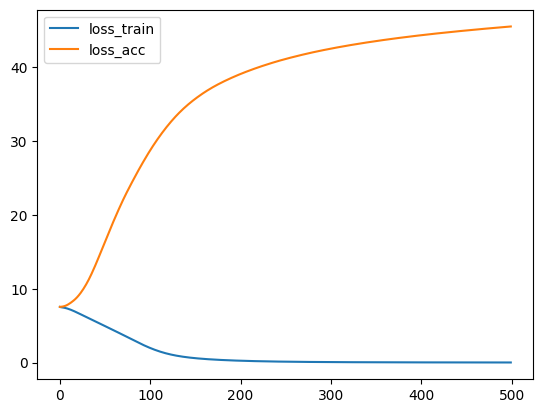

In [12]:
plt.plot(loss1, label="loss_train")
plt.plot(l, label="loss_acc")
plt.legend()
plt.show()

In [13]:
import pyaudio
import wave

# Paramètres d'enregistrement audio
FORMAT = pyaudio.paInt16  # Format audio (16-bit PCM)
CHANNELS = 1  # Nombre de canaux (mono)
RATE = 44100  # Fréquence d'échantillonnage en Hz
CHUNK = 1024  # Nombre d'échantillons par trame

# Créer un objet PyAudio
p = pyaudio.PyAudio()

# Ouvrir un flux audio en entrée
stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK)

print("Enregistrement audio en cours...")

frames = []

try:
    # Enregistrer le flux audio en temps réel
    while True:
        data = stream.read(CHUNK)
        frames.append(data)
except KeyboardInterrupt:
    print("Enregistrement audio terminé.")

# Fermer le flux audio
stream.stop_stream()
stream.close()
p.terminate()

# Sauvegarder l'enregistrement audio dans un fichier WAV
WAVE_OUTPUT_FILENAME = "output.wav"
wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

mfcc_features_list = []
normalize_audio_volume("output.wav")
remove_background_noise("normalized_audio.wav", "output_audio_filtered.wav")
speech_segmentation("output_audio_filtered.wav")
remove_artifacts("segment_1.mp4", "output_audio_filtered.wav")
temporal_normalization("output_audio_filtered.wav")
output_path = "spectrogram.png"
convert_to_spectrogram("normalized_audio.wav", output_path)
mfcc_features = extract_features_mfcc("normalized_audio.wav")
# Normalisation des caractéristiques MFCC (par exemple, en mettant à l'échelle entre -1 et 1)
mfcc_features_normalized = (mfcc_features - np.mean(mfcc_features)) / np.std(mfcc_features)
mfcc_features_list.append(mfcc_features_normalized)

plt.show()
# Convertir la liste en un tableau numpy
X = np.array(mfcc_features_list)
print(X.shape)
X = X.reshape(X.shape[0], 1, -1)
X = torch.Tensor(X)
'''new_audio_file = torch.randn(1, 1, input_size)  # Exemple de données audio avec 32 exemples dans un batch et 100 pas de temps
print(new_audio_file)'''
output = model(X)
print(output.shape)  # Output shape: (batch_size, seq_length, vocab_size)

ALSA lib pcm.c:2721:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.rear
ALSA lib pcm.c:2721:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.center_lfe
ALSA lib pcm.c:2721:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.side
ALSA lib pcm_route.c:878:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:878:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:878:(find_matching_chmap) Found no matching channel map
ALSA lib pcm_route.c:878:(find_matching_chmap) Found no matching channel map
Cannot connect to server socket err = No such file or directory
Cannot connect to server request channel
jack server is not running or cannot be started
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unlock
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unlock


Enregistrement audio en cours...
Enregistrement audio terminé.


<Figure size 640x480 with 0 Axes>

(1, 13, 87)
torch.Size([1, 1, 1824])


In [14]:
# Supposons que output soit le tenseur de sortie de votre modèle
batch_size, seq_length, vocab_size = output.size()

# Convertir les logits en probabilités en utilisant une fonction softmax
probs = torch.softmax(output, dim=2)

# Sélectionner l'indice du mot le plus probable à chaque pas de temps (décodage glouton)
predicted_indices = torch.argmax(probs, dim=2)

# Convertir les indices prédits en texte
vocab = labels_train  # Liste des mots dans le vocabulaire
predicted_text = []
for i in range(batch_size):
    text = ' '.join([vocab[idx.item()] for idx in predicted_indices[i]])
    predicted_text.append(text)

# Afficher le texte prédit pour chaque exemple dans le batch
for i, text in enumerate(predicted_text):
    print(f"Exemple {i+1}: {text}")

Exemple 1: no nahafahana ihany koa nitodika taminny zavanisy teto antoerana fahiny


In [15]:
from torchvision.transforms import Compose
from torchaudio.transforms import MelSpectrogram

# 1. Charger le modèle
model = torch.load('model.pth')
model.eval()

# 2. Prétraiter les données audio
transform = Compose([
    torchaudio.transforms.Resample(orig_freq=44100, new_freq=16000),  # Échantillonnage à 16 kHz
    MelSpectrogram(n_fft=400, win_length=400, hop_length=160, n_mels=128)  # Créer un spectrogramme Mel
])

# 3. Passer les données à travers le modèle
audio_path = '200625-115954_mlg_d06_elicit_0.wav'
waveform, sample_rate = torchaudio.load(audio_path)
spectrogram = transform(waveform).unsqueeze(0)  # Ajouter une dimension de lot

# Si vous utilisez GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model = model.to(device)
spectrogram = spectrogram.to(device)

# Obtenir les prédictions
with torch.no_grad():
    outputs = model(spectrogram)

# Appliquer la fonction softmax si nécessaire
probs = F.softmax(outputs, dim=1)
predictions = torch.argmax(probs, dim=1)

# Faire quelque chose avec les prédictions
print("Prédictions:", predictions)

AttributeError: 'collections.OrderedDict' object has no attribute 'eval'

In [16]:
import nltk
from nltk.tokenize import word_tokenize

# Phrase à tokenizer
sentence = "Ceci est un exemple de phrase à tokenizer."

# Tokenisation des mots
tokens = word_tokenize(sentence)

# Affichage des tokens
print(tokens)

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/PY3/english.pickle[0m

  Searched in:
    - '/home/hubs/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************


In [17]:
from sklearn.feature_extraction.text import CountVectorizer

# Exemple de données texte
texts = ["Ceci est un exemple de phrase.", "Voici un autre exemple."]

# Initialiser le CountVectorizer
vectorizer = CountVectorizer(binary=True)

# Adapter le vectorizer aux données et encoder les données texte
encoded_texts = vectorizer.fit_transform(texts)

# Afficher les textes encodés
print(encoded_texts.toarray())

[[0 1 1 1 1 1 1 0]
 [1 0 0 0 1 0 1 1]]
